#### 1.Import the required libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

import random 

# import various functions from sklearn
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#### 2.Data Pre-processing

In [2]:
#Load the dataset
df_diabetes=pd.read_csv('diabetic_data.csv')

In [3]:
#first five observations.
df_diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#last five observations.
df_diabetes.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,?,?,13,3,3,0,0,0,530,530,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [5]:
#shape of the data.
df_diabetes.shape

(101766, 50)

In [6]:
#Data types and information
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
#In the dataset there are 13 int and 37 object datatype features present

In [8]:
print('In the dataset there are',df_diabetes.shape[0],'no of rows and',df_diabetes.shape[1],'no of columns')

In the dataset there are 101766 no of rows and 50 no of columns


In [9]:
#Age feature.
#If we see the data type of the age feature it shows the object datatype but it should be numeric so,we convert it into numeric.
print(df_diabetes['age'].value_counts())
print(df_diabetes['age'].dtype)

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
object


In [10]:
#lets find the number of duplicates values.
df_diabetes.duplicated().sum()

0

In [11]:
print('total no duplicates rows :-',df_diabetes['patient_nbr'].duplicated().sum())
print("we found that,for some patient there are number of entries get repeated in the dataset and those entries are not helpful,so we decided to remove that entries")

total no duplicates rows :- 30248
we found that,for some patient there are number of entries get repeated in the dataset and those entries are not helpful,so we decided to remove that entries


In [12]:
df_diabetes.dropna(inplace=True)
print('Total no of data =',len(df_diabetes))
#print('Unique values of data =',len(np.unique(df_diabetes['patient_nbr'])))
df_diabetes.drop_duplicates(['patient_nbr'],keep='first',inplace=True)
print('Remaining data after droping the duplicates values are:- ',len(df_diabetes))

Total no of data = 101766
Remaining data after droping the duplicates values are:-  71518


In [13]:
y={'[0-10)':5,'[10-20)':15,'[20-30)':25,'[30-40)':35,'[40-50)':45,'[50-60)':55,'[60-70)':65,'[70-80)':75,'[80-90)':85,
  '[90-100)':95}
df_diabetes['age']=df_diabetes['age'].apply(lambda x : y[x])
print(df_diabetes['age'].head())

0     5
1    15
2    25
3    35
4    45
Name: age, dtype: int64


In [14]:
#lets find the missing data and deal with that.
from prettytable import PrettyTable
z=PrettyTable(['Features Name','Missing Values ','Missing values Percentage'])
for i in df_diabetes.columns:
    total=len(df_diabetes[df_diabetes[i]=='?'])
    z.add_row([i,total,total/ len(df_diabetes)])
print(z)

+--------------------------+-----------------+---------------------------+
|      Features Name       | Missing Values  | Missing values Percentage |
+--------------------------+-----------------+---------------------------+
|       encounter_id       |        0        |            0.0            |
|       patient_nbr        |        0        |            0.0            |
|           race           |       1948      |    0.027237898151514305   |
|          gender          |        0        |            0.0            |
|           age            |        0        |            0.0            |
|          weight          |      68665      |     0.960107944853044     |
|    admission_type_id     |        0        |            0.0            |
| discharge_disposition_id |        0        |            0.0            |
|   admission_source_id    |        0        |            0.0            |
|     time_in_hospital     |        0        |            0.0            |
|        payer_code      

In [15]:
#There are number of features with missing values lets analyze them so that we can replace them using appropriate 
#technique like replacing with class mean/median, checking whether missing value is source of information, 
#missing value replacement using ML model

In [16]:
#We see that there are more features have a n-unique values which are greater than 50 and some of the features have 
#more than 100 values.

In [17]:
df_diabetes.nunique()[df_diabetes.nunique()>50]

encounter_id          71518
patient_nbr           71518
medical_specialty        71
num_lab_procedures      116
num_medications          75
diag_1                  697
diag_2                  726
diag_3                  759
dtype: int64

In [18]:
#if we see there are medical sspecialty list with some missing values lets treat them.
print(df_diabetes['medical_specialty'].value_counts())
print("'In the medical specialty the no of  nunique sub_features are = ",df_diabetes['medical_specialty'].nunique())

?                                       34477
InternalMedicine                        10919
Family/GeneralPractice                   5118
Emergency/Trauma                         4465
Cardiology                               4266
Surgery-General                          2221
Orthopedics                              1134
Orthopedics-Reconstructive               1043
Radiologist                               831
Nephrology                                828
Pulmonology                               653
Psychiatry                                614
ObstetricsandGynecology                   595
Urology                                   530
Surgery-Cardiovascular/Thoracic           497
Surgery-Neuro                             409
Gastroenterology                          398
Surgery-Vascular                          362
Oncology                                  218
Pediatrics                                196
PhysicalMedicineandRehabilitation         194
Neurology                         

In [19]:
#medical speciality have a more missing value so we decide to drop the medical speciality column
df_diabetes['medical_specialty'].value_counts(normalize=True)

?                                      0.482074
InternalMedicine                       0.152675
Family/GeneralPractice                 0.071562
Emergency/Trauma                       0.062432
Cardiology                             0.059649
Surgery-General                        0.031055
Orthopedics                            0.015856
Orthopedics-Reconstructive             0.014584
Radiologist                            0.011619
Nephrology                             0.011578
Pulmonology                            0.009131
Psychiatry                             0.008585
ObstetricsandGynecology                0.008320
Urology                                0.007411
Surgery-Cardiovascular/Thoracic        0.006949
Surgery-Neuro                          0.005719
Gastroenterology                       0.005565
Surgery-Vascular                       0.005062
Oncology                               0.003048
Pediatrics                             0.002741
PhysicalMedicineandRehabilitation      0

In [20]:
df_diabetes['diag_2'].value_counts()

250       5009
276       4604
428       4335
427       3539
401       3088
599       2254
496       2223
411       2044
414       1980
403       1621
250.02    1558
707       1204
250.01    1126
285       1114
584       1067
780       1047
585        935
682        931
491        913
486        895
518        886
425        884
424        832
413        813
493        629
250.6      587
305        505
786        481
280        435
998        434
410        393
272        349
785        328
511        327
997        310
996        305
574        297
?          294
295        292
788        288
38         287
41         287
197        285
648        283
560        282
V45        267
162        267
440        265
577        254
402        253
426        250
571        245
578        232
453        230
287        227
198        224
278        222
789        216
530        213
799        197
303        193
70         193
342        187
591        185
196        177
V42        174
250.03    

In [21]:
df_diabetes['diag_3'].value_counts()

250       9039
401       6588
276       3448
428       2847
427       2707
414       2669
496       1653
272       1633
403       1303
599       1283
?         1225
585        949
780        917
250.02     917
V45        892
285        851
424        797
707        795
425        723
305        707
584        665
250.6      663
250.01     653
518        587
278        559
682        547
41         521
493        507
530        472
244        413
786        407
491        360
486        359
V58        348
411        310
280        291
357        290
287        287
402        280
785        263
788        262
197        260
787        258
593        254
412        253
997        249
250.4      248
V15        239
998        238
413        236
560        225
511        225
294        212
250.8      210
535        200
426        200
995        198
799        197
295        196
458        190
571        190
789        188
V10        186
E849       184
396        182
996        181
438       

In [22]:
len(df_diabetes[(df_diabetes['diag_1']=='?')])

11

In [23]:
len(df_diabetes[(df_diabetes['diag_2']=='?')])

294

In [24]:
len(df_diabetes[(df_diabetes['diag_3']=='?')])

1225

In [25]:
df_diabetes['diag_1'] = df_diabetes['diag_1'].replace('?',df_diabetes['diag_1'].mode()[0])
df_diabetes['diag_2'] = df_diabetes['diag_2'].replace('?',df_diabetes['diag_2'].mode()[0])
df_diabetes['diag_3'] = df_diabetes['diag_3'].replace('?',df_diabetes['diag_3'].mode()[0])


In [26]:
 
print(len(np.unique(df_diabetes['diag_1'])))  
print(len(np.unique(df_diabetes['diag_2'])))  
print(len(np.unique(df_diabetes['diag_3'])))  

df_diabetes['diag_1'] = df_diabetes['diag_1'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

df_diabetes['diag_2'] = df_diabetes['diag_2'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

df_diabetes['diag_3'] = df_diabetes['diag_3'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))  

print(np.unique(df_diabetes['diag_1']), '\n')           
print(np.unique(df_diabetes['diag_2']), '\n')
print(np.unique(df_diabetes['diag_3']), '\n')  

696
725
758
['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnecy' 'respiratory'] 

['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnecy' 'respiratory'] 

['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnecy' 'respiratory'] 



In [27]:
df_diabetes['gender'].value_counts()
#In gender features we have only 3 Unknown/Invalid values so lets drop that values. 

Female             38025
Male               33490
Unknown/Invalid        3
Name: gender, dtype: int64

In [28]:
df_diabetes['gender'] = df_diabetes['gender'].replace('Unknown/Invalid', 'Female')
df_diabetes['gender'].value_counts()

Female    38028
Male      33490
Name: gender, dtype: int64

In [29]:
df_diabetes['race'] = df_diabetes['race'].replace('?', 'Other')
df_diabetes['race'].value_counts()

Caucasian          53491
AfricanAmerican    12887
Other               3126
Hispanic            1517
Asian                497
Name: race, dtype: int64

In [30]:
df_diabetes['weight'].value_counts(normalize=True)

?           0.960108
[75-100)    0.016709
[50-75)     0.010920
[100-125)   0.007914
[125-150)   0.001832
[25-50)     0.001244
[0-25)      0.000643
[150-175)   0.000461
[175-200)   0.000126
>200        0.000042
Name: weight, dtype: float64

In [31]:
df_diabetes['max_glu_serum'].value_counts(normalize=True)

None   0.951677
Norm   0.024204
>200   0.013549
>300   0.010571
Name: max_glu_serum, dtype: float64

In [32]:
df_diabetes['A1Cresult'].value_counts(normalize=True)

None   0.818423
>8     0.088146
Norm   0.053008
>7     0.040423
Name: A1Cresult, dtype: float64

In [33]:
df_diabetes['payer_code'].value_counts(normalize=True)

?    0.434059
MC   0.285439
HM   0.056238
BC   0.047988
SP   0.046799
MD   0.030720
CP   0.027769
UN   0.026273
CM   0.018653
OG   0.009200
PO   0.006474
DM   0.005229
WC   0.001636
CH   0.001636
OT   0.000909
SI   0.000517
MP   0.000447
FR   0.000014
Name: payer_code, dtype: float64

In [34]:
df_diabetes['readmitted'].value_counts()

NO     42985
>30    22240
<30     6293
Name: readmitted, dtype: int64

In [35]:
print('BEFORE : ',np.unique(df_diabetes['readmitted'].values))

df_diabetes['readmitted'] = df_diabetes['readmitted'].apply(lambda x : 0 if (x == '>30' or x == 'NO') else 1)

print('AFTER : ',np.unique(df_diabetes['readmitted'].values))

BEFORE :  ['<30' '>30' 'NO']
AFTER :  [0 1]


In [36]:
#lets remove the irrelevant features which are not goingbto use any more or might not fit the context of our problem.
df_diabetes.drop(['encounter_id','weight','payer_code','medical_specialty','max_glu_serum','A1Cresult'], axis = 1, inplace = True)

#### 3.Data Analysis.

* Lets anaylse each and very feature to understand the data thoroughly.

* Univariates

<AxesSubplot:ylabel='readmitted'>

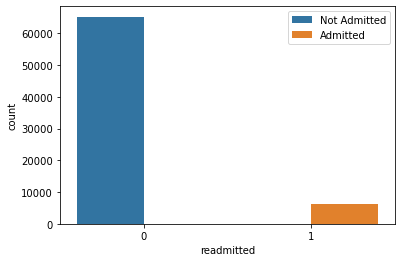

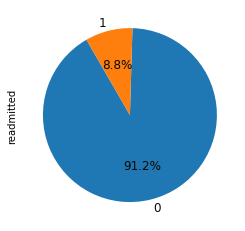

In [37]:
plt.figure()
ax = sns.countplot(x = 'readmitted', data = df_diabetes, hue = 'readmitted')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels = ['Not Admitted', 'Admitted'])
plt.figure()
df_diabetes.readmitted.value_counts().plot.pie(autopct="%1.1f%%", startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})

In [38]:
#from the above graph we can say that our target feature is imbalanced which tells that only 8.8% of data of clas 1
#which tells that person is admitted and 91.2% data of class 0 tells that person is not-admitted.

In [39]:
# After doing research about the domain, we have concluded that our data is moderately balanced, we do not need to go in for SMOTE analysis

<AxesSubplot:ylabel='gender'>

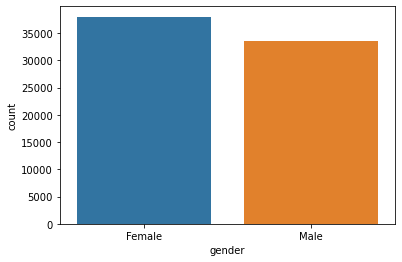

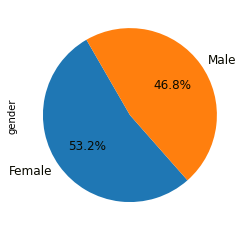

In [40]:
sns.countplot(x='gender',data=df_diabetes)
plt.figure()
df_diabetes.gender.value_counts().plot.pie(autopct="%1.1f%%", startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})

In [41]:
#In the above bar plot we that 46.8% patients are male and 53.2% are  female.

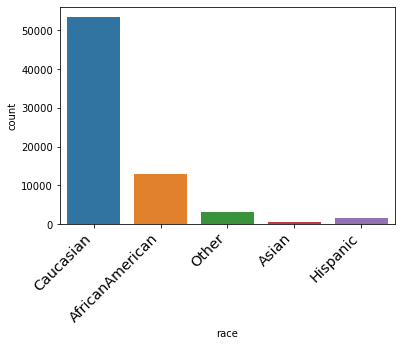

In [42]:
sns.countplot(x='race',data=df_diabetes)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')

plt.show()

In [43]:
df_diabetes['race'].value_counts(normalize=True)

Caucasian         0.747938
AfricanAmerican   0.180192
Other             0.043709
Hispanic          0.021211
Asian             0.006949
Name: race, dtype: float64

<AxesSubplot:ylabel='race'>

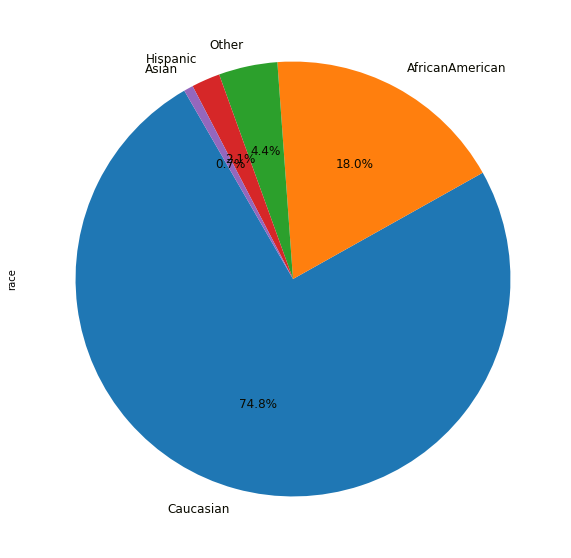

In [44]:
plt.figure(figsize=[10,10])
df_diabetes.race.value_counts().plot.pie(autopct="%1.1f%%", startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})

In [45]:
#In race features most of the people belongs to the caucasian which is 74% more than others.

<AxesSubplot:xlabel='age', ylabel='Density'>

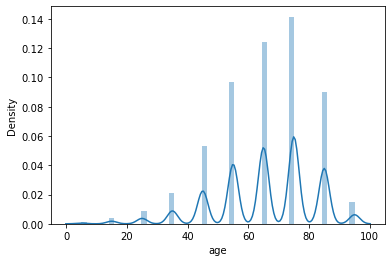

In [46]:
sns.distplot(df_diabetes['age'])

In [47]:
#from the age feature we found that more than 40 age people undergo the diabetes.

<AxesSubplot:xlabel='admission_type_id', ylabel='Density'>

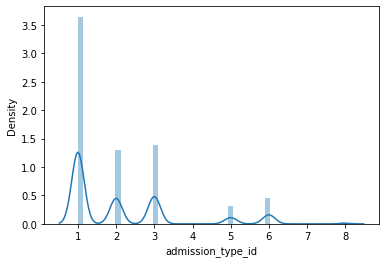

In [48]:
sns.distplot(df_diabetes['admission_type_id'])

In [49]:
#most of the patients have in admission type id =1 which cover 51% .Admission type id =4 has least patients

<AxesSubplot:>

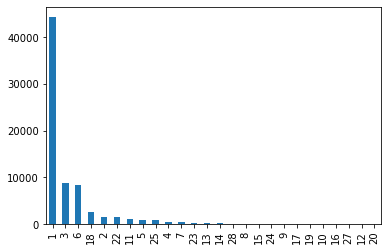

In [50]:
df_diabetes['discharge_disposition_id'].value_counts().plot(kind='bar')

In [51]:
#Maximum patients have discharge disposition id =1. 

* Bivariate

<AxesSubplot:xlabel='gender', ylabel='count'>

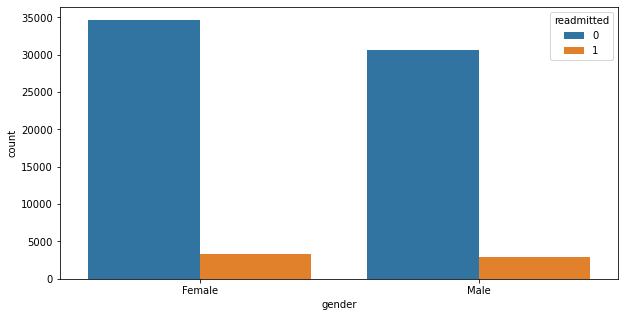

In [52]:
fig = plt.figure(figsize = (10, 5))

sns.countplot(x  = 'gender', data = df_diabetes, hue = 'readmitted')

<AxesSubplot:xlabel='number_inpatient', ylabel='count'>

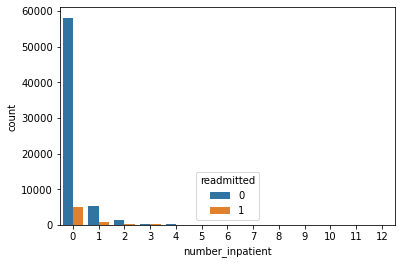

In [53]:
sns.countplot(x  = 'number_inpatient', data = df_diabetes, hue = 'readmitted')

In [54]:
#Most patients are never admitted into the hospital and if patient was not admitted previously or readmitted,
#there is a very low chance that he will be readmitted.

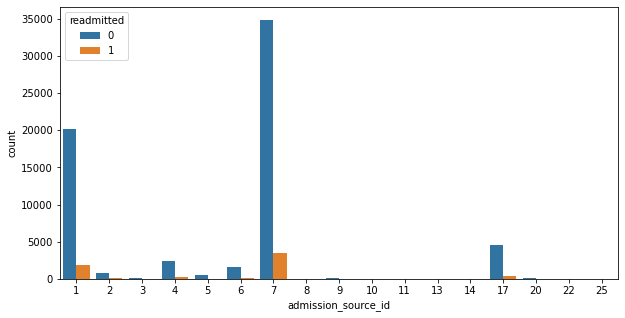

In [55]:
fig = plt.figure(figsize = (10, 5)) 
a = sns.countplot(x = 'admission_source_id', hue = 'readmitted', data = df_diabetes)

In [56]:
#Most of the patient who were readmitted have admission source as 7 and so if some patient has source id as 7 he is 
#more likely to get readmitted.

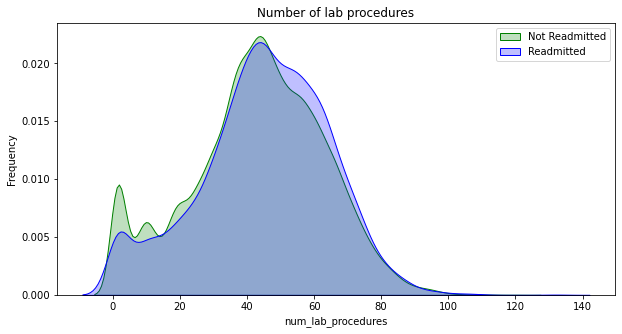

In [57]:
fig = plt.figure(figsize = (10, 5)) 
a = sns.kdeplot(df_diabetes.loc[(df_diabetes['readmitted'] == 0), "num_lab_procedures"] ,
                 color = "g", shade = True, label = "Not Readmitted")

a = sns.kdeplot(df_diabetes.loc[(df_diabetes['readmitted'] == 1), "num_lab_procedures"] ,
                 color = "b", shade = True, label = "Readmitted")

a.legend()
a.set_xlabel("num_lab_procedures")
a.set_ylabel("Frequency")
a.set_title("Number of lab procedures")
plt.show()

In [58]:
#Distribution Number of lab procedures for radmitted and not readmitted patient is exactly same. But it has high 
#variance.High variance features are considered information rich features

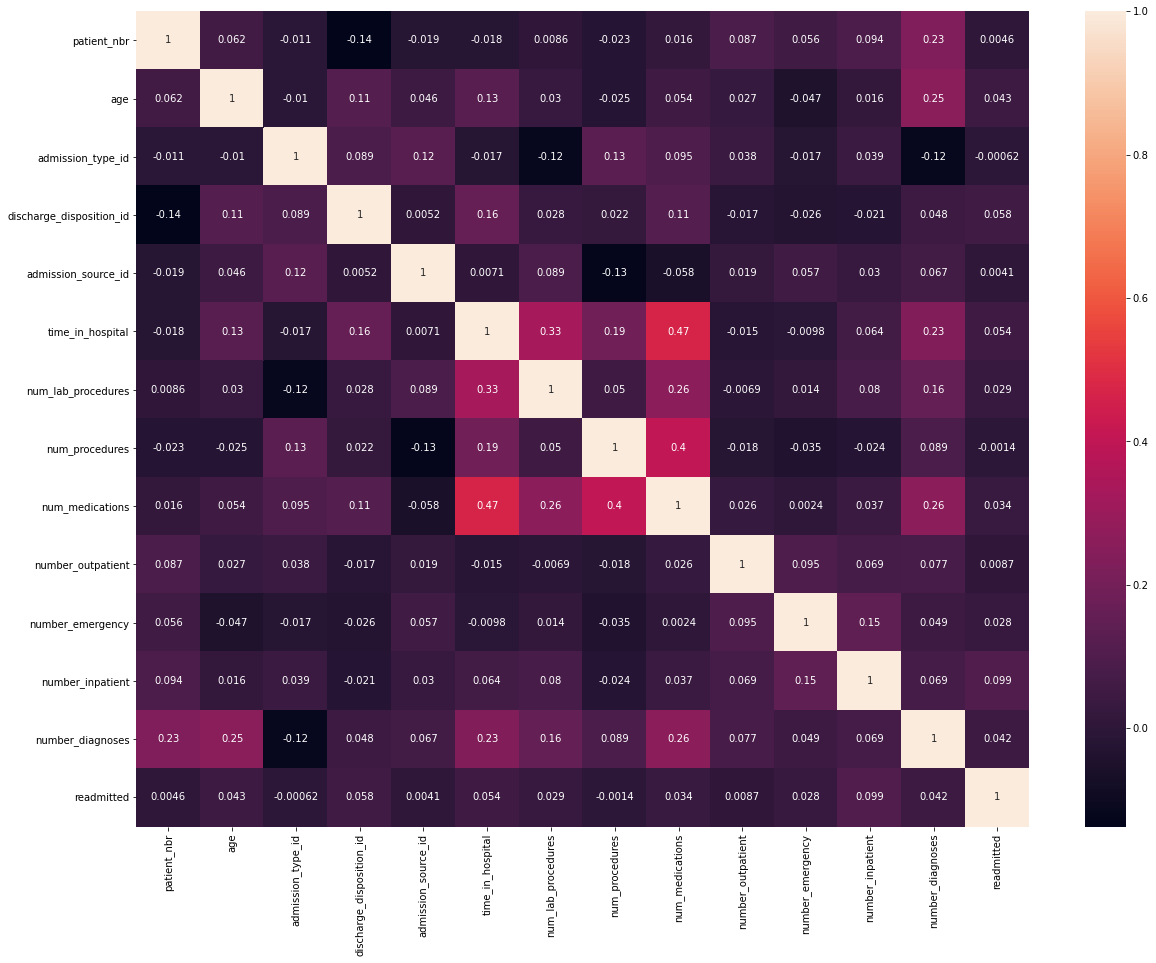

In [59]:
plt.figure(figsize=(20,15))
sns.heatmap(df_diabetes.corr(),annot=True)
plt.show()

#### 4.label_Encoding

In [60]:
df_diabetes.describe(include=object)

,race,gender,diag_1,diag_2,diag_3,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
count,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518
unique,5,2,10,10,10,4,4,4,4,4,2,4,4,2,4,4,3,4,2,2,1,1,4,4,2,1,2,2,2,2
top,Caucasian,Female,circulatory,circulatory,circulatory,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
freq,53491,38028,21905,22534,21313,56527,70592,71020,71446,67773,71517,62412,63664,71499,66210,66817,71316,71498,71515,71488,71518,71518,34921,71016,71511,71518,71516,71517,39494,54319


In [61]:
df_diabetes_object=df_diabetes.select_dtypes(include=object)

In [62]:
df_diabetes_object.head()

,race,gender,diag_1,diag_2,diag_3,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,diabetes,diabetes,diabetes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,other,diabetes,other,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,pregnecy,diabetes,other,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,other,diabetes,circulatory,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,neoplasms,neoplasms,diabetes,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes


In [63]:
df_dumy=pd.get_dummies(df_diabetes_object,drop_first=True)

In [64]:
df_dumy.head(3)

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,diag_1_diabetes,diag_1_digestive,diag_1_genitourinary,diag_1_injury,diag_1_musculoskeletal,diag_1_neoplasms,diag_1_other,diag_1_pregnecy,diag_1_respiratory,diag_2_diabetes,diag_2_digestive,diag_2_genitourinary,diag_2_injury,diag_2_musculoskeletal,diag_2_neoplasms,diag_2_other,diag_2_pregnecy,diag_2_respiratory,diag_3_diabetes,diag_3_digestive,diag_3_genitourinary,diag_3_injury,diag_3_musculoskeletal,diag_3_neoplasms,diag_3_other,diag_3_pregnecy,diag_3_respiratory,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1


In [65]:
df_diabetes_numeric=df_diabetes.select_dtypes(include=np.number)

In [66]:
df_diabetes_numeric.head(4)

,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
0,8222157,5,6,25,1,1,41,0,1,0,0,0,1,0
1,55629189,15,1,1,7,3,59,0,18,0,0,0,9,0
2,86047875,25,1,1,7,2,11,5,13,2,0,1,6,0
3,82442376,35,1,1,7,2,44,1,16,0,0,0,7,0


In [67]:
df_final=pd.concat([df_diabetes_numeric,df_dumy],axis=1)

In [68]:
df_final.head(2)

,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,diag_1_diabetes,diag_1_digestive,diag_1_genitourinary,diag_1_injury,diag_1_musculoskeletal,diag_1_neoplasms,diag_1_other,diag_1_pregnecy,diag_1_respiratory,diag_2_diabetes,diag_2_digestive,diag_2_genitourinary,diag_2_injury,diag_2_musculoskeletal,diag_2_neoplasms,diag_2_other,diag_2_pregnecy,diag_2_respiratory,diag_3_diabetes,diag_3_digestive,diag_3_genitourinary,diag_3_injury,diag_3_musculoskeletal,diag_3_neoplasms,diag_3_other,diag_3_pregnecy,diag_3_respiratory,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,8222157,5,6,25,1,1,41,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,55629189,15,1,1,7,3,59,0,18,0,0,0,9,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


#### 5.split the data into train & test.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [70]:
X=df_final.drop('readmitted',axis=1)
y=df_final['readmitted']

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

#### 6.Base Model build

In [72]:
lr=LogisticRegression()

In [73]:
lr_model=lr.fit(X_train,y_train)

In [74]:
y_pred=lr_model.predict(X_test)

#### 7.model evaluation

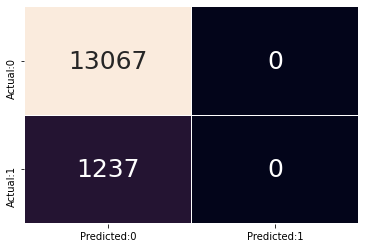

In [75]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True,fmt = 'd', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.show()

In [76]:
ac=accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
fscore= 2*Precision*Recall/(Precision+Recall)
print('Accuracy Sore:',ac)
print('Precision:',Precision)
print('Recall:',Recall)
print('F1_score:',fscore)

Accuracy Sore: 0.9135206935123042
Precision: nan
Recall: 0.0
F1_score: nan


In [77]:
print('Classification Report:',end='\n')
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     13067
           1       0.00      0.00      0.00      1237

    accuracy                           0.91     14304
   macro avg       0.46      0.50      0.48     14304
weighted avg       0.83      0.91      0.87     14304



In [78]:
final_table=pd.DataFrame(columns=['Model Name','Accuracy Score','F1_score','Precision','Recall'])

In [79]:
lf = pd.Series({'Model Name': "Base model",'Accuracy Score':ac,'F1_score':fscore,'Precision':Precision,'Recall':Recall})

final_table= final_table.append(lf, ignore_index=True)
final_table

,Model Name,Accuracy Score,F1_score,Precision,Recall
0,Base model,0.913521,NaN,NaN,0.000000


#### 8.Feature engineering

In [80]:
df_final.head(5)

,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,diag_1_diabetes,diag_1_digestive,diag_1_genitourinary,diag_1_injury,diag_1_musculoskeletal,diag_1_neoplasms,diag_1_other,diag_1_pregnecy,diag_1_respiratory,diag_2_diabetes,diag_2_digestive,diag_2_genitourinary,diag_2_injury,diag_2_musculoskeletal,diag_2_neoplasms,diag_2_other,diag_2_pregnecy,diag_2_respiratory,diag_3_diabetes,diag_3_digestive,diag_3_genitourinary,diag_3_injury,diag_3_musculoskeletal,diag_3_neoplasms,diag_3_other,diag_3_pregnecy,diag_3_respiratory,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,8222157,5,6,25,1,1,41,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,55629189,15,1,1,7,3,59,0,18,0,0,0,9,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
2,86047875,25,1,1,7,2,11,5,13,2,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1
3,82442376,35,1,1,7,2,44,1,16,0,0,0,7,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
4,42519267,45,1,1,7,1,51,0,8,0,0,0,5,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [81]:
df2=df_final.copy()

In [82]:
df2.shape

(71518, 93)

In [83]:
dfxyt=pd.read_csv('diabetic_data.csv')

In [84]:
dfxyt.shape

(101766, 50)

In [85]:
# We are creating a column 'No of times admitted' which contains the no of times a patient has been admitted.

In [86]:
dv1=pd.DataFrame(columns=['patient number','No of times admitted'])

In [87]:
l=[]
g=[]
for i in df2['patient_nbr']:
    m=dfxyt['patient_nbr'][(dfxyt['patient_nbr']==i)].count()
    g.append(i)
    l.append(m)


dv1['patient number']=g
dv1['No of times admitted']=l

In [88]:
dff1=pd.merge(df2,dv1,left_on='patient_nbr',right_on='patient number')

In [89]:
dff1=dff1.drop(['patient number'],axis=1)

In [90]:
dff1.shape

(71518, 94)

In [91]:
dff1.head(5)

,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,diag_1_diabetes,diag_1_digestive,diag_1_genitourinary,diag_1_injury,diag_1_musculoskeletal,diag_1_neoplasms,diag_1_other,diag_1_pregnecy,diag_1_respiratory,diag_2_diabetes,diag_2_digestive,diag_2_genitourinary,diag_2_injury,diag_2_musculoskeletal,diag_2_neoplasms,diag_2_other,diag_2_pregnecy,diag_2_respiratory,diag_3_diabetes,diag_3_digestive,diag_3_genitourinary,diag_3_injury,diag_3_musculoskeletal,diag_3_neoplasms,diag_3_other,diag_3_pregnecy,diag_3_respiratory,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,No of times admitted
0,8222157,5,6,25,1,1,41,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
1,55629189,15,1,1,7,3,59,0,18,0,0,0,9,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1
2,86047875,25,1,1,7,2,11,5,13,2,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1
3,82442376,35,1,1,7,2,44,1,16,0,0,0,7,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1
4,42519267,45,1,1,7,1,51,0,8,0,0,0,5,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1


In [92]:
dfm1=dff1[dff1['readmitted']==1]
dfm2=dff1[dff1['readmitted']==0]

In [93]:
dfm1sample=dfm1.sample(2500)
dfm2sample=dfm2.sample(2500)

In [94]:
dfm1sample.shape

(2500, 94)

In [95]:
dfm2sample.shape

(2500, 94)

As the datasize is very large we are taking a sample of 5000 rows as a representative of the dataset and going to preceed with that. 

In [96]:
dfsample = pd.concat([dfm1sample,dfm2sample],axis=0)

In [97]:
dfsample.shape

(5000, 94)

In [98]:
dff1['readmitted'].value_counts(normalize=True)*100

0   91.200817
1    8.799183
Name: readmitted, dtype: float64

In [99]:
dfsample['readmitted'].value_counts(normalize=True)*100

0   50.000000
1   50.000000
Name: readmitted, dtype: float64

In [100]:
dff1.describe()

,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,diag_1_diabetes,diag_1_digestive,diag_1_genitourinary,diag_1_injury,diag_1_musculoskeletal,diag_1_neoplasms,diag_1_other,diag_1_pregnecy,diag_1_respiratory,diag_2_diabetes,diag_2_digestive,diag_2_genitourinary,diag_2_injury,diag_2_musculoskeletal,diag_2_neoplasms,diag_2_other,diag_2_pregnecy,diag_2_respiratory,diag_3_diabetes,diag_3_digestive,diag_3_genitourinary,diag_3_injury,diag_3_musculoskeletal,diag_3_neoplasms,diag_3_other,diag_3_pregnecy,diag_3_respiratory,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,No of times admitted
count,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000
mean,55051603.799952,65.651864,2.100254,3.593235,5.657457,4.289130,43.075478,1.430577,15.705025,0.280069,0.103540,0.177829,7.245700,0.087992,0.006949,0.747938,0.021211,0.043709,0.468274,0.081168,0.091865,0.049134,0.066822,0.057049,0.038340,0.164448,0.008194,0.136693,0.140566,0.040647,0.076456,0.025979,0.018135,0.024469,0.252468,0.004936,0.101261,0.194147,0.038396,0.058712,0.020177,0.019268,0.017646,0.281691,0.003817,0.068137,0.790388,0.191812,0.011717,0.987052,0.011522,0.001021,0.993037,0.006628,0.000224,0.998993,0.000937,0.000056,0.947636,0.047149,0.003286,0.000014,0.872675,0.113957,0.008082,0.890181,0.095249,0.008683,0.000266,0.925781,0.070570,0.002517,0.934268,0.062781,0.001902,0.002685,0.000140,0.999720,0.000252,0.000014,0.000042,0.000419,0.488283,0.309419,0.097360,0.992981,0.006865,0.000098,0.000098,0.000028,0.000014,0.552225,0.759515,1.422942
std,39475727.882351,15.978075,1.508301,5.269771,4.162580,2.949210,19.952338,1.759864,8.311163,1.068957,0.509187,0.603790,1.994674,0.283285,0.083073,0.434200,0.144090,0.204449,0.498996,0.273095,0.288837,0.216150,0.249716,0.231937,0.192017,0.370684,0.090148,0.343525,0.347576,0.197473,0.265729,0.159075,0.133442,0.154502,0.

In [101]:
dfsample.describe()

,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,diag_1_diabetes,diag_1_digestive,diag_1_genitourinary,diag_1_injury,diag_1_musculoskeletal,diag_1_neoplasms,diag_1_other,diag_1_pregnecy,diag_1_respiratory,diag_2_diabetes,diag_2_digestive,diag_2_genitourinary,diag_2_injury,diag_2_musculoskeletal,diag_2_neoplasms,diag_2_other,diag_2_pregnecy,diag_2_respiratory,diag_3_diabetes,diag_3_digestive,diag_3_genitourinary,diag_3_injury,diag_3_musculoskeletal,diag_3_neoplasms,diag_3_other,diag_3_pregnecy,diag_3_respiratory,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,No of times admitted
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,55773683.549600,66.922000,2.105600,4.022600,5.765200,4.522200,44.169000,1.433400,16.175400,0.294200,0.114800,0.266200,7.381200,0.500000,0.005400,0.754000,0.018800,0.041600,0.459800,0.083600,0.089000,0.047200,0.080000,0.051600,0.038000,0.164600,0.006000,0.128400,0.131600,0.040000,0.081000,0.028600,0.014400,0.026200,0.255000,0.002800,0.101400,0.186000,0.040400,0.060000,0.021200,0.018000,0.020800,0.279400,0.002600,0.072200,0.793600,0.189400,0.009600,0.982200,0.015600,0.001600,0.991600,0.008200,0.000200,0.999000,0.001000,0.000000,0.946400,0.047600,0.002800,0.000000,0.870000,0.116000,0.007800,0.888800,0.094800,0.010400,0.000000,0.928000,0.067200,0.003400,0.932400,0.065400,0.001600,0.002200,0.000200,0.999600,0.000400,0.000000,0.000000,0.000200,0.470200,0.317200,0.102200,0.994000,0.006000,0.000000,0.000000,0.000000,0.000000,0.541400,0.778600,1.767800
std,38621727.922072,15.560667,1.535617,5.727779,4.173530,3.021280,19.552414,1.746131,8.383644,1.039742,0.482978,0.824302,1.956490,0.500050,0.073293,0.430722,0.135832,0.199693,0.498431,0.276815,0.284772,0.212088,0.271320,0.221240,0.191215,0.370856,0.077235,0.334568,0.338089,0.195979,0.272862,0.166696,0.119145,0.159746,0.435905,0.052846,0.301888,0.389146,0.196915,0.237511,0.144065,0.132964,0.142729,0.448749,0.0509

#### 9. Classification models:

##### Logistic regression

In [103]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [102]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [103]:
X=dfsample.drop('readmitted',axis=1)
y=dfsample['readmitted']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)
lr=LogisticRegression()
sfs_model=sfs(estimator=lr,k_features='best',forward=True,scoring='f1_weighted',cv=5)
model=sfs_model.fit(X_train,y_train)
model.k_feature_names_

('age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_medications',
 'number_inpatient',
 'number_diagnoses',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'diag_1_diabetes',
 'diag_1_digestive',
 'diag_1_musculoskeletal',
 'diag_1_neoplasms',
 'diag_1_pregnecy',
 'diag_1_respiratory',
 'diag_2_diabetes',
 'diag_2_injury',
 'diag_2_other',
 'diag_3_diabetes',
 'diag_3_musculoskeletal',
 'diag_3_neoplasms',
 'diag_3_pregnecy',
 'diag_3_respiratory',
 'repaglinide_No',
 'repaglinide_Steady',
 'repaglinide_Up',
 'nateglinide_No',
 'nateglinide_Steady',
 'nateglinide_Up',
 'chlorpropamide_Up',
 'glimepiride_Up',
 'acetohexamide_Steady',
 'glipizide_No',
 'glyburide_No',
 'glyburide_Steady',
 'glyburide_Up',
 'pioglitazone_Steady',
 'pioglitazone_Up',
 'rosiglitazone_Steady',
 'rosiglitazone_Up',
 'acarbose_Up',
 'miglitol_Steady',
 'miglitol_Up',
 'insulin_Steady',
 'glyburide-metformin_Steady',
 'glyburide-metfo

In [103]:
X=dfsample[['age','admission_type_id','discharge_disposition_id','admission_source_id','time_in_hospital',
 'num_medications','number_inpatient','number_diagnoses','race_Asian','race_Caucasian','race_Hispanic','race_Other',
 'diag_1_diabetes','diag_1_digestive','diag_1_musculoskeletal','diag_1_neoplasms','diag_1_pregnecy','diag_1_respiratory',
 'diag_2_diabetes','diag_2_injury','diag_2_other','diag_3_diabetes','diag_3_musculoskeletal','diag_3_neoplasms','diag_3_pregnecy',
 'diag_3_respiratory','repaglinide_No','repaglinide_Steady','repaglinide_Up','nateglinide_No','nateglinide_Steady',
 'nateglinide_Up', 'chlorpropamide_Up', 'glimepiride_Up', 'acetohexamide_Steady', 'glipizide_No', 'glyburide_No',
 'glyburide_Steady', 'glyburide_Up', 'pioglitazone_Steady', 'pioglitazone_Up', 'rosiglitazone_Steady', 'rosiglitazone_Up',
 'acarbose_Up', 'miglitol_Steady', 'miglitol_Up', 'insulin_Steady', 'glyburide-metformin_Steady', 'glyburide-metformin_Up',
 'glipizide-metformin_Steady', 'metformin-rosiglitazone_Steady', 'diabetesMed_Yes', 'No of times admitted']]
y=dfsample['readmitted']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)
lr=LogisticRegression()
lr_model=lr.fit(X_train,y_train)
y_pred_prob = lr_model.predict(X_test)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
ac=accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
fscore= 2*Precision*Recall/(Precision+Recall)
print('Accuracy Sore:',ac)
print('Precision:',Precision)
print('Recall:',Recall)
print('F1_score:',fscore)

Accuracy Sore: 0.709
Precision: 0.7381489841986456
Recall: 0.651394422310757
F1_score: 0.692063492063492


In [104]:
y_pred_prob_train = lr_model.predict(X_train)
y_predtrain = [ 0 if x < 0.5 else 1 for x in y_pred_prob_train]
actrain=accuracy_score(y_train,y_predtrain)
print('Train data accuracy score:',actrain)

Train data accuracy score: 0.72025


In [105]:
lf = pd.Series({'Model Name': "Logistic Regression model",'Accuracy Score':ac,'F1_score':fscore,'Precision':Precision,'Recall':Recall})

final_table= final_table.append(lf, ignore_index=True)
final_table

,Model Name,Accuracy Score,F1_score,Precision,Recall
0,Base model,0.913521,NaN,NaN,0.000000
1,Logistic Regression model,0.709000,0.692063,0.738149,0.651394


In [106]:
lr=LogisticRegression()
params={'penalty':['none', 'l1', 'l2','elasticnet'],'C': [100, 10, 1.0, 0.1, 0.01]}
grid=GridSearchCV(estimator=lr,param_grid=params,cv=5,scoring='f1_weighted')
gridmodel=grid.fit(X_train,y_train)
gridmodel.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [107]:
lr=LogisticRegression(C= 1.0, penalty= 'l2')
lrmodel=lr.fit(X_train,y_train)
y_pred_prob = lr_model.predict(X_test)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
ac=accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
fscore= 2*Precision*Recall/(Precision+Recall)
print('Accuracy Sore:',ac)
print('Precision:',Precision)
print('Recall:',Recall)
print('F1_score:',fscore)

Accuracy Sore: 0.709
Precision: 0.7381489841986456
Recall: 0.651394422310757
F1_score: 0.692063492063492


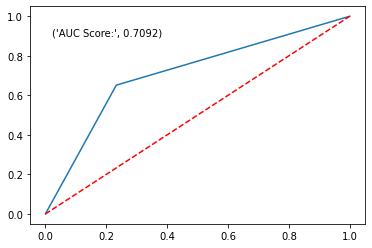

In [108]:
fpr,tpr,threholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.show()

In [109]:
lf = pd.Series({'Model Name': "Tuned Logistic Regression model",'Accuracy Score':ac,'F1_score':fscore,'Precision':Precision,'Recall':Recall})

final_table= final_table.append(lf, ignore_index=True)
final_table

,Model Name,Accuracy Score,F1_score,Precision,Recall
0,Base model,0.913521,NaN,NaN,0.000000
1,Logistic Regression model,0.709000,0.692063,0.738149,0.651394
2,Tuned Logistic Regression model,0.709000,0.692063,0.738149,0.651394


##### Decision Tree Clasifier

In [109]:
X=dfsample.drop('readmitted',axis=1)
y=dfsample['readmitted']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)
dt=DecisionTreeClassifier()
sfs_model=sfs(estimator=dt,k_features='best',forward=True,scoring='f1_weighted',cv=5)
model=sfs_model.fit(X_train,y_train)
model.k_feature_names_

('number_outpatient',
 'race_Asian',
 'diag_1_injury',
 'diag_1_neoplasms',
 'diag_2_musculoskeletal',
 'diag_3_musculoskeletal',
 'diag_3_neoplasms',
 'diag_3_pregnecy',
 'diag_3_respiratory',
 'nateglinide_Up',
 'chlorpropamide_No',
 'chlorpropamide_Up',
 'glimepiride_Up',
 'acetohexamide_Steady',
 'glyburide_No',
 'rosiglitazone_No',
 'rosiglitazone_Steady',
 'rosiglitazone_Up',
 'miglitol_No',
 'insulin_Steady',
 'insulin_Up',
 'glipizide-metformin_Steady',
 'diabetesMed_Yes',
 'No of times admitted')

In [110]:
X=dfsample[['number_outpatient','race_Asian','diag_1_injury','diag_1_neoplasms','diag_2_musculoskeletal',
 'diag_3_musculoskeletal','diag_3_neoplasms','diag_3_pregnecy','diag_3_respiratory','nateglinide_Up',
 'chlorpropamide_No','chlorpropamide_Up','glimepiride_Up','acetohexamide_Steady','glyburide_No',
 'rosiglitazone_No','rosiglitazone_Steady','rosiglitazone_Up','miglitol_No','insulin_Steady','insulin_Up',
 'glipizide-metformin_Steady','diabetesMed_Yes','No of times admitted']] 
y=dfsample['readmitted']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)
dt=DecisionTreeClassifier()
dtmodel=dt.fit(X_train,y_train)
y_pred_prob = dtmodel.predict(X_test)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
ac=accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
fscore= 2*Precision*Recall/(Precision+Recall)
print('Accuracy Sore:',ac)
print('Precision:',Precision)
print('Recall:',Recall)
print('F1_score:',fscore)

Accuracy Sore: 0.696
Precision: 0.725
Recall: 0.6354581673306773
F1_score: 0.6772823779193207


In [111]:
y_pred_prob_train = dtmodel.predict(X_train)
y_predtrain = [ 0 if x < 0.5 else 1 for x in y_pred_prob_train]
actrain=accuracy_score(y_train,y_predtrain)
print('Train data accuracy score:',actrain)

Train data accuracy score: 0.759


In [112]:
lf = pd.Series({'Model Name': "Decision Tree Classifier",'Accuracy Score':ac,'F1_score':fscore,'Precision':Precision,'Recall':Recall})

final_table= final_table.append(lf, ignore_index=True)
final_table

,Model Name,Accuracy Score,F1_score,Precision,Recall
0,Base model,0.913521,NaN,NaN,0.000000
1,Logistic Regression model,0.709000,0.692063,0.738149,0.651394
2,Tuned Logistic Regression model,0.709000,0.692063,0.738149,0.651394
3,Decision Tree Classifier,0.696000,0.677282,0.725000,0.635458


In [112]:
dt=DecisionTreeClassifier()
params={'criterion':['entropy','gini'],'max_depth':range(2,10),'min_samples_split':range(2,10)}
grid=GridSearchCV(estimator=dt,param_grid=params,cv=5,scoring='f1_weighted')
gridmodel=grid.fit(X_train,y_train)
gridmodel.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 2}

In [115]:
dt=DecisionTreeClassifier(criterion= 'entropy', max_depth= 9, min_samples_split=2)
dtmodel=dt.fit(X_train,y_train)
y_pred_prob = dtmodel.predict(X_test)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
ac=accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
fscore= 2*Precision*Recall/(Precision+Recall)
print('Accuracy Sore:',ac)
print('Precision:',Precision)
print('Recall:',Recall)
print('F1_score:',fscore)

Accuracy Sore: 0.719
Precision: 0.7540229885057471
Recall: 0.6533864541832669
F1_score: 0.7001067235859125


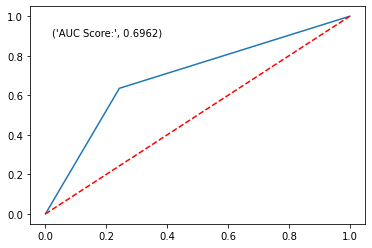

In [113]:
fpr,tpr,threholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.show()

In [114]:
lf = pd.Series({'Model Name': "Tuned Decision Tree",'Accuracy Score':ac,'F1_score':fscore,'Precision':Precision,'Recall':Recall})

final_table= final_table.append(lf, ignore_index=True)
final_table

,Model Name,Accuracy Score,F1_score,Precision,Recall
0,Base model,0.913521,NaN,NaN,0.000000
1,Logistic Regression model,0.709000,0.692063,0.738149,0.651394
2,Tuned Logistic Regression model,0.709000,0.692063,0.738149,0.651394
3,Decision Tree Classifier,0.696000,0.677282,0.725000,0.635458
4,Tuned Decision Tree,0.696000,0.677282,0.725000,0.635458


##### Random Forest Classifier 

In [115]:
X=dfsample.drop('readmitted',axis=1)
y=dfsample['readmitted']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)
rf=RandomForestClassifier()
sfs_model=sfs(estimator=rf,k_features='best',forward=True,scoring='f1_weighted',cv=5)
model=sfs_model.fit(X_train,y_train)
model.k_feature_names_

('discharge_disposition_id',
 'number_outpatient',
 'race_Hispanic',
 'diag_1_diabetes',
 'diag_1_musculoskeletal',
 'diag_1_neoplasms',
 'diag_1_other',
 'diag_2_genitourinary',
 'diag_2_neoplasms',
 'diag_3_musculoskeletal',
 'diag_3_respiratory',
 'metformin_Up',
 'repaglinide_Up',
 'nateglinide_Steady',
 'nateglinide_Up',
 'chlorpropamide_Up',
 'glimepiride_Up',
 'rosiglitazone_No',
 'rosiglitazone_Up',
 'miglitol_Up',
 'troglitazone_Steady',
 'tolazamide_Steady',
 'insulin_Steady',
 'glyburide-metformin_No',
 'glyburide-metformin_Steady',
 'glyburide-metformin_Up',
 'glipizide-metformin_Steady',
 'change_No',
 'No of times admitted')

In [115]:
X=dfsample[['discharge_disposition_id','number_outpatient','race_Hispanic','diag_1_diabetes','diag_1_musculoskeletal',
 'diag_1_neoplasms','diag_1_other','diag_2_genitourinary', 'diag_2_neoplasms','diag_3_musculoskeletal','diag_3_respiratory',
 'metformin_Up', 'repaglinide_Up', 'nateglinide_Steady', 'nateglinide_Up', 'chlorpropamide_Up', 'glimepiride_Up',
 'rosiglitazone_No', 'rosiglitazone_Up', 'miglitol_Up', 'troglitazone_Steady', 'tolazamide_Steady', 'insulin_Steady',
 'glyburide-metformin_No', 'glyburide-metformin_Steady', 'glyburide-metformin_Up', 'glipizide-metformin_Steady',
 'change_No', 'No of times admitted']]    
y=dfsample['readmitted']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)
rf=RandomForestClassifier()
rfmodel=rf.fit(X_train,y_train)
y_pred_prob = rfmodel.predict(X_test)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
ac=accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
fscore= 2*Precision*Recall/(Precision+Recall)
print('Accuracy Sore:',ac)
print('Precision:',Precision)
print('Recall:',Recall)
print('F1_score:',fscore)

Accuracy Sore: 0.697
Precision: 0.7177242888402626
Recall: 0.6533864541832669
F1_score: 0.684045881126173


In [116]:
y_pred_prob_train = rfmodel.predict(X_train)
y_predtrain = [ 0 if x < 0.5 else 1 for x in y_pred_prob_train]
actrain=accuracy_score(y_train,y_predtrain)
print('Train data accuracy score:',actrain)

Train data accuracy score: 0.812


In [117]:
lf = pd.Series({'Model Name': "Random Forest Classifier",'Accuracy Score':ac,'F1_score':fscore,'Precision':Precision,'Recall':Recall})

final_table= final_table.append(lf, ignore_index=True)
final_table

,Model Name,Accuracy Score,F1_score,Precision,Recall
0,Base model,0.913521,NaN,NaN,0.000000
1,Logistic Regression model,0.709000,0.692063,0.738149,0.651394
2,Tuned Logistic Regression model,0.709000,0.692063,0.738149,0.651394
3,Decision Tree Classifier,0.696000,0.677282,0.725000,0.635458
4,Tuned Decision Tree,0.696000,0.677282,0.725000,0.635458
5,Random Forest Classifier,0.697000,0.684046,0.717724,0.653386


In [118]:
rf=RandomForestClassifier()
params={'criterion':['entropy','gini'],'n_estimators':[90,100,120,150,200],'max_depth':range(2,10,2),
        'min_samples_split':range(2,10,2)}
grid=GridSearchCV(estimator=rf,param_grid=params,cv=5,scoring='f1_weighted')
gridmodel=grid.fit(X_train,y_train)
gridmodel.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_split': 2,
 'n_estimators': 90}

In [118]:
rf=RandomForestClassifier(criterion ='entropy',max_depth = 2,min_samples_split = 2,n_estimators = 90,n_jobs=-1)
rfmodel=rf.fit(X_train,y_train)
y_pred_prob = rfmodel.predict(X_test)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
ac=accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
fscore= 2*Precision*Recall/(Precision+Recall)
print('Accuracy Sore:',ac)
print('Precision:',Precision)
print('Recall:',Recall)
print('F1_score:',fscore)

Accuracy Sore: 0.715
Precision: 0.752913752913753
Recall: 0.6434262948207171
F1_score: 0.6938775510204082


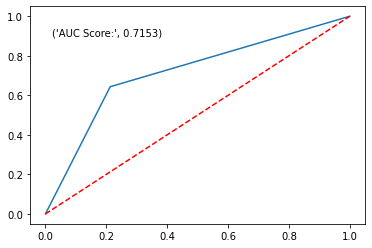

In [119]:
fpr,tpr,threholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.show()

In [120]:
lf = pd.Series({'Model Name': "Tuned Random Forest Classifier",'Accuracy Score':ac,'F1_score':fscore,'Precision':Precision,'Recall':Recall})

final_table= final_table.append(lf, ignore_index=True)
final_table

,Model Name,Accuracy Score,F1_score,Precision,Recall
0,Base model,0.913521,NaN,NaN,0.000000
1,Logistic Regression model,0.709000,0.692063,0.738149,0.651394
2,Tuned Logistic Regression model,0.709000,0.692063,0.738149,0.651394
3,Decision Tree Classifier,0.696000,0.677282,0.725000,0.635458
4,Tuned Decision Tree,0.696000,0.677282,0.725000,0.635458
5,Random Forest Classifier,0.697000,0.684046,0.717724,0.653386
6,Tuned Random Forest Classifier,0.715000,0.693878,0.752914,0.643426


##### KNeighbors Classifier 

In [121]:
# scaling

X=dfsample.drop('readmitted',axis=1)
y=dfsample['readmitted']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)
sc=StandardScaler()
X_train_sc=pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test_sc=pd.DataFrame(sc.fit_transform(X_test),columns=X.columns)

In [177]:
# sanity check

print(X_train.skew())
print(X_train_sc.skew())

patient_nbr                        0.508940
age                               -0.583919
admission_type_id                  1.574735
discharge_disposition_id           2.653514
admission_source_id                1.067610
time_in_hospital                   1.170332
num_lab_procedures                -0.216084
num_procedures                     1.193639
num_medications                    1.418202
number_outpatient                  6.039459
number_emergency                   6.008096
number_inpatient                   4.594815
number_diagnoses                  -0.743286
race_Asian                        12.798263
race_Caucasian                    -1.142861
race_Hispanic                      6.814559
race_Other                         4.522368
gender_Male                        0.134352
diag_1_diabetes                    3.161445
diag_1_digestive                   2.763515
diag_1_genitourinary               4.295725
diag_1_injury                      3.497335
diag_1_musculoskeletal          

In [178]:
print(X_test.skew())
print(X_test_sc.skew())

patient_nbr                        0.640112
age                               -0.674893
admission_type_id                  1.535081
discharge_disposition_id           2.746630
admission_source_id                1.048737
time_in_hospital                   1.205691
num_lab_procedures                -0.237717
num_procedures                     1.197804
num_medications                    1.007281
number_outpatient                  7.143833
number_emergency                   7.583079
number_inpatient                   3.821912
number_diagnoses                  -0.733262
race_Asian                        10.413713
race_Caucasian                    -1.245327
race_Hispanic                      8.285448
race_Other                         4.636536
gender_Male                        0.100276
diag_1_diabetes                    2.848412
diag_1_digestive                   2.652251
diag_1_genitourinary               4.235274
diag_1_injury                      3.259646
diag_1_musculoskeletal          

In [122]:
kn=KNeighborsClassifier()
sfs_model=sfs(estimator=kn,k_features='best',forward=True,scoring='f1_weighted',cv=5)
model=sfs_model.fit(X_train_sc,y_train)
model.k_feature_names_

('number_outpatient',
 'diag_1_injury',
 'diag_1_pregnecy',
 'diag_2_injury',
 'diag_2_musculoskeletal',
 'diag_3_digestive',
 'diag_3_respiratory',
 'metformin_Up',
 'repaglinide_No',
 'repaglinide_Steady',
 'nateglinide_Steady',
 'nateglinide_Up',
 'chlorpropamide_Up',
 'glimepiride_Steady',
 'acetohexamide_Steady',
 'glyburide_Steady',
 'insulin_Steady',
 'diabetesMed_Yes',
 'No of times admitted')

In [122]:
X=dfsample[['number_outpatient','diag_1_injury','diag_1_pregnecy','diag_2_injury','diag_2_musculoskeletal',
 'diag_3_digestive','diag_3_respiratory','metformin_Up','repaglinide_No','repaglinide_Steady',
 'nateglinide_Steady','nateglinide_Up','chlorpropamide_Up','glimepiride_Steady','acetohexamide_Steady',
 'glyburide_Steady','insulin_Steady','diabetesMed_Yes','No of times admitted']]
y=dfsample['readmitted']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)
X_train_sc=pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test_sc=pd.DataFrame(sc.fit_transform(X_test),columns=X.columns)
kn=KNeighborsClassifier()
knmodel=kn.fit(X_train_sc,y_train)
y_pred_prob = knmodel.predict(X_test_sc)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
ac=accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
fscore= 2*Precision*Recall/(Precision+Recall)
print('Accuracy Sore:',ac)
print('Precision:',Precision)
print('Recall:',Recall)
print('F1_score:',fscore)

Accuracy Sore: 0.686
Precision: 0.7079646017699115
Recall: 0.6374501992031872
F1_score: 0.670859538784067


In [123]:
y_pred_prob_train = knmodel.predict(X_train_sc)
y_predtrain = [ 0 if x < 0.5 else 1 for x in y_pred_prob_train]
actrain=accuracy_score(y_train,y_predtrain)
print('Train data accuracy score:',actrain)

Train data accuracy score: 0.7205


In [124]:
lf = pd.Series({'Model Name': "KNeighbors Classifier",'Accuracy Score':ac,'F1_score':fscore,'Precision':Precision,'Recall':Recall})

final_table= final_table.append(lf, ignore_index=True)
final_table

,Model Name,Accuracy Score,F1_score,Precision,Recall
0,Base model,0.913521,NaN,NaN,0.000000
1,Logistic Regression model,0.709000,0.692063,0.738149,0.651394
2,Tuned Logistic Regression model,0.709000,0.692063,0.738149,0.651394
3,Decision Tree Classifier,0.696000,0.677282,0.725000,0.635458
4,Tuned Decision Tree,0.696000,0.677282,0.725000,0.635458
5,Random Forest Classifier,0.697000,0.684046,0.717724,0.653386
6,Tuned Random Forest Classifier,0.715000,0.693878,0.752914,0.643426
7,KNeighbors Classifier,0.686000,0.670860,0.707965,0.637450


In [128]:
kn=KNeighborsClassifier()
params={'n_neighbors': range(1,20,2),'metric':['hamming','euclidean','manhanttan','chebyshev']}
grid=GridSearchCV(estimator=kn,param_grid=params,cv=5,scoring='f1_weighted')
gridmodel=grid.fit(X_train_sc,y_train)
gridmodel.best_params_

{'metric': 'hamming', 'n_neighbors': 19}

In [125]:
kn=KNeighborsClassifier(metric ='hamming',n_neighbors = 19)
knmodel=kn.fit(X_train_sc,y_train)
y_pred_prob = knmodel.predict(X_test_sc)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
ac=accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
fscore= 2*Precision*Recall/(Precision+Recall)
print('Accuracy Sore:',ac)
print('Precision:',Precision)
print('Recall:',Recall)
print('F1_score:',fscore)

Accuracy Sore: 0.502
Precision: 0.5020120724346077
Recall: 0.9940239043824701
F1_score: 0.6671122994652406


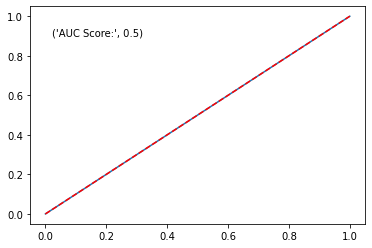

In [126]:
fpr,tpr,threholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.show()

In [127]:
lf = pd.Series({'Model Name': "Tuned KNeighbors Classifier",'Accuracy Score':ac,'F1_score':fscore,'Precision':Precision,'Recall':Recall})

final_table= final_table.append(lf, ignore_index=True)
final_table

,Model Name,Accuracy Score,F1_score,Precision,Recall
0,Base model,0.913521,NaN,NaN,0.000000
1,Logistic Regression model,0.709000,0.692063,0.738149,0.651394
2,Tuned Logistic Regression model,0.709000,0.692063,0.738149,0.651394
3,Decision Tree Classifier,0.696000,0.677282,0.725000,0.635458
4,Tuned Decision Tree,0.696000,0.677282,0.725000,0.635458
5,Random Forest Classifier,0.697000,0.684046,0.717724,0.653386
6,Tuned Random Forest Classifier,0.715000,0.693878,0.752914,0.643426
7,KNeighbors Classifier,0.686000,0.670860,0.707965,0.637450
8,Tuned KNeighbors Classifier,0.502000,0.667112,0.502012,0.994024


##### Adaboost Classifier 

In [128]:
X=dfsample.drop('readmitted',axis=1)
y=dfsample['readmitted']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)
sc=StandardScaler()
X_train_sc=pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test_sc=pd.DataFrame(sc.fit_transform(X_test),columns=X.columns)

In [129]:
ad=AdaBoostClassifier()
sfs_model=sfs(estimator=ad,k_features='best',forward=True,scoring='f1_weighted',cv=5)
model=sfs_model.fit(X_train_sc,y_train)
model.k_feature_names_

('age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'number_emergency',
 'number_diagnoses',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_Male',
 'diag_1_diabetes',
 'diag_1_digestive',
 'diag_1_genitourinary',
 'diag_1_musculoskeletal',
 'diag_1_neoplasms',
 'diag_1_other',
 'diag_1_pregnecy',
 'diag_1_respiratory',
 'diag_2_diabetes',
 'diag_2_digestive',
 'diag_2_injury',
 'diag_2_neoplasms',
 'diag_2_other',
 'diag_2_pregnecy',
 'diag_3_diabetes',
 'diag_3_digestive',
 'diag_3_genitourinary',
 'diag_3_injury',
 'diag_3_other',
 'diag_3_pregnecy',
 'diag_3_respiratory',
 'metformin_Steady',
 'metformin_Up',
 'repaglinide_Up',
 'nateglinide_No',
 'nateglinide_Steady',
 'nateglinide_Up',
 'chlorpropamide_No',
 'chlorpropamide_Steady',
 'chlorpropamide_Up',
 'glimepiride_No',
 'glimepiride_Steady',
 'acetohexamide_Steady',
 'glipizide_No',
 'glipizide_Steady',
 'glipizide_Up',
 'glyburide_Steady',
 'tol

In [129]:
X=dfsample[['age','admission_type_id','discharge_disposition_id','admission_source_id','time_in_hospital',
 'number_emergency','number_diagnoses','race_Asian','race_Caucasian','race_Hispanic','race_Other','gender_Male',
 'diag_1_diabetes','diag_1_digestive','diag_1_genitourinary','diag_1_musculoskeletal','diag_1_neoplasms',
 'diag_1_other','diag_1_pregnecy','diag_1_respiratory','diag_2_diabetes','diag_2_digestive','diag_2_injury',
 'diag_2_neoplasms','diag_2_other','diag_2_pregnecy','diag_3_diabetes','diag_3_digestive','diag_3_genitourinary',
 'diag_3_injury','diag_3_other','diag_3_pregnecy','diag_3_respiratory','metformin_Steady','metformin_Up',
 'repaglinide_Up','nateglinide_No','nateglinide_Steady','nateglinide_Up','chlorpropamide_No',
 'chlorpropamide_Steady','chlorpropamide_Up','glimepiride_No','glimepiride_Steady','acetohexamide_Steady',
 'glipizide_No','glipizide_Steady','glipizide_Up','glyburide_Steady','tolbutamide_Steady','pioglitazone_Up',
 'rosiglitazone_No','rosiglitazone_Steady','rosiglitazone_Up','acarbose_Steady','acarbose_Up','miglitol_No',
 'miglitol_Steady','miglitol_Up','troglitazone_Steady','tolazamide_Steady','insulin_No','glyburide-metformin_No',
 'glyburide-metformin_Steady','glyburide-metformin_Up','glipizide-metformin_Steady','metformin-rosiglitazone_Steady',
 'metformin-pioglitazone_Steady','change_No','diabetesMed_Yes','No of times admitted']]
y=dfsample['readmitted']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)
X_train_sc=pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test_sc=pd.DataFrame(sc.fit_transform(X_test),columns=X.columns)
ad=AdaBoostClassifier()
admodel=ad.fit(X_train_sc,y_train)
y_pred_prob = admodel.predict(X_test_sc)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
ac=accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
fscore= 2*Precision*Recall/(Precision+Recall)
print('Accuracy Sore:',ac)
print('Precision:',Precision)
print('Recall:',Recall)
print('F1_score:',fscore)

Accuracy Sore: 0.732
Precision: 0.75
Recall: 0.6992031872509961
F1_score: 0.7237113402061857


In [130]:
y_pred_prob_train = admodel.predict(X_train_sc)
y_predtrain = [ 0 if x < 0.5 else 1 for x in y_pred_prob_train]
actrain=accuracy_score(y_train,y_predtrain)
print('Train data accuracy score:',actrain)

Train data accuracy score: 0.74


In [131]:
lf = pd.Series({'Model Name': "AdaBoost Classifier",'Accuracy Score':ac,'F1_score':fscore,'Precision':Precision,'Recall':Recall})

final_table= final_table.append(lf, ignore_index=True)
final_table

,Model Name,Accuracy Score,F1_score,Precision,Recall
0,Base model,0.913521,NaN,NaN,0.000000
1,Logistic Regression model,0.709000,0.692063,0.738149,0.651394
2,Tuned Logistic Regression model,0.709000,0.692063,0.738149,0.651394
3,Decision Tree Classifier,0.696000,0.677282,0.725000,0.635458
4,Tuned Decision Tree,0.696000,0.677282,0.725000,0.635458
5,Random Forest Classifier,0.697000,0.684046,0.717724,0.653386
6,Tuned Random Forest Classifier,0.715000,0.693878,0.752914,0.643426
7,KNeighbors Classifier,0.686000,0.670860,0.707965,0.637450
8,Tuned KNeighbors Classifier,0.502000,0.667112,0.502012,0.994024
9,AdaBoost Classifier,0.732000,0.723711,0.750000,0.699203


In [135]:
ad=AdaBoostClassifier()
params={'n_estimators':[100,120,150,200,250,300,350],'learning_rate':[0.1,0.001,0.15,0.015]}
grid=GridSearchCV(estimator=ad,param_grid=params,cv=5,scoring='f1_weighted')
gridmodel=grid.fit(X_train_sc,y_train)
gridmodel.best_params_

{'learning_rate': 0.15, 'n_estimators': 350}

In [132]:
ad=AdaBoostClassifier(n_estimators = 350,learning_rate= 0.15)
admodel=ad.fit(X_train_sc,y_train)
y_pred = admodel.predict(X_test_sc)
ac=accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
fscore= 2*Precision*Recall/(Precision+Recall)
print('Accuracy Sore:',ac)
print('Precision:',Precision)
print('Recall:',Recall)
print('F1_score:',fscore)

Accuracy Sore: 0.728
Precision: 0.7510917030567685
Recall: 0.6852589641434262
F1_score: 0.7166666666666667


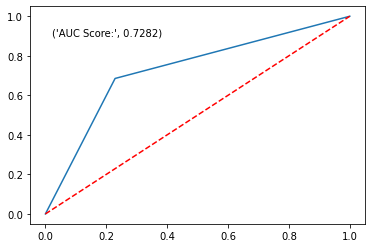

In [133]:
fpr,tpr,threholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.show()

In [134]:
lf = pd.Series({'Model Name': "Tuned AdaBoost Classifier",'Accuracy Score':ac,'F1_score':fscore,'Precision':Precision,'Recall':Recall})

final_table= final_table.append(lf, ignore_index=True)
final_table

,Model Name,Accuracy Score,F1_score,Precision,Recall
0,Base model,0.913521,NaN,NaN,0.000000
1,Logistic Regression model,0.709000,0.692063,0.738149,0.651394
2,Tuned Logistic Regression model,0.709000,0.692063,0.738149,0.651394
3,Decision Tree Classifier,0.696000,0.677282,0.725000,0.635458
4,Tuned Decision Tree,0.696000,0.677282,0.725000,0.635458
5,Random Forest Classifier,0.697000,0.684046,0.717724,0.653386
6,Tuned Random Forest Classifier,0.715000,0.693878,0.752914,0.643426
7,KNeighbors Classifier,0.686000,0.670860,0.707965,0.637450
8,Tuned KNeighbors Classifier,0.502000,0.667112,0.502012,0.994024
9,AdaBoost Classifier,0.732000,0.723711,0.750000,0.699203


#### Catboost classifier

In [135]:
! pip install catboost

In [136]:
from catboost import CatBoostClassifier

In [137]:
X=dfsample.drop('readmitted',axis=1)
y=dfsample['readmitted']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)
sc=StandardScaler()
X_train_sc=pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test_sc=pd.DataFrame(sc.fit_transform(X_test),columns=X.columns)

In [138]:
cb=CatBoostClassifier()
cbmodel=cb.fit(X_train_sc,y_train)
y_pred_prob = cbmodel.predict(X_test_sc)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
ac=accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
fscore= 2*Precision*Recall/(Precision+Recall)
print('Accuracy Sore:',ac)
print('Precision:',Precision)
print('Recall:',Recall)
print('F1_score:',fscore)

Learning rate set to 0.018621
0:	learn: 0.6872407	total: 148ms	remaining: 2m 27s
1:	learn: 0.6816450	total: 150ms	remaining: 1m 14s
2:	learn: 0.6763368	total: 152ms	remaining: 50.7s
3:	learn: 0.6717894	total: 155ms	remaining: 38.5s
4:	learn: 0.6665662	total: 157ms	remaining: 31.3s
5:	learn: 0.6618048	total: 159ms	remaining: 26.4s
6:	learn: 0.6572697	total: 162ms	remaining: 22.9s
7:	learn: 0.6530150	total: 164ms	remaining: 20.3s
8:	learn: 0.6488222	total: 166ms	remaining: 18.3s
9:	learn: 0.6446666	total: 169ms	remaining: 16.7s
10:	learn: 0.6405780	total: 172ms	remaining: 15.4s
11:	learn: 0.6369406	total: 174ms	remaining: 14.4s
12:	learn: 0.6335673	total: 177ms	remaining: 13.4s
13:	learn: 0.6301020	total: 180ms	remaining: 12.7s
14:	learn: 0.6268531	total: 182ms	remaining: 12s
15:	learn: 0.6241031	total: 185ms	remaining: 11.4s
16:	learn: 0.6209876	total: 188ms	remaining: 10.8s
17:	learn: 0.6182150	total: 190ms	remaining: 10.4s
18:	learn: 0.6154555	total: 193ms	remaining: 9.97s
19:	learn: 

160:	learn: 0.5101263	total: 708ms	remaining: 3.69s
161:	learn: 0.5099886	total: 711ms	remaining: 3.68s
162:	learn: 0.5097404	total: 714ms	remaining: 3.66s
163:	learn: 0.5093610	total: 717ms	remaining: 3.65s
164:	learn: 0.5089750	total: 719ms	remaining: 3.64s
165:	learn: 0.5086064	total: 722ms	remaining: 3.63s
166:	learn: 0.5080801	total: 725ms	remaining: 3.61s
167:	learn: 0.5077939	total: 727ms	remaining: 3.6s
168:	learn: 0.5075962	total: 757ms	remaining: 3.72s
169:	learn: 0.5073421	total: 760ms	remaining: 3.71s
170:	learn: 0.5069360	total: 762ms	remaining: 3.69s
171:	learn: 0.5067606	total: 765ms	remaining: 3.68s
172:	learn: 0.5065166	total: 767ms	remaining: 3.67s
173:	learn: 0.5062090	total: 769ms	remaining: 3.65s
174:	learn: 0.5061327	total: 772ms	remaining: 3.64s
175:	learn: 0.5058627	total: 774ms	remaining: 3.62s
176:	learn: 0.5056213	total: 776ms	remaining: 3.61s
177:	learn: 0.5053445	total: 779ms	remaining: 3.6s
178:	learn: 0.5051644	total: 781ms	remaining: 3.58s
179:	learn: 0.

340:	learn: 0.4733321	total: 1.42s	remaining: 2.75s
341:	learn: 0.4731398	total: 1.43s	remaining: 2.74s
342:	learn: 0.4729558	total: 1.43s	remaining: 2.74s
343:	learn: 0.4727517	total: 1.46s	remaining: 2.79s
344:	learn: 0.4727070	total: 1.49s	remaining: 2.83s
345:	learn: 0.4725118	total: 1.49s	remaining: 2.82s
346:	learn: 0.4724471	total: 1.5s	remaining: 2.82s
347:	learn: 0.4722907	total: 1.5s	remaining: 2.82s
348:	learn: 0.4721167	total: 1.51s	remaining: 2.81s
349:	learn: 0.4719416	total: 1.51s	remaining: 2.81s
350:	learn: 0.4717697	total: 1.51s	remaining: 2.8s
351:	learn: 0.4714996	total: 1.52s	remaining: 2.79s
352:	learn: 0.4713951	total: 1.52s	remaining: 2.79s
353:	learn: 0.4713270	total: 1.52s	remaining: 2.78s
354:	learn: 0.4711166	total: 1.53s	remaining: 2.78s
355:	learn: 0.4708536	total: 1.53s	remaining: 2.78s
356:	learn: 0.4706671	total: 1.54s	remaining: 2.77s
357:	learn: 0.4705498	total: 1.54s	remaining: 2.76s
358:	learn: 0.4704583	total: 1.54s	remaining: 2.75s
359:	learn: 0.4

513:	learn: 0.4421345	total: 2.16s	remaining: 2.04s
514:	learn: 0.4419463	total: 2.17s	remaining: 2.04s
515:	learn: 0.4417554	total: 2.17s	remaining: 2.03s
516:	learn: 0.4414902	total: 2.17s	remaining: 2.03s
517:	learn: 0.4412812	total: 2.17s	remaining: 2.02s
518:	learn: 0.4410496	total: 2.18s	remaining: 2.02s
519:	learn: 0.4408524	total: 2.18s	remaining: 2.01s
520:	learn: 0.4406160	total: 2.18s	remaining: 2.01s
521:	learn: 0.4402989	total: 2.19s	remaining: 2s
522:	learn: 0.4400976	total: 2.19s	remaining: 2s
523:	learn: 0.4399366	total: 2.19s	remaining: 1.99s
524:	learn: 0.4396427	total: 2.19s	remaining: 1.99s
525:	learn: 0.4394371	total: 2.2s	remaining: 1.98s
526:	learn: 0.4391829	total: 2.2s	remaining: 1.98s
527:	learn: 0.4390424	total: 2.22s	remaining: 1.99s
528:	learn: 0.4388905	total: 2.24s	remaining: 1.99s
529:	learn: 0.4385614	total: 2.24s	remaining: 1.99s
530:	learn: 0.4382743	total: 2.25s	remaining: 1.98s
531:	learn: 0.4380155	total: 2.25s	remaining: 1.98s
532:	learn: 0.437720

675:	learn: 0.4078174	total: 2.91s	remaining: 1.39s
676:	learn: 0.4076035	total: 2.91s	remaining: 1.39s
677:	learn: 0.4074523	total: 2.91s	remaining: 1.38s
678:	learn: 0.4071314	total: 2.91s	remaining: 1.38s
679:	learn: 0.4069769	total: 2.92s	remaining: 1.37s
680:	learn: 0.4069672	total: 2.92s	remaining: 1.37s
681:	learn: 0.4067730	total: 2.92s	remaining: 1.36s
682:	learn: 0.4065547	total: 2.92s	remaining: 1.36s
683:	learn: 0.4062759	total: 2.93s	remaining: 1.35s
684:	learn: 0.4061127	total: 2.93s	remaining: 1.35s
685:	learn: 0.4059414	total: 2.93s	remaining: 1.34s
686:	learn: 0.4057575	total: 2.94s	remaining: 1.34s
687:	learn: 0.4054805	total: 2.94s	remaining: 1.33s
688:	learn: 0.4052643	total: 2.94s	remaining: 1.33s
689:	learn: 0.4050639	total: 2.94s	remaining: 1.32s
690:	learn: 0.4048361	total: 2.95s	remaining: 1.32s
691:	learn: 0.4046127	total: 2.95s	remaining: 1.31s
692:	learn: 0.4043485	total: 2.95s	remaining: 1.31s
693:	learn: 0.4042401	total: 2.96s	remaining: 1.3s
694:	learn: 0

855:	learn: 0.3774411	total: 3.44s	remaining: 579ms
856:	learn: 0.3772930	total: 3.45s	remaining: 575ms
857:	learn: 0.3771353	total: 3.45s	remaining: 571ms
858:	learn: 0.3771287	total: 3.45s	remaining: 567ms
859:	learn: 0.3769057	total: 3.45s	remaining: 562ms
860:	learn: 0.3767560	total: 3.46s	remaining: 558ms
861:	learn: 0.3765485	total: 3.46s	remaining: 554ms
862:	learn: 0.3763770	total: 3.46s	remaining: 550ms
863:	learn: 0.3762133	total: 3.46s	remaining: 545ms
864:	learn: 0.3760812	total: 3.47s	remaining: 541ms
865:	learn: 0.3759220	total: 3.47s	remaining: 537ms
866:	learn: 0.3757501	total: 3.47s	remaining: 533ms
867:	learn: 0.3755767	total: 3.48s	remaining: 528ms
868:	learn: 0.3755684	total: 3.48s	remaining: 524ms
869:	learn: 0.3755614	total: 3.48s	remaining: 520ms
870:	learn: 0.3755552	total: 3.48s	remaining: 516ms
871:	learn: 0.3753093	total: 3.49s	remaining: 512ms
872:	learn: 0.3750970	total: 3.49s	remaining: 508ms
873:	learn: 0.3749075	total: 3.49s	remaining: 503ms
874:	learn: 

In [139]:
lf = pd.Series({'Model Name': "Catboost Classifier",'Accuracy Score':ac,'F1_score':fscore,'Precision':Precision,'Recall':Recall})

final_table= final_table.append(lf, ignore_index=True)
final_table

,Model Name,Accuracy Score,F1_score,Precision,Recall
0,Base model,0.913521,NaN,NaN,0.000000
1,Logistic Regression model,0.709000,0.692063,0.738149,0.651394
2,Tuned Logistic Regression model,0.709000,0.692063,0.738149,0.651394
3,Decision Tree Classifier,0.696000,0.677282,0.725000,0.635458
4,Tuned Decision Tree,0.696000,0.677282,0.725000,0.635458
5,Random Forest Classifier,0.697000,0.684046,0.717724,0.653386
6,Tuned Random Forest Classifier,0.715000,0.693878,0.752914,0.643426
7,KNeighbors Classifier,0.686000,0.670860,0.707965,0.637450
8,Tuned KNeighbors Classifier,0.502000,0.667112,0.502012,0.994024
9,AdaBoost Classifier,0.732000,0.723711,0.750000,0.699203


In [212]:
cb=CatBoostClassifier()
params={'iterations':[30,50,70,90],'random_seed':[10,20,30,40,50],'learning_rate':[0.5,0.1,0.3,0.7]}
grid=GridSearchCV(estimator=cb,param_grid=params,cv=5,scoring='f1_weighted')
gridmodel=grid.fit(X_train_sc,y_train)
gridmodel.best_params_

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.3764849	total: 15.8ms	remaining: 459ms
1:	learn: 0.2764636	total: 37.8ms	remaining: 530ms
2:	learn: 0.2537455	total: 56.6ms	remaining: 510ms
3:	learn: 0.2467744	total: 75.1ms	remaining: 488ms
4:	learn: 0.2402504	total: 95.5ms	remaining: 477ms
5:	learn: 0.2302996	total: 115ms	remaining: 459ms
6:	learn: 0.2230071	total: 134ms	remaining: 441ms
7:	learn: 0.2216253	total: 149ms	remaining: 409ms
8:	learn: 0.2180722	total: 163ms	remaining: 381ms
9:	learn: 0.2127921	total: 179ms	remaining: 357ms
10:	learn: 0.2109762	total: 195ms	remaining: 337ms
11:	learn: 0.2062582	total: 210ms	remaining: 315ms
12:	learn: 0.2037175	total: 224ms	remaining: 294ms
13:	learn: 0.1992056	total: 240ms	remaining: 275ms
14:	learn: 0.1964818	total: 257ms	remaining: 257ms
15:	learn: 0.1922737	total: 274ms	remaining: 239ms
16:	learn: 0.1890285	total: 289ms	remaining: 221ms
17:	learn: 0.1833022	total: 306ms	remaining: 204ms
18:	learn: 0.1793863	total: 321ms	remaining: 186ms
19:	learn: 0.1721271	total: 336ms	re

18:	learn: 0.1835494	total: 194ms	remaining: 112ms
19:	learn: 0.1784227	total: 206ms	remaining: 103ms
20:	learn: 0.1775808	total: 215ms	remaining: 92.3ms
21:	learn: 0.1719909	total: 225ms	remaining: 81.9ms
22:	learn: 0.1694627	total: 235ms	remaining: 71.6ms
23:	learn: 0.1654484	total: 246ms	remaining: 61.6ms
24:	learn: 0.1619738	total: 258ms	remaining: 51.6ms
25:	learn: 0.1581047	total: 267ms	remaining: 41ms
26:	learn: 0.1538772	total: 275ms	remaining: 30.6ms
27:	learn: 0.1512312	total: 284ms	remaining: 20.3ms
28:	learn: 0.1502690	total: 293ms	remaining: 10.1ms
29:	learn: 0.1458445	total: 302ms	remaining: 0us
0:	learn: 0.3687428	total: 8.02ms	remaining: 232ms
1:	learn: 0.2804865	total: 16.6ms	remaining: 232ms
2:	learn: 0.2577627	total: 25.5ms	remaining: 230ms
3:	learn: 0.2527759	total: 34.6ms	remaining: 225ms
4:	learn: 0.2376509	total: 43.7ms	remaining: 218ms
5:	learn: 0.2300078	total: 52.5ms	remaining: 210ms
6:	learn: 0.2243299	total: 62.9ms	remaining: 207ms
7:	learn: 0.2218104	total:

0:	learn: 0.3751226	total: 12.8ms	remaining: 370ms
1:	learn: 0.2822696	total: 26.6ms	remaining: 373ms
2:	learn: 0.2539598	total: 40.4ms	remaining: 364ms
3:	learn: 0.2438216	total: 54.3ms	remaining: 353ms
4:	learn: 0.2397307	total: 67.6ms	remaining: 338ms
5:	learn: 0.2347529	total: 81.1ms	remaining: 324ms
6:	learn: 0.2290001	total: 94.4ms	remaining: 310ms
7:	learn: 0.2268329	total: 108ms	remaining: 297ms
8:	learn: 0.2168019	total: 121ms	remaining: 283ms
9:	learn: 0.2146729	total: 135ms	remaining: 270ms
10:	learn: 0.2104143	total: 148ms	remaining: 256ms
11:	learn: 0.2047131	total: 162ms	remaining: 243ms
12:	learn: 0.2027328	total: 175ms	remaining: 229ms
13:	learn: 0.2016521	total: 189ms	remaining: 216ms
14:	learn: 0.1959378	total: 201ms	remaining: 201ms
15:	learn: 0.1915995	total: 214ms	remaining: 187ms
16:	learn: 0.1841501	total: 226ms	remaining: 173ms
17:	learn: 0.1816201	total: 240ms	remaining: 160ms
18:	learn: 0.1745874	total: 252ms	remaining: 146ms
19:	learn: 0.1719672	total: 262ms	

12:	learn: 0.2055153	total: 228ms	remaining: 298ms
13:	learn: 0.2041885	total: 246ms	remaining: 281ms
14:	learn: 0.2022145	total: 264ms	remaining: 264ms
15:	learn: 0.1996407	total: 282ms	remaining: 247ms
16:	learn: 0.1966305	total: 300ms	remaining: 229ms
17:	learn: 0.1952220	total: 320ms	remaining: 213ms
18:	learn: 0.1908048	total: 337ms	remaining: 195ms
19:	learn: 0.1845177	total: 353ms	remaining: 176ms
20:	learn: 0.1803024	total: 370ms	remaining: 159ms
21:	learn: 0.1800055	total: 387ms	remaining: 141ms
22:	learn: 0.1770198	total: 406ms	remaining: 124ms
23:	learn: 0.1738968	total: 425ms	remaining: 106ms
24:	learn: 0.1686819	total: 444ms	remaining: 88.8ms
25:	learn: 0.1627200	total: 462ms	remaining: 71.1ms
26:	learn: 0.1584220	total: 481ms	remaining: 53.4ms
27:	learn: 0.1581578	total: 497ms	remaining: 35.5ms
28:	learn: 0.1557638	total: 513ms	remaining: 17.7ms
29:	learn: 0.1556608	total: 529ms	remaining: 0us
0:	learn: 0.3743486	total: 14ms	remaining: 405ms
1:	learn: 0.2776753	total: 28.

0:	learn: 0.3329051	total: 12ms	remaining: 348ms
1:	learn: 0.2819919	total: 23.6ms	remaining: 331ms
2:	learn: 0.2674702	total: 35.1ms	remaining: 316ms
3:	learn: 0.2518253	total: 47ms	remaining: 305ms
4:	learn: 0.2391217	total: 59.3ms	remaining: 296ms
5:	learn: 0.2325306	total: 71.7ms	remaining: 287ms
6:	learn: 0.2273029	total: 84.2ms	remaining: 277ms
7:	learn: 0.2222554	total: 95ms	remaining: 261ms
8:	learn: 0.2144781	total: 107ms	remaining: 250ms
9:	learn: 0.2102498	total: 119ms	remaining: 238ms
10:	learn: 0.2052342	total: 131ms	remaining: 227ms
11:	learn: 0.2041223	total: 142ms	remaining: 213ms
12:	learn: 0.2003289	total: 152ms	remaining: 199ms
13:	learn: 0.1995897	total: 161ms	remaining: 184ms
14:	learn: 0.1948862	total: 172ms	remaining: 172ms
15:	learn: 0.1904262	total: 182ms	remaining: 159ms
16:	learn: 0.1875200	total: 191ms	remaining: 146ms
17:	learn: 0.1848604	total: 202ms	remaining: 135ms
18:	learn: 0.1785217	total: 212ms	remaining: 123ms
19:	learn: 0.1782061	total: 221ms	remai

22:	learn: 0.2400894	total: 178ms	remaining: 54.1ms
23:	learn: 0.2386361	total: 186ms	remaining: 46.6ms
24:	learn: 0.2359274	total: 195ms	remaining: 39.1ms
25:	learn: 0.2329338	total: 204ms	remaining: 31.4ms
26:	learn: 0.2310428	total: 213ms	remaining: 23.7ms
27:	learn: 0.2294681	total: 223ms	remaining: 15.9ms
28:	learn: 0.2286694	total: 231ms	remaining: 7.98ms
29:	learn: 0.2273413	total: 239ms	remaining: 0us
0:	learn: 0.6041737	total: 7.44ms	remaining: 216ms
1:	learn: 0.5342266	total: 15.9ms	remaining: 223ms
2:	learn: 0.4626429	total: 23.7ms	remaining: 213ms
3:	learn: 0.4125843	total: 31.3ms	remaining: 203ms
4:	learn: 0.3840793	total: 39.2ms	remaining: 196ms
5:	learn: 0.3531949	total: 47.1ms	remaining: 188ms
6:	learn: 0.3369923	total: 54.4ms	remaining: 179ms
7:	learn: 0.3233603	total: 61.9ms	remaining: 170ms
8:	learn: 0.3061827	total: 69.6ms	remaining: 162ms
9:	learn: 0.2987568	total: 77.4ms	remaining: 155ms
10:	learn: 0.2873011	total: 84.7ms	remaining: 146ms
11:	learn: 0.2822312	tota

13:	learn: 0.2744002	total: 204ms	remaining: 233ms
14:	learn: 0.2707562	total: 224ms	remaining: 224ms
15:	learn: 0.2653158	total: 243ms	remaining: 213ms
16:	learn: 0.2615652	total: 262ms	remaining: 201ms
17:	learn: 0.2566079	total: 281ms	remaining: 187ms
18:	learn: 0.2532828	total: 298ms	remaining: 173ms
19:	learn: 0.2492400	total: 317ms	remaining: 158ms
20:	learn: 0.2461795	total: 333ms	remaining: 143ms
21:	learn: 0.2429655	total: 348ms	remaining: 126ms
22:	learn: 0.2409174	total: 367ms	remaining: 112ms
23:	learn: 0.2384997	total: 383ms	remaining: 95.7ms
24:	learn: 0.2361427	total: 397ms	remaining: 79.3ms
25:	learn: 0.2340146	total: 411ms	remaining: 63.2ms
26:	learn: 0.2332447	total: 426ms	remaining: 47.3ms
27:	learn: 0.2311312	total: 439ms	remaining: 31.4ms
28:	learn: 0.2292754	total: 452ms	remaining: 15.6ms
29:	learn: 0.2278673	total: 464ms	remaining: 0us
0:	learn: 0.6000300	total: 12.5ms	remaining: 364ms
1:	learn: 0.5164075	total: 25.1ms	remaining: 352ms
2:	learn: 0.4656840	total: 

0:	learn: 0.5777186	total: 14.3ms	remaining: 416ms
1:	learn: 0.4954383	total: 30ms	remaining: 419ms
2:	learn: 0.4453662	total: 44.2ms	remaining: 398ms
3:	learn: 0.4077959	total: 59.4ms	remaining: 386ms
4:	learn: 0.3793176	total: 73.5ms	remaining: 368ms
5:	learn: 0.3572594	total: 87.6ms	remaining: 350ms
6:	learn: 0.3326287	total: 102ms	remaining: 334ms
7:	learn: 0.3199272	total: 116ms	remaining: 320ms
8:	learn: 0.3033083	total: 131ms	remaining: 305ms
9:	learn: 0.2903768	total: 146ms	remaining: 291ms
10:	learn: 0.2801886	total: 161ms	remaining: 277ms
11:	learn: 0.2725133	total: 175ms	remaining: 263ms
12:	learn: 0.2686483	total: 190ms	remaining: 248ms
13:	learn: 0.2635015	total: 210ms	remaining: 240ms
14:	learn: 0.2605420	total: 229ms	remaining: 229ms
15:	learn: 0.2576099	total: 248ms	remaining: 217ms
16:	learn: 0.2535305	total: 266ms	remaining: 203ms
17:	learn: 0.2495991	total: 285ms	remaining: 190ms
18:	learn: 0.2451631	total: 302ms	remaining: 175ms
19:	learn: 0.2442052	total: 318ms	rem

13:	learn: 0.2663831	total: 205ms	remaining: 234ms
14:	learn: 0.2625999	total: 223ms	remaining: 223ms
15:	learn: 0.2573714	total: 240ms	remaining: 210ms
16:	learn: 0.2537940	total: 257ms	remaining: 197ms
17:	learn: 0.2517637	total: 275ms	remaining: 183ms
18:	learn: 0.2478733	total: 294ms	remaining: 170ms
19:	learn: 0.2445915	total: 309ms	remaining: 154ms
20:	learn: 0.2424132	total: 323ms	remaining: 139ms
21:	learn: 0.2401182	total: 337ms	remaining: 123ms
22:	learn: 0.2385131	total: 352ms	remaining: 107ms
23:	learn: 0.2372991	total: 372ms	remaining: 93ms
24:	learn: 0.2351094	total: 390ms	remaining: 78ms
25:	learn: 0.2325598	total: 408ms	remaining: 62.7ms
26:	learn: 0.2306403	total: 424ms	remaining: 47.2ms
27:	learn: 0.2292562	total: 443ms	remaining: 31.7ms
28:	learn: 0.2279505	total: 459ms	remaining: 15.8ms
29:	learn: 0.2257763	total: 471ms	remaining: 0us
0:	learn: 0.5850128	total: 14.4ms	remaining: 417ms
1:	learn: 0.5188194	total: 28.4ms	remaining: 398ms
2:	learn: 0.4681657	total: 42.9

26:	learn: 0.2300459	total: 366ms	remaining: 40.7ms
27:	learn: 0.2291209	total: 379ms	remaining: 27ms
28:	learn: 0.2278753	total: 390ms	remaining: 13.4ms
29:	learn: 0.2268851	total: 402ms	remaining: 0us
0:	learn: 0.4665669	total: 12.7ms	remaining: 368ms
1:	learn: 0.3364251	total: 27ms	remaining: 378ms
2:	learn: 0.2978003	total: 41.4ms	remaining: 373ms
3:	learn: 0.2726992	total: 56.1ms	remaining: 364ms
4:	learn: 0.2628218	total: 70.8ms	remaining: 354ms
5:	learn: 0.2543329	total: 85.5ms	remaining: 342ms
6:	learn: 0.2515122	total: 100ms	remaining: 329ms
7:	learn: 0.2461708	total: 114ms	remaining: 314ms
8:	learn: 0.2431311	total: 129ms	remaining: 301ms
9:	learn: 0.2358524	total: 143ms	remaining: 286ms
10:	learn: 0.2346168	total: 158ms	remaining: 273ms
11:	learn: 0.2310697	total: 172ms	remaining: 258ms
12:	learn: 0.2283494	total: 186ms	remaining: 244ms
13:	learn: 0.2259149	total: 206ms	remaining: 236ms
14:	learn: 0.2240126	total: 224ms	remaining: 224ms
15:	learn: 0.2199990	total: 242ms	rema

13:	learn: 0.2185434	total: 215ms	remaining: 245ms
14:	learn: 0.2159293	total: 232ms	remaining: 232ms
15:	learn: 0.2142326	total: 249ms	remaining: 218ms
16:	learn: 0.2114856	total: 267ms	remaining: 205ms
17:	learn: 0.2103609	total: 284ms	remaining: 189ms
18:	learn: 0.2085183	total: 303ms	remaining: 175ms
19:	learn: 0.2062785	total: 319ms	remaining: 159ms
20:	learn: 0.2022156	total: 334ms	remaining: 143ms
21:	learn: 0.1982430	total: 349ms	remaining: 127ms
22:	learn: 0.1958739	total: 364ms	remaining: 111ms
23:	learn: 0.1938023	total: 378ms	remaining: 94.6ms
24:	learn: 0.1888268	total: 398ms	remaining: 79.5ms
25:	learn: 0.1870788	total: 416ms	remaining: 63.9ms
26:	learn: 0.1843311	total: 433ms	remaining: 48.1ms
27:	learn: 0.1832941	total: 450ms	remaining: 32.1ms
28:	learn: 0.1799957	total: 467ms	remaining: 16.1ms
29:	learn: 0.1792694	total: 480ms	remaining: 0us
0:	learn: 0.4603957	total: 14.1ms	remaining: 410ms
1:	learn: 0.3408942	total: 28.4ms	remaining: 398ms
2:	learn: 0.3048834	total: 

0:	learn: 0.4656310	total: 14.7ms	remaining: 427ms
1:	learn: 0.3436721	total: 28.8ms	remaining: 403ms
2:	learn: 0.3050634	total: 43.4ms	remaining: 390ms
3:	learn: 0.2715920	total: 58.6ms	remaining: 381ms
4:	learn: 0.2638055	total: 76.2ms	remaining: 381ms
5:	learn: 0.2543288	total: 90.5ms	remaining: 362ms
6:	learn: 0.2468723	total: 106ms	remaining: 347ms
7:	learn: 0.2445437	total: 120ms	remaining: 331ms
8:	learn: 0.2370610	total: 135ms	remaining: 315ms
9:	learn: 0.2336941	total: 150ms	remaining: 299ms
10:	learn: 0.2302520	total: 164ms	remaining: 283ms
11:	learn: 0.2243122	total: 178ms	remaining: 268ms
12:	learn: 0.2230953	total: 193ms	remaining: 252ms
13:	learn: 0.2225797	total: 212ms	remaining: 242ms
14:	learn: 0.2199854	total: 230ms	remaining: 230ms
15:	learn: 0.2189859	total: 248ms	remaining: 217ms
16:	learn: 0.2149882	total: 265ms	remaining: 203ms
17:	learn: 0.2123881	total: 284ms	remaining: 189ms
18:	learn: 0.2106339	total: 300ms	remaining: 173ms
19:	learn: 0.2078004	total: 315ms	r

13:	learn: 0.2212828	total: 208ms	remaining: 238ms
14:	learn: 0.2182846	total: 226ms	remaining: 226ms
15:	learn: 0.2145541	total: 244ms	remaining: 213ms
16:	learn: 0.2125672	total: 261ms	remaining: 199ms
17:	learn: 0.2087833	total: 278ms	remaining: 185ms
18:	learn: 0.2040806	total: 298ms	remaining: 172ms
19:	learn: 0.2008127	total: 311ms	remaining: 156ms
20:	learn: 0.1970496	total: 324ms	remaining: 139ms
21:	learn: 0.1945809	total: 336ms	remaining: 122ms
22:	learn: 0.1937810	total: 347ms	remaining: 106ms
23:	learn: 0.1928676	total: 359ms	remaining: 89.7ms
24:	learn: 0.1898715	total: 370ms	remaining: 74ms
25:	learn: 0.1882727	total: 385ms	remaining: 59.3ms
26:	learn: 0.1865096	total: 399ms	remaining: 44.4ms
27:	learn: 0.1838131	total: 414ms	remaining: 29.5ms
28:	learn: 0.1831266	total: 427ms	remaining: 14.7ms
29:	learn: 0.1824279	total: 442ms	remaining: 0us
0:	learn: 0.4648412	total: 14.1ms	remaining: 408ms
1:	learn: 0.3378187	total: 28.4ms	remaining: 398ms
2:	learn: 0.2922906	total: 42

24:	learn: 0.1986163	total: 383ms	remaining: 76.7ms
25:	learn: 0.1966033	total: 397ms	remaining: 61.1ms
26:	learn: 0.1937222	total: 412ms	remaining: 45.8ms
27:	learn: 0.1934961	total: 426ms	remaining: 30.4ms
28:	learn: 0.1908083	total: 440ms	remaining: 15.2ms
29:	learn: 0.1869959	total: 455ms	remaining: 0us
0:	learn: 0.4273188	total: 14.4ms	remaining: 417ms
1:	learn: 0.3422121	total: 28.7ms	remaining: 402ms
2:	learn: 0.3042831	total: 43.6ms	remaining: 392ms
3:	learn: 0.2752800	total: 58.1ms	remaining: 378ms
4:	learn: 0.2535242	total: 73.6ms	remaining: 368ms
5:	learn: 0.2471585	total: 87.9ms	remaining: 351ms
6:	learn: 0.2437437	total: 102ms	remaining: 337ms
7:	learn: 0.2396193	total: 117ms	remaining: 323ms
8:	learn: 0.2366264	total: 132ms	remaining: 308ms
9:	learn: 0.2297033	total: 146ms	remaining: 293ms
10:	learn: 0.2260632	total: 161ms	remaining: 278ms
11:	learn: 0.2252535	total: 175ms	remaining: 262ms
12:	learn: 0.2204017	total: 189ms	remaining: 247ms
13:	learn: 0.2197837	total: 209m

14:	learn: 0.1720921	total: 222ms	remaining: 222ms
15:	learn: 0.1660009	total: 241ms	remaining: 211ms
16:	learn: 0.1579132	total: 258ms	remaining: 198ms
17:	learn: 0.1532992	total: 276ms	remaining: 184ms
18:	learn: 0.1494635	total: 294ms	remaining: 170ms
19:	learn: 0.1474910	total: 311ms	remaining: 156ms
20:	learn: 0.1453782	total: 327ms	remaining: 140ms
21:	learn: 0.1449552	total: 343ms	remaining: 125ms
22:	learn: 0.1424059	total: 359ms	remaining: 109ms
23:	learn: 0.1350154	total: 374ms	remaining: 93.6ms
24:	learn: 0.1298272	total: 386ms	remaining: 77.2ms
25:	learn: 0.1268495	total: 402ms	remaining: 61.8ms
26:	learn: 0.1238907	total: 416ms	remaining: 46.3ms
27:	learn: 0.1222325	total: 430ms	remaining: 30.7ms
28:	learn: 0.1168443	total: 444ms	remaining: 15.3ms
29:	learn: 0.1129099	total: 459ms	remaining: 0us
0:	learn: 0.3241249	total: 12.7ms	remaining: 368ms
1:	learn: 0.2570101	total: 26.2ms	remaining: 367ms
2:	learn: 0.2433559	total: 39.4ms	remaining: 355ms
3:	learn: 0.2344962	total: 

0:	learn: 0.2802785	total: 14.1ms	remaining: 409ms
1:	learn: 0.2603465	total: 28.3ms	remaining: 396ms
2:	learn: 0.2533215	total: 42.7ms	remaining: 384ms
3:	learn: 0.2382445	total: 57ms	remaining: 371ms
4:	learn: 0.2303705	total: 72ms	remaining: 360ms
5:	learn: 0.2208799	total: 86.5ms	remaining: 346ms
6:	learn: 0.2191638	total: 100ms	remaining: 329ms
7:	learn: 0.2078018	total: 116ms	remaining: 318ms
8:	learn: 0.2015277	total: 131ms	remaining: 305ms
9:	learn: 0.1925080	total: 145ms	remaining: 290ms
10:	learn: 0.1913706	total: 159ms	remaining: 275ms
11:	learn: 0.1891606	total: 173ms	remaining: 260ms
12:	learn: 0.1827430	total: 188ms	remaining: 246ms
13:	learn: 0.1816969	total: 208ms	remaining: 238ms
14:	learn: 0.1750197	total: 226ms	remaining: 226ms
15:	learn: 0.1671346	total: 244ms	remaining: 214ms
16:	learn: 0.1629866	total: 261ms	remaining: 199ms
17:	learn: 0.1620916	total: 279ms	remaining: 186ms
18:	learn: 0.1584615	total: 294ms	remaining: 170ms
19:	learn: 0.1504407	total: 310ms	remai

13:	learn: 0.1799449	total: 214ms	remaining: 245ms
14:	learn: 0.1728403	total: 232ms	remaining: 232ms
15:	learn: 0.1713843	total: 250ms	remaining: 218ms
16:	learn: 0.1687050	total: 267ms	remaining: 204ms
17:	learn: 0.1635435	total: 281ms	remaining: 187ms
18:	learn: 0.1632103	total: 295ms	remaining: 171ms
19:	learn: 0.1587761	total: 307ms	remaining: 153ms
20:	learn: 0.1505167	total: 320ms	remaining: 137ms
21:	learn: 0.1461138	total: 332ms	remaining: 121ms
22:	learn: 0.1377869	total: 344ms	remaining: 105ms
23:	learn: 0.1349899	total: 355ms	remaining: 88.8ms
24:	learn: 0.1348192	total: 370ms	remaining: 73.9ms
25:	learn: 0.1295843	total: 384ms	remaining: 59.1ms
26:	learn: 0.1246726	total: 398ms	remaining: 44.2ms
27:	learn: 0.1245697	total: 411ms	remaining: 29.4ms
28:	learn: 0.1223985	total: 424ms	remaining: 14.6ms
29:	learn: 0.1203044	total: 439ms	remaining: 0us
0:	learn: 0.2700534	total: 13.7ms	remaining: 398ms
1:	learn: 0.2433431	total: 28.4ms	remaining: 397ms
2:	learn: 0.2305924	total: 

24:	learn: 0.1317832	total: 379ms	remaining: 75.9ms
25:	learn: 0.1311009	total: 393ms	remaining: 60.5ms
26:	learn: 0.1256544	total: 407ms	remaining: 45.2ms
27:	learn: 0.1246639	total: 421ms	remaining: 30.1ms
28:	learn: 0.1230807	total: 436ms	remaining: 15ms
29:	learn: 0.1200430	total: 450ms	remaining: 0us
0:	learn: 0.3210078	total: 14.3ms	remaining: 414ms
1:	learn: 0.2606821	total: 28.5ms	remaining: 400ms
2:	learn: 0.2438581	total: 43ms	remaining: 387ms
3:	learn: 0.2359262	total: 57.9ms	remaining: 376ms
4:	learn: 0.2321104	total: 72.4ms	remaining: 362ms
5:	learn: 0.2238633	total: 86.6ms	remaining: 346ms
6:	learn: 0.2134793	total: 101ms	remaining: 332ms
7:	learn: 0.2011190	total: 115ms	remaining: 317ms
8:	learn: 0.1972431	total: 130ms	remaining: 302ms
9:	learn: 0.1920310	total: 145ms	remaining: 289ms
10:	learn: 0.1888085	total: 159ms	remaining: 275ms
11:	learn: 0.1878191	total: 173ms	remaining: 259ms
12:	learn: 0.1855351	total: 187ms	remaining: 244ms
13:	learn: 0.1790993	total: 207ms	re

13:	learn: 0.1732594	total: 212ms	remaining: 243ms
14:	learn: 0.1683494	total: 230ms	remaining: 230ms
15:	learn: 0.1669797	total: 248ms	remaining: 217ms
16:	learn: 0.1623285	total: 266ms	remaining: 203ms
17:	learn: 0.1608652	total: 283ms	remaining: 189ms
18:	learn: 0.1594198	total: 301ms	remaining: 174ms
19:	learn: 0.1590765	total: 316ms	remaining: 158ms
20:	learn: 0.1534290	total: 331ms	remaining: 142ms
21:	learn: 0.1532099	total: 339ms	remaining: 123ms
22:	learn: 0.1450834	total: 353ms	remaining: 108ms
23:	learn: 0.1403872	total: 370ms	remaining: 92.5ms
24:	learn: 0.1384275	total: 389ms	remaining: 77.9ms
25:	learn: 0.1345580	total: 405ms	remaining: 62.3ms
26:	learn: 0.1311402	total: 419ms	remaining: 46.6ms
27:	learn: 0.1272842	total: 436ms	remaining: 31.2ms
28:	learn: 0.1250732	total: 452ms	remaining: 15.6ms
29:	learn: 0.1210301	total: 465ms	remaining: 0us
0:	learn: 0.3764849	total: 11.1ms	remaining: 543ms
1:	learn: 0.2764636	total: 28.6ms	remaining: 687ms
2:	learn: 0.2537455	total: 

0:	learn: 0.3755848	total: 14.3ms	remaining: 699ms
1:	learn: 0.2770439	total: 29ms	remaining: 695ms
2:	learn: 0.2548659	total: 43.2ms	remaining: 676ms
3:	learn: 0.2439155	total: 57.8ms	remaining: 665ms
4:	learn: 0.2364514	total: 72.7ms	remaining: 655ms
5:	learn: 0.2297500	total: 87.1ms	remaining: 639ms
6:	learn: 0.2245894	total: 102ms	remaining: 627ms
7:	learn: 0.2185949	total: 117ms	remaining: 613ms
8:	learn: 0.2137693	total: 131ms	remaining: 598ms
9:	learn: 0.2083166	total: 146ms	remaining: 583ms
10:	learn: 0.2055531	total: 160ms	remaining: 569ms
11:	learn: 0.2025815	total: 175ms	remaining: 553ms
12:	learn: 0.2000157	total: 189ms	remaining: 537ms
13:	learn: 0.1976728	total: 208ms	remaining: 535ms
14:	learn: 0.1936147	total: 226ms	remaining: 527ms
15:	learn: 0.1890849	total: 243ms	remaining: 517ms
16:	learn: 0.1872390	total: 261ms	remaining: 506ms
17:	learn: 0.1867137	total: 279ms	remaining: 496ms
18:	learn: 0.1807284	total: 295ms	remaining: 481ms
19:	learn: 0.1773686	total: 311ms	rem

13:	learn: 0.1999402	total: 215ms	remaining: 553ms
14:	learn: 0.1975169	total: 232ms	remaining: 542ms
15:	learn: 0.1944556	total: 250ms	remaining: 532ms
16:	learn: 0.1888632	total: 268ms	remaining: 521ms
17:	learn: 0.1869332	total: 286ms	remaining: 508ms
18:	learn: 0.1853858	total: 305ms	remaining: 498ms
19:	learn: 0.1824475	total: 320ms	remaining: 480ms
20:	learn: 0.1820032	total: 334ms	remaining: 461ms
21:	learn: 0.1788084	total: 348ms	remaining: 443ms
22:	learn: 0.1784148	total: 362ms	remaining: 425ms
23:	learn: 0.1746864	total: 377ms	remaining: 408ms
24:	learn: 0.1709210	total: 393ms	remaining: 393ms
25:	learn: 0.1659944	total: 408ms	remaining: 376ms
26:	learn: 0.1631526	total: 422ms	remaining: 359ms
27:	learn: 0.1584433	total: 436ms	remaining: 343ms
28:	learn: 0.1538332	total: 452ms	remaining: 327ms
29:	learn: 0.1535101	total: 466ms	remaining: 311ms
30:	learn: 0.1475186	total: 478ms	remaining: 293ms
31:	learn: 0.1447615	total: 490ms	remaining: 276ms
32:	learn: 0.1413492	total: 502

24:	learn: 0.1558813	total: 390ms	remaining: 390ms
25:	learn: 0.1543103	total: 403ms	remaining: 372ms
26:	learn: 0.1526334	total: 417ms	remaining: 356ms
27:	learn: 0.1500907	total: 432ms	remaining: 339ms
28:	learn: 0.1483912	total: 446ms	remaining: 323ms
29:	learn: 0.1429980	total: 460ms	remaining: 307ms
30:	learn: 0.1378431	total: 473ms	remaining: 290ms
31:	learn: 0.1343300	total: 485ms	remaining: 273ms
32:	learn: 0.1323348	total: 497ms	remaining: 256ms
33:	learn: 0.1272374	total: 509ms	remaining: 239ms
34:	learn: 0.1252663	total: 520ms	remaining: 223ms
35:	learn: 0.1239601	total: 532ms	remaining: 207ms
36:	learn: 0.1209711	total: 548ms	remaining: 193ms
37:	learn: 0.1187501	total: 563ms	remaining: 178ms
38:	learn: 0.1178833	total: 576ms	remaining: 162ms
39:	learn: 0.1150196	total: 590ms	remaining: 147ms
40:	learn: 0.1114267	total: 605ms	remaining: 133ms
41:	learn: 0.1108840	total: 618ms	remaining: 118ms
42:	learn: 0.1073571	total: 631ms	remaining: 103ms
43:	learn: 0.1059007	total: 643

35:	learn: 0.1298643	total: 560ms	remaining: 218ms
36:	learn: 0.1278107	total: 579ms	remaining: 204ms
37:	learn: 0.1236257	total: 596ms	remaining: 188ms
38:	learn: 0.1210595	total: 612ms	remaining: 172ms
39:	learn: 0.1187133	total: 632ms	remaining: 158ms
40:	learn: 0.1131271	total: 647ms	remaining: 142ms
41:	learn: 0.1124827	total: 661ms	remaining: 126ms
42:	learn: 0.1106555	total: 675ms	remaining: 110ms
43:	learn: 0.1084144	total: 687ms	remaining: 93.6ms
44:	learn: 0.1079514	total: 698ms	remaining: 77.5ms
45:	learn: 0.1050473	total: 709ms	remaining: 61.7ms
46:	learn: 0.1020894	total: 726ms	remaining: 46.3ms
47:	learn: 0.1018573	total: 739ms	remaining: 30.8ms
48:	learn: 0.0994374	total: 754ms	remaining: 15.4ms
49:	learn: 0.0963419	total: 768ms	remaining: 0us
0:	learn: 0.3250018	total: 14ms	remaining: 687ms
1:	learn: 0.2771150	total: 28.5ms	remaining: 685ms
2:	learn: 0.2548108	total: 43.3ms	remaining: 678ms
3:	learn: 0.2431480	total: 59ms	remaining: 679ms
4:	learn: 0.2362203	total: 73.1

48:	learn: 0.1039162	total: 733ms	remaining: 15ms
49:	learn: 0.1031633	total: 748ms	remaining: 0us
0:	learn: 0.3717953	total: 16.7ms	remaining: 820ms
1:	learn: 0.2832667	total: 31ms	remaining: 744ms
2:	learn: 0.2686775	total: 45.5ms	remaining: 713ms
3:	learn: 0.2525411	total: 60.2ms	remaining: 692ms
4:	learn: 0.2454295	total: 74.4ms	remaining: 669ms
5:	learn: 0.2329953	total: 89.2ms	remaining: 654ms
6:	learn: 0.2267266	total: 104ms	remaining: 637ms
7:	learn: 0.2215069	total: 118ms	remaining: 621ms
8:	learn: 0.2176390	total: 132ms	remaining: 602ms
9:	learn: 0.2136085	total: 148ms	remaining: 591ms
10:	learn: 0.2099065	total: 163ms	remaining: 576ms
11:	learn: 0.2088344	total: 176ms	remaining: 558ms
12:	learn: 0.2055153	total: 191ms	remaining: 543ms
13:	learn: 0.2041885	total: 210ms	remaining: 539ms
14:	learn: 0.2022145	total: 228ms	remaining: 531ms
15:	learn: 0.1996407	total: 245ms	remaining: 521ms
16:	learn: 0.1966305	total: 264ms	remaining: 512ms
17:	learn: 0.1952220	total: 279ms	remain

14:	learn: 0.1975952	total: 205ms	remaining: 479ms
15:	learn: 0.1928623	total: 224ms	remaining: 475ms
16:	learn: 0.1891752	total: 241ms	remaining: 468ms
17:	learn: 0.1868832	total: 259ms	remaining: 460ms
18:	learn: 0.1863542	total: 276ms	remaining: 451ms
19:	learn: 0.1804031	total: 298ms	remaining: 447ms
20:	learn: 0.1800955	total: 313ms	remaining: 433ms
21:	learn: 0.1759422	total: 328ms	remaining: 418ms
22:	learn: 0.1747761	total: 342ms	remaining: 402ms
23:	learn: 0.1719725	total: 356ms	remaining: 386ms
24:	learn: 0.1668119	total: 377ms	remaining: 377ms
25:	learn: 0.1616252	total: 396ms	remaining: 365ms
26:	learn: 0.1605502	total: 412ms	remaining: 351ms
27:	learn: 0.1559941	total: 430ms	remaining: 338ms
28:	learn: 0.1557108	total: 448ms	remaining: 324ms
29:	learn: 0.1516339	total: 464ms	remaining: 310ms
30:	learn: 0.1499065	total: 480ms	remaining: 294ms
31:	learn: 0.1454333	total: 494ms	remaining: 278ms
32:	learn: 0.1442094	total: 508ms	remaining: 262ms
33:	learn: 0.1420845	total: 523

33:	learn: 0.1246062	total: 544ms	remaining: 256ms
34:	learn: 0.1209093	total: 558ms	remaining: 239ms
35:	learn: 0.1185939	total: 572ms	remaining: 223ms
36:	learn: 0.1145157	total: 586ms	remaining: 206ms
37:	learn: 0.1110688	total: 600ms	remaining: 190ms
38:	learn: 0.1082990	total: 615ms	remaining: 173ms
39:	learn: 0.1067285	total: 629ms	remaining: 157ms
40:	learn: 0.1038811	total: 642ms	remaining: 141ms
41:	learn: 0.1007138	total: 654ms	remaining: 124ms
42:	learn: 0.0998291	total: 664ms	remaining: 108ms
43:	learn: 0.0978838	total: 676ms	remaining: 92.2ms
44:	learn: 0.0949794	total: 688ms	remaining: 76.5ms
45:	learn: 0.0935302	total: 700ms	remaining: 60.8ms
46:	learn: 0.0924196	total: 711ms	remaining: 45.4ms
47:	learn: 0.0886214	total: 723ms	remaining: 30.1ms
48:	learn: 0.0871883	total: 738ms	remaining: 15.1ms
49:	learn: 0.0863852	total: 753ms	remaining: 0us
0:	learn: 0.3325447	total: 14.4ms	remaining: 704ms
1:	learn: 0.2800719	total: 29ms	remaining: 696ms
2:	learn: 0.2544318	total: 43

44:	learn: 0.2137486	total: 538ms	remaining: 59.7ms
45:	learn: 0.2126254	total: 550ms	remaining: 47.8ms
46:	learn: 0.2120318	total: 562ms	remaining: 35.8ms
47:	learn: 0.2113225	total: 574ms	remaining: 23.9ms
48:	learn: 0.2109609	total: 581ms	remaining: 11.9ms
49:	learn: 0.2101492	total: 593ms	remaining: 0us
0:	learn: 0.6034718	total: 15.6ms	remaining: 763ms
1:	learn: 0.5322801	total: 30.3ms	remaining: 728ms
2:	learn: 0.4652043	total: 45ms	remaining: 705ms
3:	learn: 0.4266399	total: 59ms	remaining: 678ms
4:	learn: 0.3858857	total: 73.6ms	remaining: 662ms
5:	learn: 0.3529377	total: 88.4ms	remaining: 648ms
6:	learn: 0.3350863	total: 103ms	remaining: 632ms
7:	learn: 0.3209060	total: 117ms	remaining: 616ms
8:	learn: 0.3052092	total: 133ms	remaining: 605ms
9:	learn: 0.2978470	total: 147ms	remaining: 588ms
10:	learn: 0.2881466	total: 161ms	remaining: 572ms
11:	learn: 0.2834875	total: 177ms	remaining: 559ms
12:	learn: 0.2756914	total: 192ms	remaining: 545ms
13:	learn: 0.2688511	total: 212ms	re

13:	learn: 0.2636908	total: 218ms	remaining: 560ms
14:	learn: 0.2577195	total: 235ms	remaining: 548ms
15:	learn: 0.2539360	total: 253ms	remaining: 537ms
16:	learn: 0.2512565	total: 276ms	remaining: 536ms
17:	learn: 0.2481632	total: 311ms	remaining: 552ms
18:	learn: 0.2464883	total: 340ms	remaining: 554ms
19:	learn: 0.2429550	total: 367ms	remaining: 550ms
20:	learn: 0.2408826	total: 386ms	remaining: 533ms
21:	learn: 0.2391296	total: 404ms	remaining: 514ms
22:	learn: 0.2370049	total: 421ms	remaining: 494ms
23:	learn: 0.2360771	total: 440ms	remaining: 477ms
24:	learn: 0.2331416	total: 460ms	remaining: 460ms
25:	learn: 0.2321508	total: 477ms	remaining: 440ms
26:	learn: 0.2301635	total: 496ms	remaining: 422ms
27:	learn: 0.2281837	total: 513ms	remaining: 403ms
28:	learn: 0.2270624	total: 530ms	remaining: 384ms
29:	learn: 0.2265225	total: 550ms	remaining: 367ms
30:	learn: 0.2258797	total: 571ms	remaining: 350ms
31:	learn: 0.2254828	total: 588ms	remaining: 331ms
32:	learn: 0.2243874	total: 602

32:	learn: 0.2258248	total: 549ms	remaining: 283ms
33:	learn: 0.2233210	total: 565ms	remaining: 266ms
34:	learn: 0.2221873	total: 580ms	remaining: 248ms
35:	learn: 0.2204464	total: 594ms	remaining: 231ms
36:	learn: 0.2187041	total: 608ms	remaining: 214ms
37:	learn: 0.2177588	total: 624ms	remaining: 197ms
38:	learn: 0.2172447	total: 635ms	remaining: 179ms
39:	learn: 0.2164027	total: 647ms	remaining: 162ms
40:	learn: 0.2158034	total: 659ms	remaining: 145ms
41:	learn: 0.2156379	total: 670ms	remaining: 128ms
42:	learn: 0.2148545	total: 684ms	remaining: 111ms
43:	learn: 0.2140679	total: 697ms	remaining: 95.1ms
44:	learn: 0.2124211	total: 711ms	remaining: 79ms
45:	learn: 0.2110340	total: 727ms	remaining: 63.2ms
46:	learn: 0.2100423	total: 742ms	remaining: 47.4ms
47:	learn: 0.2096198	total: 756ms	remaining: 31.5ms
48:	learn: 0.2087959	total: 771ms	remaining: 15.7ms
49:	learn: 0.2075989	total: 786ms	remaining: 0us
0:	learn: 0.5847963	total: 12.7ms	remaining: 623ms
1:	learn: 0.5184260	total: 25

0:	learn: 0.6039747	total: 9.44ms	remaining: 462ms
1:	learn: 0.5200949	total: 19ms	remaining: 455ms
2:	learn: 0.4666694	total: 28.8ms	remaining: 451ms
3:	learn: 0.4263279	total: 39.9ms	remaining: 459ms
4:	learn: 0.3955687	total: 51.1ms	remaining: 460ms
5:	learn: 0.3635307	total: 61.4ms	remaining: 450ms
6:	learn: 0.3364602	total: 71.2ms	remaining: 438ms
7:	learn: 0.3238649	total: 80.7ms	remaining: 424ms
8:	learn: 0.3067570	total: 90.6ms	remaining: 413ms
9:	learn: 0.2936743	total: 101ms	remaining: 404ms
10:	learn: 0.2873991	total: 111ms	remaining: 393ms
11:	learn: 0.2776807	total: 120ms	remaining: 381ms
12:	learn: 0.2744512	total: 130ms	remaining: 370ms
13:	learn: 0.2689033	total: 141ms	remaining: 362ms
14:	learn: 0.2660580	total: 153ms	remaining: 356ms
15:	learn: 0.2635061	total: 164ms	remaining: 348ms
16:	learn: 0.2589397	total: 175ms	remaining: 340ms
17:	learn: 0.2537029	total: 188ms	remaining: 334ms
18:	learn: 0.2508802	total: 201ms	remaining: 327ms
19:	learn: 0.2492898	total: 212ms	

13:	learn: 0.2635015	total: 209ms	remaining: 538ms
14:	learn: 0.2605420	total: 227ms	remaining: 530ms
15:	learn: 0.2576099	total: 246ms	remaining: 523ms
16:	learn: 0.2535305	total: 264ms	remaining: 512ms
17:	learn: 0.2495991	total: 281ms	remaining: 499ms
18:	learn: 0.2451631	total: 299ms	remaining: 488ms
19:	learn: 0.2442052	total: 314ms	remaining: 471ms
20:	learn: 0.2424764	total: 328ms	remaining: 453ms
21:	learn: 0.2410109	total: 343ms	remaining: 436ms
22:	learn: 0.2392717	total: 358ms	remaining: 420ms
23:	learn: 0.2369692	total: 372ms	remaining: 403ms
24:	learn: 0.2330922	total: 393ms	remaining: 393ms
25:	learn: 0.2318340	total: 411ms	remaining: 379ms
26:	learn: 0.2281081	total: 429ms	remaining: 365ms
27:	learn: 0.2259698	total: 446ms	remaining: 351ms
28:	learn: 0.2246265	total: 465ms	remaining: 337ms
29:	learn: 0.2238740	total: 477ms	remaining: 318ms
30:	learn: 0.2224129	total: 490ms	remaining: 300ms
31:	learn: 0.2211871	total: 501ms	remaining: 282ms
32:	learn: 0.2193115	total: 513

24:	learn: 0.2349510	total: 392ms	remaining: 392ms
25:	learn: 0.2335177	total: 410ms	remaining: 379ms
26:	learn: 0.2317284	total: 429ms	remaining: 366ms
27:	learn: 0.2308991	total: 447ms	remaining: 351ms
28:	learn: 0.2284340	total: 465ms	remaining: 336ms
29:	learn: 0.2267160	total: 483ms	remaining: 322ms
30:	learn: 0.2248491	total: 499ms	remaining: 306ms
31:	learn: 0.2235981	total: 514ms	remaining: 289ms
32:	learn: 0.2227809	total: 528ms	remaining: 272ms
33:	learn: 0.2215607	total: 543ms	remaining: 255ms
34:	learn: 0.2206003	total: 556ms	remaining: 238ms
35:	learn: 0.2193973	total: 572ms	remaining: 222ms
36:	learn: 0.2190647	total: 586ms	remaining: 206ms
37:	learn: 0.2184450	total: 600ms	remaining: 190ms
38:	learn: 0.2173587	total: 614ms	remaining: 173ms
39:	learn: 0.2167109	total: 628ms	remaining: 157ms
40:	learn: 0.2156059	total: 643ms	remaining: 141ms
41:	learn: 0.2138764	total: 656ms	remaining: 125ms
42:	learn: 0.2130974	total: 669ms	remaining: 109ms
43:	learn: 0.2123804	total: 681

47:	learn: 0.2103476	total: 738ms	remaining: 30.8ms
48:	learn: 0.2099427	total: 752ms	remaining: 15.3ms
49:	learn: 0.2092436	total: 766ms	remaining: 0us
0:	learn: 0.6040473	total: 14.8ms	remaining: 723ms
1:	learn: 0.5352951	total: 31.8ms	remaining: 764ms
2:	learn: 0.4816571	total: 51.8ms	remaining: 812ms
3:	learn: 0.4279599	total: 67.2ms	remaining: 773ms
4:	learn: 0.3875776	total: 81.6ms	remaining: 734ms
5:	learn: 0.3648225	total: 96ms	remaining: 704ms
6:	learn: 0.3480498	total: 103ms	remaining: 634ms
7:	learn: 0.3273161	total: 117ms	remaining: 614ms
8:	learn: 0.3171119	total: 131ms	remaining: 598ms
9:	learn: 0.3025759	total: 146ms	remaining: 586ms
10:	learn: 0.2941045	total: 165ms	remaining: 584ms
11:	learn: 0.2835057	total: 179ms	remaining: 568ms
12:	learn: 0.2754704	total: 199ms	remaining: 567ms
13:	learn: 0.2716825	total: 217ms	remaining: 559ms
14:	learn: 0.2646995	total: 236ms	remaining: 550ms
15:	learn: 0.2597562	total: 254ms	remaining: 539ms
16:	learn: 0.2566956	total: 270ms	rem

12:	learn: 0.2702539	total: 193ms	remaining: 550ms
13:	learn: 0.2672742	total: 210ms	remaining: 540ms
14:	learn: 0.2595874	total: 228ms	remaining: 531ms
15:	learn: 0.2563399	total: 246ms	remaining: 524ms
16:	learn: 0.2530861	total: 264ms	remaining: 513ms
17:	learn: 0.2510930	total: 282ms	remaining: 501ms
18:	learn: 0.2479793	total: 298ms	remaining: 486ms
19:	learn: 0.2452564	total: 313ms	remaining: 470ms
20:	learn: 0.2424033	total: 328ms	remaining: 453ms
21:	learn: 0.2406926	total: 343ms	remaining: 436ms
22:	learn: 0.2391974	total: 355ms	remaining: 416ms
23:	learn: 0.2372116	total: 370ms	remaining: 401ms
24:	learn: 0.2353959	total: 385ms	remaining: 385ms
25:	learn: 0.2324123	total: 400ms	remaining: 369ms
26:	learn: 0.2300459	total: 415ms	remaining: 354ms
27:	learn: 0.2291209	total: 430ms	remaining: 338ms
28:	learn: 0.2278753	total: 445ms	remaining: 322ms
29:	learn: 0.2268851	total: 457ms	remaining: 305ms
30:	learn: 0.2247820	total: 469ms	remaining: 288ms
31:	learn: 0.2232260	total: 481

23:	learn: 0.1932557	total: 379ms	remaining: 411ms
24:	learn: 0.1922319	total: 397ms	remaining: 397ms
25:	learn: 0.1899213	total: 415ms	remaining: 383ms
26:	learn: 0.1878907	total: 433ms	remaining: 368ms
27:	learn: 0.1862677	total: 450ms	remaining: 353ms
28:	learn: 0.1819388	total: 469ms	remaining: 339ms
29:	learn: 0.1816223	total: 483ms	remaining: 322ms
30:	learn: 0.1812087	total: 497ms	remaining: 305ms
31:	learn: 0.1780916	total: 511ms	remaining: 288ms
32:	learn: 0.1765657	total: 522ms	remaining: 269ms
33:	learn: 0.1759090	total: 534ms	remaining: 251ms
34:	learn: 0.1721618	total: 549ms	remaining: 235ms
35:	learn: 0.1703091	total: 564ms	remaining: 219ms
36:	learn: 0.1680266	total: 577ms	remaining: 203ms
37:	learn: 0.1642206	total: 592ms	remaining: 187ms
38:	learn: 0.1610171	total: 606ms	remaining: 171ms
39:	learn: 0.1604807	total: 620ms	remaining: 155ms
40:	learn: 0.1595738	total: 632ms	remaining: 139ms
41:	learn: 0.1572722	total: 644ms	remaining: 123ms
42:	learn: 0.1571973	total: 656

34:	learn: 0.1692597	total: 562ms	remaining: 241ms
35:	learn: 0.1676373	total: 577ms	remaining: 224ms
36:	learn: 0.1651666	total: 591ms	remaining: 208ms
37:	learn: 0.1621569	total: 605ms	remaining: 191ms
38:	learn: 0.1607088	total: 619ms	remaining: 175ms
39:	learn: 0.1603869	total: 635ms	remaining: 159ms
40:	learn: 0.1567353	total: 647ms	remaining: 142ms
41:	learn: 0.1549754	total: 659ms	remaining: 126ms
42:	learn: 0.1518231	total: 671ms	remaining: 109ms
43:	learn: 0.1508879	total: 683ms	remaining: 93.1ms
44:	learn: 0.1475776	total: 695ms	remaining: 77.2ms
45:	learn: 0.1459629	total: 707ms	remaining: 61.4ms
46:	learn: 0.1438287	total: 722ms	remaining: 46.1ms
47:	learn: 0.1398683	total: 737ms	remaining: 30.7ms
48:	learn: 0.1390366	total: 750ms	remaining: 15.3ms
49:	learn: 0.1372546	total: 764ms	remaining: 0us
0:	learn: 0.4603957	total: 14.2ms	remaining: 696ms
1:	learn: 0.3408942	total: 28.9ms	remaining: 694ms
2:	learn: 0.3048834	total: 43.2ms	remaining: 676ms
3:	learn: 0.2764148	total: 

45:	learn: 0.1467529	total: 708ms	remaining: 61.6ms
46:	learn: 0.1441152	total: 723ms	remaining: 46.2ms
47:	learn: 0.1425889	total: 737ms	remaining: 30.7ms
48:	learn: 0.1390178	total: 753ms	remaining: 15.4ms
49:	learn: 0.1371812	total: 768ms	remaining: 0us
0:	learn: 0.4567941	total: 14.3ms	remaining: 701ms
1:	learn: 0.3368655	total: 28.3ms	remaining: 679ms
2:	learn: 0.2841039	total: 42.3ms	remaining: 663ms
3:	learn: 0.2704695	total: 56.4ms	remaining: 648ms
4:	learn: 0.2547668	total: 71ms	remaining: 639ms
5:	learn: 0.2468993	total: 85.5ms	remaining: 627ms
6:	learn: 0.2402175	total: 99.8ms	remaining: 613ms
7:	learn: 0.2357955	total: 114ms	remaining: 600ms
8:	learn: 0.2315522	total: 129ms	remaining: 585ms
9:	learn: 0.2288147	total: 143ms	remaining: 572ms
10:	learn: 0.2248383	total: 158ms	remaining: 559ms
11:	learn: 0.2179019	total: 173ms	remaining: 547ms
12:	learn: 0.2144349	total: 187ms	remaining: 533ms
13:	learn: 0.2122061	total: 206ms	remaining: 530ms
14:	learn: 0.2102757	total: 224ms	

14:	learn: 0.2160683	total: 225ms	remaining: 524ms
15:	learn: 0.2144141	total: 242ms	remaining: 515ms
16:	learn: 0.2122237	total: 260ms	remaining: 504ms
17:	learn: 0.2099588	total: 276ms	remaining: 491ms
18:	learn: 0.2078804	total: 294ms	remaining: 479ms
19:	learn: 0.2036508	total: 315ms	remaining: 473ms
20:	learn: 0.1996578	total: 333ms	remaining: 460ms
21:	learn: 0.1955492	total: 348ms	remaining: 443ms
22:	learn: 0.1946686	total: 363ms	remaining: 426ms
23:	learn: 0.1941894	total: 382ms	remaining: 414ms
24:	learn: 0.1925342	total: 399ms	remaining: 399ms
25:	learn: 0.1899118	total: 413ms	remaining: 381ms
26:	learn: 0.1886915	total: 427ms	remaining: 363ms
27:	learn: 0.1863076	total: 441ms	remaining: 347ms
28:	learn: 0.1838833	total: 455ms	remaining: 329ms
29:	learn: 0.1815549	total: 467ms	remaining: 312ms
30:	learn: 0.1795278	total: 479ms	remaining: 294ms
31:	learn: 0.1758496	total: 490ms	remaining: 276ms
32:	learn: 0.1723125	total: 502ms	remaining: 259ms
33:	learn: 0.1696629	total: 514

30:	learn: 0.1818227	total: 383ms	remaining: 235ms
31:	learn: 0.1814489	total: 395ms	remaining: 222ms
32:	learn: 0.1792205	total: 408ms	remaining: 210ms
33:	learn: 0.1784269	total: 420ms	remaining: 198ms
34:	learn: 0.1762889	total: 432ms	remaining: 185ms
35:	learn: 0.1753115	total: 448ms	remaining: 174ms
36:	learn: 0.1719494	total: 463ms	remaining: 163ms
37:	learn: 0.1693033	total: 476ms	remaining: 150ms
38:	learn: 0.1689721	total: 490ms	remaining: 138ms
39:	learn: 0.1671280	total: 503ms	remaining: 126ms
40:	learn: 0.1616631	total: 517ms	remaining: 114ms
41:	learn: 0.1583247	total: 529ms	remaining: 101ms
42:	learn: 0.1554115	total: 539ms	remaining: 87.8ms
43:	learn: 0.1520887	total: 552ms	remaining: 75.3ms
44:	learn: 0.1504372	total: 565ms	remaining: 62.8ms
45:	learn: 0.1495310	total: 577ms	remaining: 50.1ms
46:	learn: 0.1477923	total: 588ms	remaining: 37.6ms
47:	learn: 0.1454643	total: 600ms	remaining: 25ms
48:	learn: 0.1437350	total: 612ms	remaining: 12.5ms
49:	learn: 0.1398835	total

43:	learn: 0.1476333	total: 720ms	remaining: 98.2ms
44:	learn: 0.1452548	total: 735ms	remaining: 81.6ms
45:	learn: 0.1443451	total: 749ms	remaining: 65.1ms
46:	learn: 0.1427163	total: 764ms	remaining: 48.8ms
47:	learn: 0.1420713	total: 779ms	remaining: 32.4ms
48:	learn: 0.1411696	total: 794ms	remaining: 16.2ms
49:	learn: 0.1386704	total: 808ms	remaining: 0us
0:	learn: 0.4628379	total: 12.3ms	remaining: 601ms
1:	learn: 0.3405666	total: 25.6ms	remaining: 615ms
2:	learn: 0.3046067	total: 38.7ms	remaining: 606ms
3:	learn: 0.2719108	total: 52.4ms	remaining: 603ms
4:	learn: 0.2621650	total: 65.7ms	remaining: 592ms
5:	learn: 0.2467315	total: 81.2ms	remaining: 596ms
6:	learn: 0.2361712	total: 95.2ms	remaining: 585ms
7:	learn: 0.2311617	total: 108ms	remaining: 570ms
8:	learn: 0.2262430	total: 122ms	remaining: 555ms
9:	learn: 0.2196043	total: 135ms	remaining: 541ms
10:	learn: 0.2185064	total: 148ms	remaining: 525ms
11:	learn: 0.2136435	total: 162ms	remaining: 511ms
12:	learn: 0.2091511	total: 17

13:	learn: 0.2197837	total: 208ms	remaining: 535ms
14:	learn: 0.2160564	total: 226ms	remaining: 528ms
15:	learn: 0.2128406	total: 243ms	remaining: 516ms
16:	learn: 0.2093712	total: 262ms	remaining: 508ms
17:	learn: 0.2051083	total: 280ms	remaining: 498ms
18:	learn: 0.2031983	total: 298ms	remaining: 486ms
19:	learn: 0.2011074	total: 315ms	remaining: 473ms
20:	learn: 0.2000918	total: 330ms	remaining: 455ms
21:	learn: 0.1966288	total: 345ms	remaining: 439ms
22:	learn: 0.1941619	total: 360ms	remaining: 422ms
23:	learn: 0.1938531	total: 378ms	remaining: 410ms
24:	learn: 0.1905929	total: 397ms	remaining: 397ms
25:	learn: 0.1892505	total: 414ms	remaining: 383ms
26:	learn: 0.1857712	total: 432ms	remaining: 368ms
27:	learn: 0.1846652	total: 449ms	remaining: 352ms
28:	learn: 0.1812980	total: 467ms	remaining: 338ms
29:	learn: 0.1802264	total: 482ms	remaining: 321ms
30:	learn: 0.1774166	total: 496ms	remaining: 304ms
31:	learn: 0.1766178	total: 510ms	remaining: 287ms
32:	learn: 0.1742090	total: 525

30:	learn: 0.1102738	total: 380ms	remaining: 233ms
31:	learn: 0.1057192	total: 392ms	remaining: 220ms
32:	learn: 0.1032649	total: 403ms	remaining: 208ms
33:	learn: 0.1028942	total: 415ms	remaining: 195ms
34:	learn: 0.1000091	total: 428ms	remaining: 183ms
35:	learn: 0.0967184	total: 441ms	remaining: 171ms
36:	learn: 0.0923796	total: 451ms	remaining: 158ms
37:	learn: 0.0907569	total: 461ms	remaining: 146ms
38:	learn: 0.0877372	total: 472ms	remaining: 133ms
39:	learn: 0.0846544	total: 482ms	remaining: 120ms
40:	learn: 0.0798219	total: 492ms	remaining: 108ms
41:	learn: 0.0775902	total: 502ms	remaining: 95.5ms
42:	learn: 0.0753714	total: 511ms	remaining: 83.2ms
43:	learn: 0.0721821	total: 521ms	remaining: 71.1ms
44:	learn: 0.0695337	total: 531ms	remaining: 59ms
45:	learn: 0.0670312	total: 544ms	remaining: 47.3ms
46:	learn: 0.0654568	total: 555ms	remaining: 35.5ms
47:	learn: 0.0649985	total: 567ms	remaining: 23.6ms
48:	learn: 0.0634785	total: 579ms	remaining: 11.8ms
49:	learn: 0.0622026	tota

45:	learn: 0.0773694	total: 557ms	remaining: 48.4ms
46:	learn: 0.0747970	total: 569ms	remaining: 36.3ms
47:	learn: 0.0736853	total: 581ms	remaining: 24.2ms
48:	learn: 0.0704210	total: 593ms	remaining: 12.1ms
49:	learn: 0.0686531	total: 604ms	remaining: 0us
0:	learn: 0.3216343	total: 13.8ms	remaining: 677ms
1:	learn: 0.2522428	total: 29.2ms	remaining: 702ms
2:	learn: 0.2444466	total: 43.4ms	remaining: 680ms
3:	learn: 0.2366199	total: 57.5ms	remaining: 662ms
4:	learn: 0.2312901	total: 71.8ms	remaining: 646ms
5:	learn: 0.2213106	total: 86.3ms	remaining: 633ms
6:	learn: 0.2146089	total: 100ms	remaining: 614ms
7:	learn: 0.2056577	total: 115ms	remaining: 603ms
8:	learn: 0.2029315	total: 129ms	remaining: 589ms
9:	learn: 0.1945893	total: 144ms	remaining: 576ms
10:	learn: 0.1885722	total: 158ms	remaining: 562ms
11:	learn: 0.1827507	total: 173ms	remaining: 547ms
12:	learn: 0.1800591	total: 187ms	remaining: 531ms
13:	learn: 0.1756259	total: 201ms	remaining: 517ms
14:	learn: 0.1703394	total: 221ms

13:	learn: 0.1873066	total: 211ms	remaining: 542ms
14:	learn: 0.1770369	total: 229ms	remaining: 533ms
15:	learn: 0.1719898	total: 247ms	remaining: 525ms
16:	learn: 0.1669237	total: 264ms	remaining: 513ms
17:	learn: 0.1589025	total: 282ms	remaining: 501ms
18:	learn: 0.1582846	total: 302ms	remaining: 492ms
19:	learn: 0.1556288	total: 319ms	remaining: 479ms
20:	learn: 0.1517605	total: 334ms	remaining: 461ms
21:	learn: 0.1480062	total: 348ms	remaining: 443ms
22:	learn: 0.1443489	total: 362ms	remaining: 425ms
23:	learn: 0.1415196	total: 374ms	remaining: 405ms
24:	learn: 0.1361703	total: 390ms	remaining: 390ms
25:	learn: 0.1322534	total: 404ms	remaining: 373ms
26:	learn: 0.1311628	total: 418ms	remaining: 356ms
27:	learn: 0.1260983	total: 432ms	remaining: 339ms
28:	learn: 0.1239466	total: 445ms	remaining: 323ms
29:	learn: 0.1214502	total: 460ms	remaining: 307ms
30:	learn: 0.1202248	total: 471ms	remaining: 289ms
31:	learn: 0.1200720	total: 482ms	remaining: 271ms
32:	learn: 0.1162429	total: 495

28:	learn: 0.1156107	total: 362ms	remaining: 262ms
29:	learn: 0.1103538	total: 376ms	remaining: 251ms
30:	learn: 0.1098355	total: 389ms	remaining: 239ms
31:	learn: 0.1072512	total: 404ms	remaining: 227ms
32:	learn: 0.1046026	total: 418ms	remaining: 216ms
33:	learn: 0.1040570	total: 435ms	remaining: 205ms
34:	learn: 0.1024365	total: 449ms	remaining: 192ms
35:	learn: 0.1015381	total: 459ms	remaining: 179ms
36:	learn: 0.0989375	total: 469ms	remaining: 165ms
37:	learn: 0.0972091	total: 478ms	remaining: 151ms
38:	learn: 0.0954681	total: 488ms	remaining: 138ms
39:	learn: 0.0953206	total: 497ms	remaining: 124ms
40:	learn: 0.0944570	total: 506ms	remaining: 111ms
41:	learn: 0.0924864	total: 516ms	remaining: 98.3ms
42:	learn: 0.0900071	total: 526ms	remaining: 85.6ms
43:	learn: 0.0881958	total: 535ms	remaining: 73ms
44:	learn: 0.0856837	total: 549ms	remaining: 61ms
45:	learn: 0.0839090	total: 561ms	remaining: 48.8ms
46:	learn: 0.0825400	total: 573ms	remaining: 36.6ms
47:	learn: 0.0798332	total: 5

45:	learn: 0.0700205	total: 739ms	remaining: 64.3ms
46:	learn: 0.0686839	total: 753ms	remaining: 48.1ms
47:	learn: 0.0677095	total: 767ms	remaining: 32ms
48:	learn: 0.0659197	total: 781ms	remaining: 15.9ms
49:	learn: 0.0649995	total: 795ms	remaining: 0us
0:	learn: 0.2700534	total: 14.3ms	remaining: 699ms
1:	learn: 0.2433431	total: 29ms	remaining: 697ms
2:	learn: 0.2305924	total: 43.7ms	remaining: 685ms
3:	learn: 0.2197195	total: 58.3ms	remaining: 671ms
4:	learn: 0.2149197	total: 72.8ms	remaining: 656ms
5:	learn: 0.2108463	total: 87.1ms	remaining: 639ms
6:	learn: 0.2091784	total: 101ms	remaining: 618ms
7:	learn: 0.2075114	total: 115ms	remaining: 602ms
8:	learn: 0.2048372	total: 129ms	remaining: 587ms
9:	learn: 0.1990063	total: 143ms	remaining: 574ms
10:	learn: 0.1941131	total: 158ms	remaining: 560ms
11:	learn: 0.1893518	total: 172ms	remaining: 545ms
12:	learn: 0.1851545	total: 186ms	remaining: 531ms
13:	learn: 0.1770164	total: 207ms	remaining: 532ms
14:	learn: 0.1707034	total: 225ms	rem

13:	learn: 0.1917717	total: 208ms	remaining: 534ms
14:	learn: 0.1825557	total: 226ms	remaining: 527ms
15:	learn: 0.1754035	total: 244ms	remaining: 518ms
16:	learn: 0.1748415	total: 260ms	remaining: 505ms
17:	learn: 0.1669895	total: 278ms	remaining: 495ms
18:	learn: 0.1629488	total: 297ms	remaining: 485ms
19:	learn: 0.1594125	total: 318ms	remaining: 476ms
20:	learn: 0.1590410	total: 332ms	remaining: 459ms
21:	learn: 0.1540288	total: 347ms	remaining: 442ms
22:	learn: 0.1450433	total: 362ms	remaining: 425ms
23:	learn: 0.1408417	total: 381ms	remaining: 413ms
24:	learn: 0.1388664	total: 399ms	remaining: 399ms
25:	learn: 0.1349264	total: 417ms	remaining: 385ms
26:	learn: 0.1280178	total: 435ms	remaining: 370ms
27:	learn: 0.1223287	total: 452ms	remaining: 355ms
28:	learn: 0.1190530	total: 473ms	remaining: 342ms
29:	learn: 0.1167623	total: 488ms	remaining: 325ms
30:	learn: 0.1165969	total: 502ms	remaining: 308ms
31:	learn: 0.1120092	total: 517ms	remaining: 291ms
32:	learn: 0.1082788	total: 531

32:	learn: 0.1094244	total: 375ms	remaining: 193ms
33:	learn: 0.1050760	total: 387ms	remaining: 182ms
34:	learn: 0.1050177	total: 399ms	remaining: 171ms
35:	learn: 0.1019617	total: 410ms	remaining: 160ms
36:	learn: 0.0969782	total: 422ms	remaining: 148ms
37:	learn: 0.0957222	total: 434ms	remaining: 137ms
38:	learn: 0.0922630	total: 446ms	remaining: 126ms
39:	learn: 0.0908467	total: 457ms	remaining: 114ms
40:	learn: 0.0886921	total: 467ms	remaining: 103ms
41:	learn: 0.0870839	total: 477ms	remaining: 90.8ms
42:	learn: 0.0858449	total: 486ms	remaining: 79.1ms
43:	learn: 0.0813092	total: 496ms	remaining: 67.6ms
44:	learn: 0.0790911	total: 506ms	remaining: 56.2ms
45:	learn: 0.0746357	total: 516ms	remaining: 44.9ms
46:	learn: 0.0737015	total: 527ms	remaining: 33.7ms
47:	learn: 0.0728690	total: 538ms	remaining: 22.4ms
48:	learn: 0.0713955	total: 554ms	remaining: 11.3ms
49:	learn: 0.0699781	total: 567ms	remaining: 0us
0:	learn: 0.3238067	total: 14.3ms	remaining: 700ms
1:	learn: 0.2516529	total

0:	learn: 0.2821534	total: 14.1ms	remaining: 693ms
1:	learn: 0.2608865	total: 28.9ms	remaining: 694ms
2:	learn: 0.2423845	total: 43.3ms	remaining: 678ms
3:	learn: 0.2323133	total: 57.9ms	remaining: 665ms
4:	learn: 0.2232818	total: 74.3ms	remaining: 669ms
5:	learn: 0.2160427	total: 88.4ms	remaining: 648ms
6:	learn: 0.2096118	total: 102ms	remaining: 629ms
7:	learn: 0.2063755	total: 117ms	remaining: 612ms
8:	learn: 0.2005436	total: 131ms	remaining: 598ms
9:	learn: 0.1979108	total: 145ms	remaining: 580ms
10:	learn: 0.1902196	total: 159ms	remaining: 564ms
11:	learn: 0.1859981	total: 174ms	remaining: 550ms
12:	learn: 0.1762393	total: 188ms	remaining: 535ms
13:	learn: 0.1732594	total: 207ms	remaining: 532ms
14:	learn: 0.1683494	total: 225ms	remaining: 525ms
15:	learn: 0.1669797	total: 243ms	remaining: 515ms
16:	learn: 0.1623285	total: 260ms	remaining: 504ms
17:	learn: 0.1608652	total: 277ms	remaining: 492ms
18:	learn: 0.1594198	total: 294ms	remaining: 479ms
19:	learn: 0.1590765	total: 308ms	r

49:	learn: 0.0990781	total: 720ms	remaining: 288ms
50:	learn: 0.0962900	total: 734ms	remaining: 273ms
51:	learn: 0.0953284	total: 748ms	remaining: 259ms
52:	learn: 0.0931033	total: 763ms	remaining: 245ms
53:	learn: 0.0883060	total: 776ms	remaining: 230ms
54:	learn: 0.0856784	total: 791ms	remaining: 216ms
55:	learn: 0.0845354	total: 804ms	remaining: 201ms
56:	learn: 0.0815933	total: 816ms	remaining: 186ms
57:	learn: 0.0815011	total: 827ms	remaining: 171ms
58:	learn: 0.0792928	total: 839ms	remaining: 156ms
59:	learn: 0.0778804	total: 851ms	remaining: 142ms
60:	learn: 0.0774931	total: 863ms	remaining: 127ms
61:	learn: 0.0766536	total: 875ms	remaining: 113ms
62:	learn: 0.0757544	total: 886ms	remaining: 98.5ms
63:	learn: 0.0740201	total: 902ms	remaining: 84.6ms
64:	learn: 0.0724155	total: 917ms	remaining: 70.5ms
65:	learn: 0.0721466	total: 930ms	remaining: 56.4ms
66:	learn: 0.0699618	total: 945ms	remaining: 42.3ms
67:	learn: 0.0698389	total: 957ms	remaining: 28.2ms
68:	learn: 0.0695036	tota

0:	learn: 0.3727231	total: 14ms	remaining: 969ms
1:	learn: 0.2749843	total: 28.6ms	remaining: 972ms
2:	learn: 0.2561163	total: 43ms	remaining: 960ms
3:	learn: 0.2477984	total: 58ms	remaining: 957ms
4:	learn: 0.2449563	total: 74.6ms	remaining: 970ms
5:	learn: 0.2328093	total: 89.4ms	remaining: 954ms
6:	learn: 0.2293650	total: 103ms	remaining: 931ms
7:	learn: 0.2214207	total: 118ms	remaining: 917ms
8:	learn: 0.2185175	total: 133ms	remaining: 898ms
9:	learn: 0.2173528	total: 146ms	remaining: 879ms
10:	learn: 0.2151067	total: 161ms	remaining: 862ms
11:	learn: 0.2103589	total: 175ms	remaining: 848ms
12:	learn: 0.2036951	total: 190ms	remaining: 833ms
13:	learn: 0.2010197	total: 209ms	remaining: 837ms
14:	learn: 0.1971622	total: 227ms	remaining: 832ms
15:	learn: 0.1942718	total: 247ms	remaining: 833ms
16:	learn: 0.1892493	total: 264ms	remaining: 824ms
17:	learn: 0.1805569	total: 284ms	remaining: 821ms
18:	learn: 0.1748837	total: 302ms	remaining: 812ms
19:	learn: 0.1700133	total: 318ms	remaini

24:	learn: 0.1709210	total: 392ms	remaining: 705ms
25:	learn: 0.1659944	total: 410ms	remaining: 694ms
26:	learn: 0.1631526	total: 428ms	remaining: 682ms
27:	learn: 0.1584433	total: 448ms	remaining: 671ms
28:	learn: 0.1538332	total: 463ms	remaining: 655ms
29:	learn: 0.1535101	total: 479ms	remaining: 638ms
30:	learn: 0.1475186	total: 493ms	remaining: 620ms
31:	learn: 0.1447615	total: 505ms	remaining: 600ms
32:	learn: 0.1413492	total: 517ms	remaining: 580ms
33:	learn: 0.1400147	total: 529ms	remaining: 560ms
34:	learn: 0.1392631	total: 540ms	remaining: 540ms
35:	learn: 0.1377649	total: 552ms	remaining: 521ms
36:	learn: 0.1346311	total: 567ms	remaining: 505ms
37:	learn: 0.1320161	total: 582ms	remaining: 490ms
38:	learn: 0.1293043	total: 597ms	remaining: 474ms
39:	learn: 0.1266877	total: 611ms	remaining: 458ms
40:	learn: 0.1231386	total: 626ms	remaining: 442ms
41:	learn: 0.1217998	total: 640ms	remaining: 427ms
42:	learn: 0.1207178	total: 652ms	remaining: 409ms
43:	learn: 0.1196882	total: 664

45:	learn: 0.0999353	total: 553ms	remaining: 289ms
46:	learn: 0.0954924	total: 565ms	remaining: 277ms
47:	learn: 0.0931014	total: 577ms	remaining: 264ms
48:	learn: 0.0908650	total: 589ms	remaining: 252ms
49:	learn: 0.0865606	total: 601ms	remaining: 241ms
50:	learn: 0.0847755	total: 614ms	remaining: 229ms
51:	learn: 0.0823046	total: 624ms	remaining: 216ms
52:	learn: 0.0817418	total: 635ms	remaining: 204ms
53:	learn: 0.0807957	total: 645ms	remaining: 191ms
54:	learn: 0.0776494	total: 655ms	remaining: 179ms
55:	learn: 0.0770438	total: 665ms	remaining: 166ms
56:	learn: 0.0758091	total: 675ms	remaining: 154ms
57:	learn: 0.0742486	total: 684ms	remaining: 142ms
58:	learn: 0.0728361	total: 695ms	remaining: 130ms
59:	learn: 0.0701377	total: 705ms	remaining: 117ms
60:	learn: 0.0688325	total: 718ms	remaining: 106ms
61:	learn: 0.0660361	total: 730ms	remaining: 94.2ms
62:	learn: 0.0648652	total: 742ms	remaining: 82.4ms
63:	learn: 0.0640219	total: 754ms	remaining: 70.6ms
64:	learn: 0.0630526	total: 

0:	learn: 0.3751226	total: 14.4ms	remaining: 992ms
1:	learn: 0.2822696	total: 29.3ms	remaining: 998ms
2:	learn: 0.2539598	total: 43.8ms	remaining: 978ms
3:	learn: 0.2438216	total: 58.5ms	remaining: 966ms
4:	learn: 0.2397307	total: 72.7ms	remaining: 946ms
5:	learn: 0.2347529	total: 87.3ms	remaining: 931ms
6:	learn: 0.2290001	total: 102ms	remaining: 920ms
7:	learn: 0.2268329	total: 117ms	remaining: 904ms
8:	learn: 0.2168019	total: 131ms	remaining: 888ms
9:	learn: 0.2146729	total: 145ms	remaining: 871ms
10:	learn: 0.2104143	total: 159ms	remaining: 855ms
11:	learn: 0.2047131	total: 174ms	remaining: 842ms
12:	learn: 0.2027328	total: 188ms	remaining: 826ms
13:	learn: 0.2016521	total: 203ms	remaining: 810ms
14:	learn: 0.1959378	total: 223ms	remaining: 818ms
15:	learn: 0.1915995	total: 241ms	remaining: 814ms
16:	learn: 0.1841501	total: 260ms	remaining: 810ms
17:	learn: 0.1816201	total: 277ms	remaining: 800ms
18:	learn: 0.1745874	total: 295ms	remaining: 793ms
19:	learn: 0.1719672	total: 315ms	r

22:	learn: 0.1717925	total: 372ms	remaining: 760ms
23:	learn: 0.1707948	total: 390ms	remaining: 747ms
24:	learn: 0.1668110	total: 407ms	remaining: 733ms
25:	learn: 0.1591613	total: 426ms	remaining: 720ms
26:	learn: 0.1544022	total: 441ms	remaining: 703ms
27:	learn: 0.1515981	total: 456ms	remaining: 684ms
28:	learn: 0.1503729	total: 469ms	remaining: 663ms
29:	learn: 0.1499498	total: 481ms	remaining: 641ms
30:	learn: 0.1487034	total: 492ms	remaining: 619ms
31:	learn: 0.1486443	total: 503ms	remaining: 598ms
32:	learn: 0.1411359	total: 516ms	remaining: 578ms
33:	learn: 0.1394702	total: 527ms	remaining: 558ms
34:	learn: 0.1394237	total: 542ms	remaining: 542ms
35:	learn: 0.1341316	total: 557ms	remaining: 526ms
36:	learn: 0.1308747	total: 571ms	remaining: 509ms
37:	learn: 0.1296575	total: 585ms	remaining: 492ms
38:	learn: 0.1262733	total: 598ms	remaining: 476ms
39:	learn: 0.1239224	total: 614ms	remaining: 460ms
40:	learn: 0.1210390	total: 626ms	remaining: 443ms
41:	learn: 0.1176223	total: 638

47:	learn: 0.1043650	total: 729ms	remaining: 334ms
48:	learn: 0.1039162	total: 743ms	remaining: 318ms
49:	learn: 0.1031633	total: 757ms	remaining: 303ms
50:	learn: 0.1004928	total: 771ms	remaining: 287ms
51:	learn: 0.0981644	total: 786ms	remaining: 272ms
52:	learn: 0.0971590	total: 800ms	remaining: 257ms
53:	learn: 0.0940556	total: 813ms	remaining: 241ms
54:	learn: 0.0933688	total: 824ms	remaining: 225ms
55:	learn: 0.0920061	total: 837ms	remaining: 209ms
56:	learn: 0.0902921	total: 849ms	remaining: 194ms
57:	learn: 0.0899328	total: 860ms	remaining: 178ms
58:	learn: 0.0877993	total: 872ms	remaining: 163ms
59:	learn: 0.0855670	total: 889ms	remaining: 148ms
60:	learn: 0.0846517	total: 903ms	remaining: 133ms
61:	learn: 0.0826880	total: 917ms	remaining: 118ms
62:	learn: 0.0795026	total: 931ms	remaining: 103ms
63:	learn: 0.0782611	total: 945ms	remaining: 88.6ms
64:	learn: 0.0780176	total: 960ms	remaining: 73.8ms
65:	learn: 0.0746132	total: 973ms	remaining: 59ms
66:	learn: 0.0740927	total: 98

0:	learn: 0.3732061	total: 14.5ms	remaining: 1s
1:	learn: 0.2833199	total: 28.9ms	remaining: 981ms
2:	learn: 0.2647328	total: 42.9ms	remaining: 958ms
3:	learn: 0.2528216	total: 57.9ms	remaining: 955ms
4:	learn: 0.2383981	total: 72.8ms	remaining: 946ms
5:	learn: 0.2331768	total: 88ms	remaining: 938ms
6:	learn: 0.2315873	total: 102ms	remaining: 915ms
7:	learn: 0.2259563	total: 116ms	remaining: 901ms
8:	learn: 0.2186458	total: 131ms	remaining: 887ms
9:	learn: 0.2166594	total: 145ms	remaining: 870ms
10:	learn: 0.2144270	total: 159ms	remaining: 854ms
11:	learn: 0.2083402	total: 173ms	remaining: 838ms
12:	learn: 0.2072549	total: 187ms	remaining: 821ms
13:	learn: 0.2040422	total: 207ms	remaining: 826ms
14:	learn: 0.2018154	total: 224ms	remaining: 822ms
15:	learn: 0.2004638	total: 241ms	remaining: 815ms
16:	learn: 0.1956869	total: 259ms	remaining: 807ms
17:	learn: 0.1945546	total: 276ms	remaining: 798ms
18:	learn: 0.1939635	total: 297ms	remaining: 797ms
19:	learn: 0.1859559	total: 314ms	remain

30:	learn: 0.1534047	total: 381ms	remaining: 479ms
31:	learn: 0.1497578	total: 393ms	remaining: 467ms
32:	learn: 0.1495920	total: 404ms	remaining: 453ms
33:	learn: 0.1457387	total: 417ms	remaining: 441ms
34:	learn: 0.1407965	total: 429ms	remaining: 429ms
35:	learn: 0.1390435	total: 440ms	remaining: 416ms
36:	learn: 0.1370322	total: 451ms	remaining: 402ms
37:	learn: 0.1342678	total: 462ms	remaining: 389ms
38:	learn: 0.1315429	total: 471ms	remaining: 375ms
39:	learn: 0.1280559	total: 481ms	remaining: 361ms
40:	learn: 0.1271540	total: 490ms	remaining: 347ms
41:	learn: 0.1270483	total: 500ms	remaining: 333ms
42:	learn: 0.1232407	total: 510ms	remaining: 320ms
43:	learn: 0.1210163	total: 519ms	remaining: 307ms
44:	learn: 0.1182790	total: 529ms	remaining: 294ms
45:	learn: 0.1136540	total: 539ms	remaining: 281ms
46:	learn: 0.1128584	total: 551ms	remaining: 270ms
47:	learn: 0.1100811	total: 563ms	remaining: 258ms
48:	learn: 0.1086238	total: 575ms	remaining: 247ms
49:	learn: 0.1083341	total: 587

62:	learn: 0.0707247	total: 906ms	remaining: 101ms
63:	learn: 0.0678096	total: 921ms	remaining: 86.3ms
64:	learn: 0.0664567	total: 935ms	remaining: 71.9ms
65:	learn: 0.0661104	total: 948ms	remaining: 57.5ms
66:	learn: 0.0649194	total: 963ms	remaining: 43.1ms
67:	learn: 0.0648658	total: 976ms	remaining: 28.7ms
68:	learn: 0.0636067	total: 990ms	remaining: 14.3ms
69:	learn: 0.0616381	total: 1s	remaining: 0us
0:	learn: 0.3325447	total: 15ms	remaining: 1.04s
1:	learn: 0.2800719	total: 30.4ms	remaining: 1.03s
2:	learn: 0.2544318	total: 45.6ms	remaining: 1.02s
3:	learn: 0.2399090	total: 60.9ms	remaining: 1s
4:	learn: 0.2262296	total: 75.5ms	remaining: 981ms
5:	learn: 0.2233947	total: 89.7ms	remaining: 956ms
6:	learn: 0.2197878	total: 104ms	remaining: 936ms
7:	learn: 0.2169405	total: 118ms	remaining: 917ms
8:	learn: 0.2141506	total: 132ms	remaining: 897ms
9:	learn: 0.2089644	total: 147ms	remaining: 882ms
10:	learn: 0.2057668	total: 162ms	remaining: 870ms
11:	learn: 0.2034085	total: 177ms	remai

14:	learn: 0.2685177	total: 209ms	remaining: 767ms
15:	learn: 0.2625587	total: 228ms	remaining: 769ms
16:	learn: 0.2571886	total: 246ms	remaining: 767ms
17:	learn: 0.2529231	total: 265ms	remaining: 764ms
18:	learn: 0.2489800	total: 283ms	remaining: 759ms
19:	learn: 0.2455664	total: 304ms	remaining: 759ms
20:	learn: 0.2443133	total: 320ms	remaining: 747ms
21:	learn: 0.2418411	total: 335ms	remaining: 731ms
22:	learn: 0.2399728	total: 350ms	remaining: 715ms
23:	learn: 0.2383600	total: 364ms	remaining: 698ms
24:	learn: 0.2367670	total: 379ms	remaining: 681ms
25:	learn: 0.2347932	total: 399ms	remaining: 675ms
26:	learn: 0.2328782	total: 416ms	remaining: 663ms
27:	learn: 0.2318411	total: 435ms	remaining: 652ms
28:	learn: 0.2304072	total: 453ms	remaining: 640ms
29:	learn: 0.2291955	total: 472ms	remaining: 629ms
30:	learn: 0.2281975	total: 489ms	remaining: 615ms
31:	learn: 0.2266949	total: 504ms	remaining: 598ms
32:	learn: 0.2259484	total: 519ms	remaining: 581ms
33:	learn: 0.2252328	total: 533

47:	learn: 0.2082422	total: 728ms	remaining: 334ms
48:	learn: 0.2073954	total: 742ms	remaining: 318ms
49:	learn: 0.2071675	total: 755ms	remaining: 302ms
50:	learn: 0.2064100	total: 769ms	remaining: 287ms
51:	learn: 0.2058354	total: 783ms	remaining: 271ms
52:	learn: 0.2055994	total: 796ms	remaining: 255ms
53:	learn: 0.2045007	total: 810ms	remaining: 240ms
54:	learn: 0.2033928	total: 822ms	remaining: 224ms
55:	learn: 0.2018534	total: 834ms	remaining: 209ms
56:	learn: 0.2015754	total: 846ms	remaining: 193ms
57:	learn: 0.2013122	total: 857ms	remaining: 177ms
58:	learn: 0.2002470	total: 869ms	remaining: 162ms
59:	learn: 0.1994542	total: 880ms	remaining: 147ms
60:	learn: 0.1988894	total: 892ms	remaining: 132ms
61:	learn: 0.1983840	total: 907ms	remaining: 117ms
62:	learn: 0.1975579	total: 922ms	remaining: 102ms
63:	learn: 0.1967372	total: 936ms	remaining: 87.7ms
64:	learn: 0.1966339	total: 949ms	remaining: 73ms
65:	learn: 0.1951981	total: 962ms	remaining: 58.3ms
66:	learn: 0.1950185	total: 97

0:	learn: 0.5845539	total: 17.8ms	remaining: 1.23s
1:	learn: 0.5189239	total: 33.6ms	remaining: 1.14s
2:	learn: 0.4682298	total: 47.6ms	remaining: 1.06s
3:	learn: 0.4294071	total: 62.4ms	remaining: 1.03s
4:	learn: 0.3858569	total: 77.1ms	remaining: 1s
5:	learn: 0.3547060	total: 92ms	remaining: 982ms
6:	learn: 0.3318720	total: 107ms	remaining: 962ms
7:	learn: 0.3192801	total: 121ms	remaining: 941ms
8:	learn: 0.3092993	total: 136ms	remaining: 920ms
9:	learn: 0.2977128	total: 150ms	remaining: 899ms
10:	learn: 0.2909834	total: 164ms	remaining: 880ms
11:	learn: 0.2827465	total: 179ms	remaining: 863ms
12:	learn: 0.2790874	total: 187ms	remaining: 821ms
13:	learn: 0.2713751	total: 207ms	remaining: 830ms
14:	learn: 0.2667867	total: 226ms	remaining: 829ms
15:	learn: 0.2616051	total: 244ms	remaining: 823ms
16:	learn: 0.2593443	total: 260ms	remaining: 811ms
17:	learn: 0.2548043	total: 278ms	remaining: 804ms
18:	learn: 0.2519909	total: 298ms	remaining: 801ms
19:	learn: 0.2480492	total: 316ms	remain

29:	learn: 0.2288123	total: 387ms	remaining: 517ms
30:	learn: 0.2282710	total: 400ms	remaining: 503ms
31:	learn: 0.2267567	total: 413ms	remaining: 491ms
32:	learn: 0.2258248	total: 434ms	remaining: 487ms
33:	learn: 0.2233210	total: 456ms	remaining: 483ms
34:	learn: 0.2221873	total: 472ms	remaining: 472ms
35:	learn: 0.2204464	total: 488ms	remaining: 461ms
36:	learn: 0.2187041	total: 500ms	remaining: 446ms
37:	learn: 0.2177588	total: 512ms	remaining: 431ms
38:	learn: 0.2172447	total: 526ms	remaining: 418ms
39:	learn: 0.2164027	total: 539ms	remaining: 404ms
40:	learn: 0.2158034	total: 550ms	remaining: 389ms
41:	learn: 0.2156379	total: 560ms	remaining: 373ms
42:	learn: 0.2148545	total: 570ms	remaining: 358ms
43:	learn: 0.2140679	total: 582ms	remaining: 344ms
44:	learn: 0.2124211	total: 594ms	remaining: 330ms
45:	learn: 0.2110340	total: 608ms	remaining: 317ms
46:	learn: 0.2100423	total: 621ms	remaining: 304ms
47:	learn: 0.2096198	total: 631ms	remaining: 289ms
48:	learn: 0.2087959	total: 640

50:	learn: 0.1979465	total: 538ms	remaining: 201ms
51:	learn: 0.1972707	total: 550ms	remaining: 190ms
52:	learn: 0.1966183	total: 562ms	remaining: 180ms
53:	learn: 0.1963061	total: 573ms	remaining: 170ms
54:	learn: 0.1953741	total: 585ms	remaining: 160ms
55:	learn: 0.1949987	total: 597ms	remaining: 149ms
56:	learn: 0.1936243	total: 608ms	remaining: 139ms
57:	learn: 0.1920510	total: 618ms	remaining: 128ms
58:	learn: 0.1918869	total: 628ms	remaining: 117ms
59:	learn: 0.1912089	total: 639ms	remaining: 106ms
60:	learn: 0.1901622	total: 649ms	remaining: 95.7ms
61:	learn: 0.1892796	total: 658ms	remaining: 84.9ms
62:	learn: 0.1889749	total: 668ms	remaining: 74.2ms
63:	learn: 0.1881099	total: 678ms	remaining: 63.6ms
64:	learn: 0.1875755	total: 688ms	remaining: 52.9ms
65:	learn: 0.1869149	total: 697ms	remaining: 42.3ms
66:	learn: 0.1861037	total: 707ms	remaining: 31.7ms
67:	learn: 0.1847642	total: 720ms	remaining: 21.2ms
68:	learn: 0.1844180	total: 732ms	remaining: 10.6ms
69:	learn: 0.1837701	t

12:	learn: 0.2723045	total: 196ms	remaining: 861ms
13:	learn: 0.2662640	total: 215ms	remaining: 859ms
14:	learn: 0.2639252	total: 231ms	remaining: 848ms
15:	learn: 0.2603246	total: 249ms	remaining: 841ms
16:	learn: 0.2568313	total: 268ms	remaining: 834ms
17:	learn: 0.2527350	total: 286ms	remaining: 827ms
18:	learn: 0.2509861	total: 306ms	remaining: 822ms
19:	learn: 0.2471211	total: 323ms	remaining: 808ms
20:	learn: 0.2446359	total: 338ms	remaining: 788ms
21:	learn: 0.2411955	total: 353ms	remaining: 769ms
22:	learn: 0.2391721	total: 367ms	remaining: 749ms
23:	learn: 0.2364161	total: 388ms	remaining: 743ms
24:	learn: 0.2349419	total: 408ms	remaining: 734ms
25:	learn: 0.2334592	total: 425ms	remaining: 719ms
26:	learn: 0.2320916	total: 440ms	remaining: 700ms
27:	learn: 0.2311080	total: 454ms	remaining: 681ms
28:	learn: 0.2295832	total: 471ms	remaining: 666ms
29:	learn: 0.2280602	total: 484ms	remaining: 645ms
30:	learn: 0.2266343	total: 496ms	remaining: 624ms
31:	learn: 0.2253802	total: 507

33:	learn: 0.2179372	total: 548ms	remaining: 580ms
34:	learn: 0.2170778	total: 564ms	remaining: 564ms
35:	learn: 0.2158484	total: 578ms	remaining: 546ms
36:	learn: 0.2147608	total: 593ms	remaining: 529ms
37:	learn: 0.2133323	total: 607ms	remaining: 511ms
38:	learn: 0.2112227	total: 622ms	remaining: 494ms
39:	learn: 0.2108096	total: 634ms	remaining: 476ms
40:	learn: 0.2102917	total: 646ms	remaining: 457ms
41:	learn: 0.2100048	total: 658ms	remaining: 438ms
42:	learn: 0.2094066	total: 669ms	remaining: 420ms
43:	learn: 0.2091343	total: 681ms	remaining: 403ms
44:	learn: 0.2073006	total: 694ms	remaining: 385ms
45:	learn: 0.2061454	total: 709ms	remaining: 370ms
46:	learn: 0.2056890	total: 724ms	remaining: 354ms
47:	learn: 0.2042664	total: 738ms	remaining: 338ms
48:	learn: 0.2031062	total: 752ms	remaining: 322ms
49:	learn: 0.2026085	total: 765ms	remaining: 306ms
50:	learn: 0.2016814	total: 781ms	remaining: 291ms
51:	learn: 0.2010264	total: 792ms	remaining: 274ms
52:	learn: 0.2007524	total: 804

62:	learn: 0.2024532	total: 897ms	remaining: 99.7ms
63:	learn: 0.2015675	total: 912ms	remaining: 85.5ms
64:	learn: 0.2008477	total: 926ms	remaining: 71.2ms
65:	learn: 0.1999365	total: 940ms	remaining: 57ms
66:	learn: 0.1991543	total: 957ms	remaining: 42.9ms
67:	learn: 0.1987022	total: 970ms	remaining: 28.5ms
68:	learn: 0.1986385	total: 976ms	remaining: 14.1ms
69:	learn: 0.1983005	total: 986ms	remaining: 0us
0:	learn: 0.6035654	total: 14.2ms	remaining: 978ms
1:	learn: 0.5176428	total: 28.6ms	remaining: 972ms
2:	learn: 0.4557087	total: 42.8ms	remaining: 955ms
3:	learn: 0.4155332	total: 57.1ms	remaining: 941ms
4:	learn: 0.3767886	total: 71.6ms	remaining: 930ms
5:	learn: 0.3543093	total: 86ms	remaining: 918ms
6:	learn: 0.3375220	total: 100ms	remaining: 901ms
7:	learn: 0.3163456	total: 114ms	remaining: 886ms
8:	learn: 0.3063019	total: 129ms	remaining: 872ms
9:	learn: 0.2966837	total: 144ms	remaining: 861ms
10:	learn: 0.2861007	total: 158ms	remaining: 848ms
11:	learn: 0.2783006	total: 173ms	

13:	learn: 0.2663831	total: 206ms	remaining: 825ms
14:	learn: 0.2625999	total: 225ms	remaining: 826ms
15:	learn: 0.2573714	total: 243ms	remaining: 821ms
16:	learn: 0.2537940	total: 266ms	remaining: 828ms
17:	learn: 0.2517637	total: 283ms	remaining: 817ms
18:	learn: 0.2478733	total: 305ms	remaining: 819ms
19:	learn: 0.2445915	total: 320ms	remaining: 800ms
20:	learn: 0.2424132	total: 333ms	remaining: 777ms
21:	learn: 0.2401182	total: 345ms	remaining: 752ms
22:	learn: 0.2385131	total: 359ms	remaining: 733ms
23:	learn: 0.2372991	total: 374ms	remaining: 717ms
24:	learn: 0.2351094	total: 388ms	remaining: 699ms
25:	learn: 0.2325598	total: 402ms	remaining: 681ms
26:	learn: 0.2306403	total: 418ms	remaining: 665ms
27:	learn: 0.2292562	total: 431ms	remaining: 647ms
28:	learn: 0.2279505	total: 447ms	remaining: 631ms
29:	learn: 0.2257763	total: 462ms	remaining: 616ms
30:	learn: 0.2249759	total: 476ms	remaining: 598ms
31:	learn: 0.2234585	total: 490ms	remaining: 582ms
32:	learn: 0.2215823	total: 502

35:	learn: 0.2269228	total: 563ms	remaining: 532ms
36:	learn: 0.2248198	total: 582ms	remaining: 519ms
37:	learn: 0.2240879	total: 596ms	remaining: 502ms
38:	learn: 0.2236716	total: 610ms	remaining: 485ms
39:	learn: 0.2227828	total: 625ms	remaining: 468ms
40:	learn: 0.2216904	total: 640ms	remaining: 453ms
41:	learn: 0.2215631	total: 653ms	remaining: 435ms
42:	learn: 0.2204015	total: 666ms	remaining: 418ms
43:	learn: 0.2186896	total: 678ms	remaining: 400ms
44:	learn: 0.2177668	total: 689ms	remaining: 383ms
45:	learn: 0.2171188	total: 702ms	remaining: 366ms
46:	learn: 0.2155062	total: 714ms	remaining: 349ms
47:	learn: 0.2144367	total: 729ms	remaining: 334ms
48:	learn: 0.2133709	total: 744ms	remaining: 319ms
49:	learn: 0.2115560	total: 758ms	remaining: 303ms
50:	learn: 0.2111320	total: 774ms	remaining: 288ms
51:	learn: 0.2109217	total: 788ms	remaining: 273ms
52:	learn: 0.2101414	total: 803ms	remaining: 257ms
53:	learn: 0.2090444	total: 815ms	remaining: 242ms
54:	learn: 0.2080371	total: 827

60:	learn: 0.1983335	total: 889ms	remaining: 131ms
61:	learn: 0.1977217	total: 903ms	remaining: 116ms
62:	learn: 0.1970395	total: 917ms	remaining: 102ms
63:	learn: 0.1966077	total: 931ms	remaining: 87.2ms
64:	learn: 0.1956028	total: 946ms	remaining: 72.7ms
65:	learn: 0.1950959	total: 960ms	remaining: 58.2ms
66:	learn: 0.1944308	total: 973ms	remaining: 43.6ms
67:	learn: 0.1931212	total: 986ms	remaining: 29ms
68:	learn: 0.1925209	total: 999ms	remaining: 14.5ms
69:	learn: 0.1916030	total: 1.01s	remaining: 0us
0:	learn: 0.5853608	total: 9.71ms	remaining: 670ms
1:	learn: 0.5188711	total: 19.2ms	remaining: 652ms
2:	learn: 0.4679477	total: 28.9ms	remaining: 646ms
3:	learn: 0.4280474	total: 38.5ms	remaining: 636ms
4:	learn: 0.3856701	total: 48.4ms	remaining: 630ms
5:	learn: 0.3630965	total: 58ms	remaining: 619ms
6:	learn: 0.3369956	total: 67.7ms	remaining: 609ms
7:	learn: 0.3162127	total: 77.5ms	remaining: 601ms
8:	learn: 0.3068780	total: 86.9ms	remaining: 589ms
9:	learn: 0.2931306	total: 96.9

14:	learn: 0.2203508	total: 218ms	remaining: 799ms
15:	learn: 0.2181784	total: 236ms	remaining: 797ms
16:	learn: 0.2154760	total: 254ms	remaining: 793ms
17:	learn: 0.2132524	total: 273ms	remaining: 787ms
18:	learn: 0.2125403	total: 290ms	remaining: 778ms
19:	learn: 0.2101680	total: 310ms	remaining: 774ms
20:	learn: 0.2079819	total: 328ms	remaining: 765ms
21:	learn: 0.2070306	total: 343ms	remaining: 749ms
22:	learn: 0.2053038	total: 358ms	remaining: 731ms
23:	learn: 0.2024818	total: 372ms	remaining: 713ms
24:	learn: 0.2020416	total: 391ms	remaining: 704ms
25:	learn: 0.1990745	total: 409ms	remaining: 692ms
26:	learn: 0.1937654	total: 427ms	remaining: 680ms
27:	learn: 0.1898364	total: 445ms	remaining: 668ms
28:	learn: 0.1875299	total: 463ms	remaining: 654ms
29:	learn: 0.1836955	total: 481ms	remaining: 641ms
30:	learn: 0.1822947	total: 496ms	remaining: 624ms
31:	learn: 0.1807206	total: 511ms	remaining: 607ms
32:	learn: 0.1800449	total: 526ms	remaining: 590ms
33:	learn: 0.1770682	total: 541

38:	learn: 0.1578196	total: 582ms	remaining: 463ms
39:	learn: 0.1550827	total: 597ms	remaining: 448ms
40:	learn: 0.1534478	total: 611ms	remaining: 432ms
41:	learn: 0.1516367	total: 626ms	remaining: 417ms
42:	learn: 0.1505683	total: 639ms	remaining: 401ms
43:	learn: 0.1488210	total: 653ms	remaining: 386ms
44:	learn: 0.1468884	total: 666ms	remaining: 370ms
45:	learn: 0.1452792	total: 679ms	remaining: 354ms
46:	learn: 0.1440335	total: 691ms	remaining: 338ms
47:	learn: 0.1403285	total: 704ms	remaining: 322ms
48:	learn: 0.1394421	total: 715ms	remaining: 306ms
49:	learn: 0.1375663	total: 727ms	remaining: 291ms
50:	learn: 0.1351665	total: 739ms	remaining: 275ms
51:	learn: 0.1350320	total: 754ms	remaining: 261ms
52:	learn: 0.1327281	total: 768ms	remaining: 246ms
53:	learn: 0.1302010	total: 783ms	remaining: 232ms
54:	learn: 0.1273952	total: 797ms	remaining: 217ms
55:	learn: 0.1246960	total: 811ms	remaining: 203ms
56:	learn: 0.1241200	total: 827ms	remaining: 189ms
57:	learn: 0.1225115	total: 841

59:	learn: 0.1212482	total: 888ms	remaining: 148ms
60:	learn: 0.1192807	total: 903ms	remaining: 133ms
61:	learn: 0.1191335	total: 918ms	remaining: 118ms
62:	learn: 0.1172416	total: 933ms	remaining: 104ms
63:	learn: 0.1161391	total: 948ms	remaining: 88.9ms
64:	learn: 0.1141396	total: 965ms	remaining: 74.2ms
65:	learn: 0.1139198	total: 979ms	remaining: 59.3ms
66:	learn: 0.1124241	total: 992ms	remaining: 44.4ms
67:	learn: 0.1117715	total: 1s	remaining: 29.5ms
68:	learn: 0.1102780	total: 1.01s	remaining: 14.7ms
69:	learn: 0.1089902	total: 1.02s	remaining: 0us
0:	learn: 0.4603957	total: 14.1ms	remaining: 971ms
1:	learn: 0.3408942	total: 27.7ms	remaining: 941ms
2:	learn: 0.3048834	total: 42ms	remaining: 939ms
3:	learn: 0.2764148	total: 56.5ms	remaining: 932ms
4:	learn: 0.2570745	total: 71.5ms	remaining: 929ms
5:	learn: 0.2523983	total: 85.7ms	remaining: 915ms
6:	learn: 0.2475920	total: 100ms	remaining: 903ms
7:	learn: 0.2423910	total: 115ms	remaining: 891ms
8:	learn: 0.2361299	total: 130ms	r

14:	learn: 0.2119302	total: 216ms	remaining: 791ms
15:	learn: 0.2072143	total: 235ms	remaining: 793ms
16:	learn: 0.2059604	total: 253ms	remaining: 788ms
17:	learn: 0.2038709	total: 269ms	remaining: 778ms
18:	learn: 0.2026953	total: 286ms	remaining: 769ms
19:	learn: 0.2003122	total: 304ms	remaining: 760ms
20:	learn: 0.1985884	total: 324ms	remaining: 756ms
21:	learn: 0.1960905	total: 339ms	remaining: 741ms
22:	learn: 0.1939011	total: 354ms	remaining: 724ms
23:	learn: 0.1889559	total: 369ms	remaining: 707ms
24:	learn: 0.1884446	total: 389ms	remaining: 700ms
25:	learn: 0.1856657	total: 407ms	remaining: 689ms
26:	learn: 0.1820269	total: 426ms	remaining: 678ms
27:	learn: 0.1813508	total: 443ms	remaining: 664ms
28:	learn: 0.1795799	total: 460ms	remaining: 651ms
29:	learn: 0.1768613	total: 479ms	remaining: 639ms
30:	learn: 0.1752674	total: 494ms	remaining: 622ms
31:	learn: 0.1747503	total: 509ms	remaining: 604ms
32:	learn: 0.1721078	total: 523ms	remaining: 587ms
33:	learn: 0.1717441	total: 538

47:	learn: 0.1414527	total: 718ms	remaining: 329ms
48:	learn: 0.1401500	total: 733ms	remaining: 314ms
49:	learn: 0.1382347	total: 746ms	remaining: 299ms
50:	learn: 0.1355327	total: 761ms	remaining: 284ms
51:	learn: 0.1345210	total: 775ms	remaining: 268ms
52:	learn: 0.1338882	total: 789ms	remaining: 253ms
53:	learn: 0.1318745	total: 803ms	remaining: 238ms
54:	learn: 0.1300882	total: 816ms	remaining: 223ms
55:	learn: 0.1278316	total: 828ms	remaining: 207ms
56:	learn: 0.1258541	total: 840ms	remaining: 192ms
57:	learn: 0.1238731	total: 852ms	remaining: 176ms
58:	learn: 0.1238327	total: 863ms	remaining: 161ms
59:	learn: 0.1228958	total: 876ms	remaining: 146ms
60:	learn: 0.1211015	total: 892ms	remaining: 132ms
61:	learn: 0.1198743	total: 906ms	remaining: 117ms
62:	learn: 0.1190493	total: 920ms	remaining: 102ms
63:	learn: 0.1182808	total: 934ms	remaining: 87.6ms
64:	learn: 0.1182323	total: 947ms	remaining: 72.9ms
65:	learn: 0.1169395	total: 963ms	remaining: 58.4ms
66:	learn: 0.1154972	total: 

0:	learn: 0.4201188	total: 11.2ms	remaining: 772ms
1:	learn: 0.3377668	total: 22.4ms	remaining: 761ms
2:	learn: 0.2874318	total: 49ms	remaining: 1.09s
3:	learn: 0.2730617	total: 59.5ms	remaining: 982ms
4:	learn: 0.2574996	total: 73.7ms	remaining: 958ms
5:	learn: 0.2523875	total: 88.2ms	remaining: 941ms
6:	learn: 0.2474002	total: 103ms	remaining: 924ms
7:	learn: 0.2404107	total: 117ms	remaining: 906ms
8:	learn: 0.2380638	total: 132ms	remaining: 892ms
9:	learn: 0.2325204	total: 146ms	remaining: 879ms
10:	learn: 0.2297968	total: 161ms	remaining: 863ms
11:	learn: 0.2283860	total: 175ms	remaining: 847ms
12:	learn: 0.2243877	total: 190ms	remaining: 834ms
13:	learn: 0.2189861	total: 209ms	remaining: 838ms
14:	learn: 0.2153178	total: 227ms	remaining: 834ms
15:	learn: 0.2124486	total: 245ms	remaining: 826ms
16:	learn: 0.2091753	total: 262ms	remaining: 818ms
17:	learn: 0.2076157	total: 280ms	remaining: 807ms
18:	learn: 0.2063751	total: 300ms	remaining: 805ms
19:	learn: 0.2031155	total: 316ms	rem

25:	learn: 0.1942715	total: 380ms	remaining: 644ms
26:	learn: 0.1925537	total: 394ms	remaining: 628ms
27:	learn: 0.1906520	total: 409ms	remaining: 613ms
28:	learn: 0.1875365	total: 423ms	remaining: 598ms
29:	learn: 0.1850563	total: 437ms	remaining: 583ms
30:	learn: 0.1818227	total: 451ms	remaining: 568ms
31:	learn: 0.1814489	total: 465ms	remaining: 552ms
32:	learn: 0.1792205	total: 477ms	remaining: 534ms
33:	learn: 0.1784269	total: 488ms	remaining: 517ms
34:	learn: 0.1762889	total: 500ms	remaining: 500ms
35:	learn: 0.1753115	total: 511ms	remaining: 483ms
36:	learn: 0.1719494	total: 523ms	remaining: 467ms
37:	learn: 0.1693033	total: 539ms	remaining: 454ms
38:	learn: 0.1689721	total: 553ms	remaining: 439ms
39:	learn: 0.1671280	total: 567ms	remaining: 425ms
40:	learn: 0.1616631	total: 581ms	remaining: 411ms
41:	learn: 0.1583247	total: 595ms	remaining: 397ms
42:	learn: 0.1554115	total: 610ms	remaining: 383ms
43:	learn: 0.1520887	total: 623ms	remaining: 368ms
44:	learn: 0.1504372	total: 635

50:	learn: 0.1418217	total: 738ms	remaining: 275ms
51:	learn: 0.1398271	total: 752ms	remaining: 260ms
52:	learn: 0.1365910	total: 767ms	remaining: 246ms
53:	learn: 0.1354950	total: 781ms	remaining: 231ms
54:	learn: 0.1335899	total: 794ms	remaining: 217ms
55:	learn: 0.1334788	total: 807ms	remaining: 202ms
56:	learn: 0.1301461	total: 822ms	remaining: 187ms
57:	learn: 0.1296499	total: 833ms	remaining: 172ms
58:	learn: 0.1282218	total: 846ms	remaining: 158ms
59:	learn: 0.1274168	total: 857ms	remaining: 143ms
60:	learn: 0.1262650	total: 869ms	remaining: 128ms
61:	learn: 0.1256503	total: 880ms	remaining: 114ms
62:	learn: 0.1239036	total: 895ms	remaining: 99.5ms
63:	learn: 0.1231606	total: 911ms	remaining: 85.4ms
64:	learn: 0.1220917	total: 925ms	remaining: 71.2ms
65:	learn: 0.1204443	total: 939ms	remaining: 56.9ms
66:	learn: 0.1179330	total: 952ms	remaining: 42.6ms
67:	learn: 0.1171199	total: 965ms	remaining: 28.4ms
68:	learn: 0.1155943	total: 976ms	remaining: 14.1ms
69:	learn: 0.1147652	tot

12:	learn: 0.2192739	total: 195ms	remaining: 854ms
13:	learn: 0.2141024	total: 214ms	remaining: 854ms
14:	learn: 0.2126327	total: 231ms	remaining: 848ms
15:	learn: 0.2091695	total: 249ms	remaining: 842ms
16:	learn: 0.2069919	total: 267ms	remaining: 833ms
17:	learn: 0.2062972	total: 285ms	remaining: 823ms
18:	learn: 0.2040836	total: 304ms	remaining: 815ms
19:	learn: 0.2023210	total: 319ms	remaining: 797ms
20:	learn: 0.2008695	total: 334ms	remaining: 778ms
21:	learn: 0.1987774	total: 348ms	remaining: 759ms
22:	learn: 0.1960460	total: 362ms	remaining: 740ms
23:	learn: 0.1936703	total: 382ms	remaining: 732ms
24:	learn: 0.1927654	total: 401ms	remaining: 721ms
25:	learn: 0.1908128	total: 419ms	remaining: 708ms
26:	learn: 0.1864630	total: 436ms	remaining: 694ms
27:	learn: 0.1853023	total: 453ms	remaining: 680ms
28:	learn: 0.1827824	total: 471ms	remaining: 665ms
29:	learn: 0.1818189	total: 482ms	remaining: 643ms
30:	learn: 0.1781174	total: 495ms	remaining: 622ms
31:	learn: 0.1771572	total: 506

35:	learn: 0.1716381	total: 576ms	remaining: 544ms
36:	learn: 0.1708335	total: 592ms	remaining: 528ms
37:	learn: 0.1678720	total: 606ms	remaining: 510ms
38:	learn: 0.1677793	total: 620ms	remaining: 493ms
39:	learn: 0.1653941	total: 635ms	remaining: 476ms
40:	learn: 0.1623107	total: 650ms	remaining: 459ms
41:	learn: 0.1622086	total: 662ms	remaining: 441ms
42:	learn: 0.1590411	total: 674ms	remaining: 423ms
43:	learn: 0.1564779	total: 687ms	remaining: 406ms
44:	learn: 0.1539682	total: 698ms	remaining: 388ms
45:	learn: 0.1518988	total: 710ms	remaining: 371ms
46:	learn: 0.1491304	total: 722ms	remaining: 353ms
47:	learn: 0.1466385	total: 737ms	remaining: 338ms
48:	learn: 0.1436212	total: 752ms	remaining: 322ms
49:	learn: 0.1435503	total: 765ms	remaining: 306ms
50:	learn: 0.1416707	total: 779ms	remaining: 290ms
51:	learn: 0.1395008	total: 792ms	remaining: 274ms
52:	learn: 0.1394461	total: 807ms	remaining: 259ms
53:	learn: 0.1375388	total: 820ms	remaining: 243ms
54:	learn: 0.1374772	total: 832

62:	learn: 0.1097160	total: 919ms	remaining: 102ms
63:	learn: 0.1065444	total: 934ms	remaining: 87.5ms
64:	learn: 0.1058881	total: 948ms	remaining: 72.9ms
65:	learn: 0.1047896	total: 962ms	remaining: 58.3ms
66:	learn: 0.1043255	total: 975ms	remaining: 43.7ms
67:	learn: 0.1033923	total: 990ms	remaining: 29.1ms
68:	learn: 0.1027598	total: 1s	remaining: 14.5ms
69:	learn: 0.1027136	total: 1.01s	remaining: 0us
0:	learn: 0.3253370	total: 10.1ms	remaining: 694ms
1:	learn: 0.2574064	total: 24ms	remaining: 816ms
2:	learn: 0.2434158	total: 39ms	remaining: 871ms
3:	learn: 0.2361358	total: 53.1ms	remaining: 877ms
4:	learn: 0.2301362	total: 67.2ms	remaining: 874ms
5:	learn: 0.2256274	total: 81.8ms	remaining: 872ms
6:	learn: 0.2177893	total: 96.8ms	remaining: 871ms
7:	learn: 0.2166275	total: 111ms	remaining: 857ms
8:	learn: 0.2124304	total: 125ms	remaining: 851ms
9:	learn: 0.2052634	total: 140ms	remaining: 838ms
10:	learn: 0.2023454	total: 154ms	remaining: 825ms
11:	learn: 0.1970002	total: 169ms	rem

13:	learn: 0.1765307	total: 209ms	remaining: 834ms
14:	learn: 0.1720921	total: 226ms	remaining: 830ms
15:	learn: 0.1660009	total: 245ms	remaining: 826ms
16:	learn: 0.1579132	total: 262ms	remaining: 816ms
17:	learn: 0.1532992	total: 280ms	remaining: 808ms
18:	learn: 0.1494635	total: 298ms	remaining: 799ms
19:	learn: 0.1474910	total: 316ms	remaining: 791ms
20:	learn: 0.1453782	total: 332ms	remaining: 775ms
21:	learn: 0.1449552	total: 346ms	remaining: 755ms
22:	learn: 0.1424059	total: 360ms	remaining: 737ms
23:	learn: 0.1350154	total: 375ms	remaining: 719ms
24:	learn: 0.1298272	total: 392ms	remaining: 705ms
25:	learn: 0.1268495	total: 407ms	remaining: 688ms
26:	learn: 0.1238907	total: 421ms	remaining: 670ms
27:	learn: 0.1222325	total: 434ms	remaining: 652ms
28:	learn: 0.1168443	total: 450ms	remaining: 636ms
29:	learn: 0.1129099	total: 464ms	remaining: 619ms
30:	learn: 0.1114668	total: 477ms	remaining: 600ms
31:	learn: 0.1068682	total: 489ms	remaining: 581ms
32:	learn: 0.1048014	total: 501

47:	learn: 0.0594992	total: 734ms	remaining: 336ms
48:	learn: 0.0579464	total: 749ms	remaining: 321ms
49:	learn: 0.0570813	total: 762ms	remaining: 305ms
50:	learn: 0.0547175	total: 776ms	remaining: 289ms
51:	learn: 0.0536613	total: 790ms	remaining: 274ms
52:	learn: 0.0527422	total: 804ms	remaining: 258ms
53:	learn: 0.0515626	total: 819ms	remaining: 243ms
54:	learn: 0.0505457	total: 832ms	remaining: 227ms
55:	learn: 0.0482404	total: 843ms	remaining: 211ms
56:	learn: 0.0475481	total: 856ms	remaining: 195ms
57:	learn: 0.0467471	total: 868ms	remaining: 180ms
58:	learn: 0.0463883	total: 880ms	remaining: 164ms
59:	learn: 0.0457982	total: 895ms	remaining: 149ms
60:	learn: 0.0457473	total: 909ms	remaining: 134ms
61:	learn: 0.0442886	total: 924ms	remaining: 119ms
62:	learn: 0.0432727	total: 938ms	remaining: 104ms
63:	learn: 0.0417915	total: 952ms	remaining: 89.2ms
64:	learn: 0.0414818	total: 967ms	remaining: 74.4ms
65:	learn: 0.0398976	total: 980ms	remaining: 59.4ms
66:	learn: 0.0392809	total: 

0:	learn: 0.2774259	total: 14.7ms	remaining: 1.01s
1:	learn: 0.2570807	total: 29.5ms	remaining: 1s
2:	learn: 0.2431953	total: 44.2ms	remaining: 987ms
3:	learn: 0.2336216	total: 58.9ms	remaining: 972ms
4:	learn: 0.2294177	total: 72.9ms	remaining: 947ms
5:	learn: 0.2264935	total: 88.6ms	remaining: 945ms
6:	learn: 0.2243944	total: 106ms	remaining: 958ms
7:	learn: 0.2188945	total: 121ms	remaining: 937ms
8:	learn: 0.2105513	total: 136ms	remaining: 923ms
9:	learn: 0.2069213	total: 150ms	remaining: 903ms
10:	learn: 0.2051079	total: 164ms	remaining: 880ms
11:	learn: 0.1996892	total: 179ms	remaining: 867ms
12:	learn: 0.1930054	total: 194ms	remaining: 850ms
13:	learn: 0.1873066	total: 214ms	remaining: 854ms
14:	learn: 0.1770369	total: 232ms	remaining: 850ms
15:	learn: 0.1719898	total: 250ms	remaining: 844ms
16:	learn: 0.1669237	total: 268ms	remaining: 836ms
17:	learn: 0.1589025	total: 286ms	remaining: 825ms
18:	learn: 0.1582846	total: 307ms	remaining: 824ms
19:	learn: 0.1556288	total: 324ms	rema

23:	learn: 0.1274251	total: 393ms	remaining: 754ms
24:	learn: 0.1256919	total: 410ms	remaining: 739ms
25:	learn: 0.1228424	total: 428ms	remaining: 724ms
26:	learn: 0.1197484	total: 445ms	remaining: 709ms
27:	learn: 0.1170449	total: 463ms	remaining: 694ms
28:	learn: 0.1135229	total: 479ms	remaining: 677ms
29:	learn: 0.1076354	total: 494ms	remaining: 658ms
30:	learn: 0.1063300	total: 506ms	remaining: 637ms
31:	learn: 0.1026732	total: 518ms	remaining: 615ms
32:	learn: 0.1004997	total: 530ms	remaining: 595ms
33:	learn: 0.1002966	total: 542ms	remaining: 574ms
34:	learn: 0.0975424	total: 553ms	remaining: 553ms
35:	learn: 0.0946104	total: 569ms	remaining: 537ms
36:	learn: 0.0930498	total: 582ms	remaining: 519ms
37:	learn: 0.0890318	total: 597ms	remaining: 502ms
38:	learn: 0.0860775	total: 611ms	remaining: 485ms
39:	learn: 0.0841468	total: 625ms	remaining: 469ms
40:	learn: 0.0834071	total: 640ms	remaining: 452ms
41:	learn: 0.0831638	total: 654ms	remaining: 436ms
42:	learn: 0.0814049	total: 667

49:	learn: 0.0744122	total: 716ms	remaining: 286ms
50:	learn: 0.0727649	total: 728ms	remaining: 271ms
51:	learn: 0.0694915	total: 741ms	remaining: 256ms
52:	learn: 0.0675046	total: 752ms	remaining: 241ms
53:	learn: 0.0643168	total: 765ms	remaining: 227ms
54:	learn: 0.0632194	total: 777ms	remaining: 212ms
55:	learn: 0.0626104	total: 790ms	remaining: 197ms
56:	learn: 0.0622212	total: 802ms	remaining: 183ms
57:	learn: 0.0614675	total: 814ms	remaining: 168ms
58:	learn: 0.0602286	total: 828ms	remaining: 154ms
59:	learn: 0.0591945	total: 840ms	remaining: 140ms
60:	learn: 0.0565406	total: 852ms	remaining: 126ms
61:	learn: 0.0546835	total: 864ms	remaining: 112ms
62:	learn: 0.0526010	total: 876ms	remaining: 97.4ms
63:	learn: 0.0512908	total: 891ms	remaining: 83.5ms
64:	learn: 0.0502732	total: 907ms	remaining: 69.8ms
65:	learn: 0.0486485	total: 925ms	remaining: 56.1ms
66:	learn: 0.0474433	total: 943ms	remaining: 42.2ms
67:	learn: 0.0466897	total: 959ms	remaining: 28.2ms
68:	learn: 0.0466343	tota

0:	learn: 0.2700534	total: 15ms	remaining: 1.03s
1:	learn: 0.2433431	total: 32.3ms	remaining: 1.1s
2:	learn: 0.2305924	total: 49.1ms	remaining: 1.1s
3:	learn: 0.2197195	total: 67.1ms	remaining: 1.11s
4:	learn: 0.2149197	total: 84.4ms	remaining: 1.1s
5:	learn: 0.2108463	total: 101ms	remaining: 1.07s
6:	learn: 0.2091784	total: 117ms	remaining: 1.06s
7:	learn: 0.2075114	total: 133ms	remaining: 1.03s
8:	learn: 0.2048372	total: 146ms	remaining: 990ms
9:	learn: 0.1990063	total: 161ms	remaining: 966ms
10:	learn: 0.1941131	total: 176ms	remaining: 941ms
11:	learn: 0.1893518	total: 188ms	remaining: 911ms
12:	learn: 0.1851545	total: 205ms	remaining: 899ms
13:	learn: 0.1770164	total: 218ms	remaining: 873ms
14:	learn: 0.1707034	total: 231ms	remaining: 848ms
15:	learn: 0.1651088	total: 245ms	remaining: 827ms
16:	learn: 0.1608056	total: 258ms	remaining: 806ms
17:	learn: 0.1564882	total: 271ms	remaining: 784ms
18:	learn: 0.1560860	total: 285ms	remaining: 764ms
19:	learn: 0.1521464	total: 298ms	remaini

23:	learn: 0.1453546	total: 377ms	remaining: 723ms
24:	learn: 0.1389120	total: 396ms	remaining: 713ms
25:	learn: 0.1372458	total: 415ms	remaining: 702ms
26:	learn: 0.1342938	total: 432ms	remaining: 689ms
27:	learn: 0.1296051	total: 450ms	remaining: 674ms
28:	learn: 0.1270852	total: 466ms	remaining: 659ms
29:	learn: 0.1236922	total: 485ms	remaining: 647ms
30:	learn: 0.1209659	total: 501ms	remaining: 630ms
31:	learn: 0.1184155	total: 517ms	remaining: 614ms
32:	learn: 0.1137488	total: 532ms	remaining: 597ms
33:	learn: 0.1132541	total: 548ms	remaining: 580ms
34:	learn: 0.1123098	total: 562ms	remaining: 562ms
35:	learn: 0.1118937	total: 576ms	remaining: 544ms
36:	learn: 0.1081565	total: 590ms	remaining: 526ms
37:	learn: 0.1051893	total: 603ms	remaining: 508ms
38:	learn: 0.1036742	total: 618ms	remaining: 491ms
39:	learn: 0.1005386	total: 629ms	remaining: 472ms
40:	learn: 0.0981579	total: 642ms	remaining: 454ms
41:	learn: 0.0958730	total: 654ms	remaining: 436ms
42:	learn: 0.0953496	total: 665

47:	learn: 0.0698487	total: 714ms	remaining: 327ms
48:	learn: 0.0680054	total: 728ms	remaining: 312ms
49:	learn: 0.0679479	total: 742ms	remaining: 297ms
50:	learn: 0.0662546	total: 755ms	remaining: 281ms
51:	learn: 0.0647662	total: 769ms	remaining: 266ms
52:	learn: 0.0641206	total: 783ms	remaining: 251ms
53:	learn: 0.0622906	total: 797ms	remaining: 236ms
54:	learn: 0.0604740	total: 810ms	remaining: 221ms
55:	learn: 0.0591569	total: 822ms	remaining: 205ms
56:	learn: 0.0581342	total: 833ms	remaining: 190ms
57:	learn: 0.0574333	total: 846ms	remaining: 175ms
58:	learn: 0.0564725	total: 857ms	remaining: 160ms
59:	learn: 0.0555254	total: 869ms	remaining: 145ms
60:	learn: 0.0538051	total: 885ms	remaining: 131ms
61:	learn: 0.0518674	total: 899ms	remaining: 116ms
62:	learn: 0.0516568	total: 914ms	remaining: 102ms
63:	learn: 0.0506606	total: 928ms	remaining: 87ms
64:	learn: 0.0486199	total: 942ms	remaining: 72.5ms
65:	learn: 0.0479853	total: 957ms	remaining: 58ms
66:	learn: 0.0469726	total: 969m

0:	learn: 0.3238067	total: 11.7ms	remaining: 809ms
1:	learn: 0.2516529	total: 26ms	remaining: 882ms
2:	learn: 0.2447837	total: 37.4ms	remaining: 834ms
3:	learn: 0.2363409	total: 49.3ms	remaining: 814ms
4:	learn: 0.2326432	total: 61ms	remaining: 792ms
5:	learn: 0.2260098	total: 73ms	remaining: 779ms
6:	learn: 0.2226490	total: 84.8ms	remaining: 763ms
7:	learn: 0.2126419	total: 96.6ms	remaining: 749ms
8:	learn: 0.2072731	total: 108ms	remaining: 732ms
9:	learn: 0.2057513	total: 120ms	remaining: 718ms
10:	learn: 0.2016595	total: 131ms	remaining: 705ms
11:	learn: 0.1954019	total: 144ms	remaining: 695ms
12:	learn: 0.1867125	total: 156ms	remaining: 683ms
13:	learn: 0.1858358	total: 167ms	remaining: 668ms
14:	learn: 0.1846606	total: 178ms	remaining: 654ms
15:	learn: 0.1821304	total: 190ms	remaining: 640ms
16:	learn: 0.1757365	total: 202ms	remaining: 629ms
17:	learn: 0.1739235	total: 217ms	remaining: 628ms
18:	learn: 0.1696023	total: 232ms	remaining: 623ms
19:	learn: 0.1626722	total: 246ms	remai

24:	learn: 0.1320256	total: 399ms	remaining: 719ms
25:	learn: 0.1293609	total: 417ms	remaining: 706ms
26:	learn: 0.1256860	total: 435ms	remaining: 692ms
27:	learn: 0.1215318	total: 453ms	remaining: 680ms
28:	learn: 0.1184074	total: 472ms	remaining: 668ms
29:	learn: 0.1163420	total: 491ms	remaining: 654ms
30:	learn: 0.1126628	total: 507ms	remaining: 637ms
31:	learn: 0.1106014	total: 520ms	remaining: 618ms
32:	learn: 0.1061220	total: 532ms	remaining: 597ms
33:	learn: 0.1042686	total: 544ms	remaining: 576ms
34:	learn: 0.1020035	total: 559ms	remaining: 559ms
35:	learn: 0.1002231	total: 573ms	remaining: 541ms
36:	learn: 0.0977092	total: 587ms	remaining: 524ms
37:	learn: 0.0946454	total: 601ms	remaining: 506ms
38:	learn: 0.0919575	total: 615ms	remaining: 489ms
39:	learn: 0.0901088	total: 631ms	remaining: 474ms
40:	learn: 0.0878860	total: 644ms	remaining: 455ms
41:	learn: 0.0868798	total: 656ms	remaining: 437ms
42:	learn: 0.0851348	total: 668ms	remaining: 420ms
43:	learn: 0.0835870	total: 680

55:	learn: 0.0858448	total: 699ms	remaining: 424ms
56:	learn: 0.0837809	total: 710ms	remaining: 411ms
57:	learn: 0.0832619	total: 722ms	remaining: 398ms
58:	learn: 0.0827971	total: 733ms	remaining: 385ms
59:	learn: 0.0808731	total: 745ms	remaining: 373ms
60:	learn: 0.0794246	total: 757ms	remaining: 360ms
61:	learn: 0.0785532	total: 769ms	remaining: 347ms
62:	learn: 0.0750168	total: 780ms	remaining: 334ms
63:	learn: 0.0727768	total: 789ms	remaining: 321ms
64:	learn: 0.0698134	total: 799ms	remaining: 307ms
65:	learn: 0.0689767	total: 809ms	remaining: 294ms
66:	learn: 0.0689428	total: 818ms	remaining: 281ms
67:	learn: 0.0676671	total: 828ms	remaining: 268ms
68:	learn: 0.0674099	total: 838ms	remaining: 255ms
69:	learn: 0.0662134	total: 847ms	remaining: 242ms
70:	learn: 0.0636958	total: 858ms	remaining: 230ms
71:	learn: 0.0627009	total: 869ms	remaining: 217ms
72:	learn: 0.0614334	total: 881ms	remaining: 205ms
73:	learn: 0.0606982	total: 893ms	remaining: 193ms
74:	learn: 0.0588851	total: 906

38:	learn: 0.1265567	total: 571ms	remaining: 747ms
39:	learn: 0.1241986	total: 586ms	remaining: 732ms
40:	learn: 0.1219026	total: 600ms	remaining: 717ms
41:	learn: 0.1206200	total: 614ms	remaining: 702ms
42:	learn: 0.1175793	total: 629ms	remaining: 687ms
43:	learn: 0.1174778	total: 642ms	remaining: 671ms
44:	learn: 0.1154409	total: 656ms	remaining: 656ms
45:	learn: 0.1141022	total: 669ms	remaining: 640ms
46:	learn: 0.1109907	total: 681ms	remaining: 623ms
47:	learn: 0.1094703	total: 692ms	remaining: 605ms
48:	learn: 0.1070811	total: 704ms	remaining: 589ms
49:	learn: 0.1038283	total: 715ms	remaining: 572ms
50:	learn: 0.1014073	total: 727ms	remaining: 556ms
51:	learn: 0.1013630	total: 742ms	remaining: 542ms
52:	learn: 0.1012889	total: 750ms	remaining: 524ms
53:	learn: 0.1012584	total: 763ms	remaining: 509ms
54:	learn: 0.0996124	total: 778ms	remaining: 495ms
55:	learn: 0.0995846	total: 791ms	remaining: 480ms
56:	learn: 0.0973762	total: 805ms	remaining: 466ms
57:	learn: 0.0949745	total: 821

30:	learn: 0.1309869	total: 387ms	remaining: 736ms
31:	learn: 0.1283864	total: 401ms	remaining: 726ms
32:	learn: 0.1224982	total: 415ms	remaining: 717ms
33:	learn: 0.1195958	total: 430ms	remaining: 708ms
34:	learn: 0.1172038	total: 444ms	remaining: 697ms
35:	learn: 0.1152302	total: 457ms	remaining: 686ms
36:	learn: 0.1095924	total: 472ms	remaining: 676ms
37:	learn: 0.1081263	total: 484ms	remaining: 662ms
38:	learn: 0.1046260	total: 496ms	remaining: 649ms
39:	learn: 0.1038719	total: 507ms	remaining: 634ms
40:	learn: 0.1015600	total: 519ms	remaining: 620ms
41:	learn: 0.0996904	total: 531ms	remaining: 606ms
42:	learn: 0.0969215	total: 546ms	remaining: 597ms
43:	learn: 0.0927728	total: 560ms	remaining: 586ms
44:	learn: 0.0910351	total: 575ms	remaining: 575ms
45:	learn: 0.0897939	total: 589ms	remaining: 563ms
46:	learn: 0.0885867	total: 602ms	remaining: 551ms
47:	learn: 0.0874104	total: 617ms	remaining: 540ms
48:	learn: 0.0852067	total: 628ms	remaining: 525ms
49:	learn: 0.0823944	total: 638

13:	learn: 0.1999402	total: 208ms	remaining: 1.13s
14:	learn: 0.1975169	total: 226ms	remaining: 1.13s
15:	learn: 0.1944556	total: 244ms	remaining: 1.13s
16:	learn: 0.1888632	total: 262ms	remaining: 1.12s
17:	learn: 0.1869332	total: 279ms	remaining: 1.11s
18:	learn: 0.1853858	total: 296ms	remaining: 1.1s
19:	learn: 0.1824475	total: 314ms	remaining: 1.1s
20:	learn: 0.1820032	total: 329ms	remaining: 1.08s
21:	learn: 0.1788084	total: 344ms	remaining: 1.06s
22:	learn: 0.1784148	total: 358ms	remaining: 1.04s
23:	learn: 0.1746864	total: 377ms	remaining: 1.04s
24:	learn: 0.1709210	total: 397ms	remaining: 1.03s
25:	learn: 0.1659944	total: 415ms	remaining: 1.02s
26:	learn: 0.1631526	total: 432ms	remaining: 1.01s
27:	learn: 0.1584433	total: 450ms	remaining: 996ms
28:	learn: 0.1538332	total: 469ms	remaining: 986ms
29:	learn: 0.1535101	total: 486ms	remaining: 972ms
30:	learn: 0.1475186	total: 501ms	remaining: 954ms
31:	learn: 0.1447615	total: 513ms	remaining: 929ms
32:	learn: 0.1413492	total: 525ms

89:	learn: 0.0512538	total: 1.23s	remaining: 0us
0:	learn: 0.3295989	total: 11.4ms	remaining: 1.01s
1:	learn: 0.2808956	total: 23.2ms	remaining: 1.02s
2:	learn: 0.2671154	total: 33.2ms	remaining: 964ms
3:	learn: 0.2474864	total: 44.3ms	remaining: 953ms
4:	learn: 0.2398343	total: 54.9ms	remaining: 933ms
5:	learn: 0.2325647	total: 65.3ms	remaining: 914ms
6:	learn: 0.2305935	total: 74.8ms	remaining: 886ms
7:	learn: 0.2239341	total: 85ms	remaining: 871ms
8:	learn: 0.2196115	total: 94.8ms	remaining: 853ms
9:	learn: 0.2138939	total: 105ms	remaining: 837ms
10:	learn: 0.2070562	total: 115ms	remaining: 824ms
11:	learn: 0.2033707	total: 124ms	remaining: 808ms
12:	learn: 0.2017445	total: 134ms	remaining: 793ms
13:	learn: 0.1985742	total: 143ms	remaining: 779ms
14:	learn: 0.1909167	total: 154ms	remaining: 768ms
15:	learn: 0.1858741	total: 164ms	remaining: 756ms
16:	learn: 0.1838375	total: 173ms	remaining: 743ms
17:	learn: 0.1807202	total: 183ms	remaining: 730ms
18:	learn: 0.1719053	total: 196ms	re

75:	learn: 0.0542603	total: 1.08s	remaining: 199ms
76:	learn: 0.0533700	total: 1.09s	remaining: 185ms
77:	learn: 0.0525313	total: 1.11s	remaining: 170ms
78:	learn: 0.0518379	total: 1.12s	remaining: 156ms
79:	learn: 0.0518207	total: 1.14s	remaining: 142ms
80:	learn: 0.0510372	total: 1.15s	remaining: 128ms
81:	learn: 0.0498411	total: 1.16s	remaining: 114ms
82:	learn: 0.0491144	total: 1.18s	remaining: 99.2ms
83:	learn: 0.0483159	total: 1.19s	remaining: 85ms
84:	learn: 0.0482287	total: 1.2s	remaining: 70.6ms
85:	learn: 0.0473472	total: 1.21s	remaining: 56.4ms
86:	learn: 0.0460663	total: 1.22s	remaining: 42.1ms
87:	learn: 0.0452811	total: 1.23s	remaining: 28ms
88:	learn: 0.0447797	total: 1.25s	remaining: 14ms
89:	learn: 0.0439729	total: 1.26s	remaining: 0us
0:	learn: 0.3252965	total: 14.4ms	remaining: 1.28s
1:	learn: 0.2782609	total: 29.3ms	remaining: 1.29s
2:	learn: 0.2556956	total: 43.7ms	remaining: 1.27s
3:	learn: 0.2493425	total: 60.1ms	remaining: 1.29s
4:	learn: 0.2420033	total: 74.6ms

61:	learn: 0.0728736	total: 892ms	remaining: 403ms
62:	learn: 0.0716247	total: 906ms	remaining: 388ms
63:	learn: 0.0706435	total: 921ms	remaining: 374ms
64:	learn: 0.0690201	total: 935ms	remaining: 360ms
65:	learn: 0.0685033	total: 949ms	remaining: 345ms
66:	learn: 0.0673054	total: 961ms	remaining: 330ms
67:	learn: 0.0664093	total: 973ms	remaining: 315ms
68:	learn: 0.0655727	total: 983ms	remaining: 299ms
69:	learn: 0.0645164	total: 993ms	remaining: 284ms
70:	learn: 0.0631509	total: 1s	remaining: 268ms
71:	learn: 0.0616283	total: 1.01s	remaining: 253ms
72:	learn: 0.0603678	total: 1.02s	remaining: 238ms
73:	learn: 0.0590397	total: 1.03s	remaining: 223ms
74:	learn: 0.0573636	total: 1.04s	remaining: 208ms
75:	learn: 0.0564780	total: 1.05s	remaining: 194ms
76:	learn: 0.0546973	total: 1.07s	remaining: 180ms
77:	learn: 0.0532410	total: 1.08s	remaining: 166ms
78:	learn: 0.0524382	total: 1.09s	remaining: 152ms
79:	learn: 0.0516670	total: 1.1s	remaining: 138ms
80:	learn: 0.0511115	total: 1.12s	r

46:	learn: 0.1071139	total: 728ms	remaining: 666ms
47:	learn: 0.1044594	total: 743ms	remaining: 650ms
48:	learn: 0.1026491	total: 757ms	remaining: 633ms
49:	learn: 0.1010365	total: 771ms	remaining: 617ms
50:	learn: 0.1007377	total: 785ms	remaining: 600ms
51:	learn: 0.0997418	total: 798ms	remaining: 583ms
52:	learn: 0.0974364	total: 813ms	remaining: 567ms
53:	learn: 0.0960072	total: 825ms	remaining: 550ms
54:	learn: 0.0930621	total: 837ms	remaining: 533ms
55:	learn: 0.0921897	total: 849ms	remaining: 515ms
56:	learn: 0.0882285	total: 860ms	remaining: 498ms
57:	learn: 0.0856225	total: 872ms	remaining: 481ms
58:	learn: 0.0827407	total: 884ms	remaining: 465ms
59:	learn: 0.0823420	total: 899ms	remaining: 450ms
60:	learn: 0.0802836	total: 914ms	remaining: 434ms
61:	learn: 0.0792376	total: 928ms	remaining: 419ms
62:	learn: 0.0763782	total: 942ms	remaining: 404ms
63:	learn: 0.0742284	total: 956ms	remaining: 388ms
64:	learn: 0.0729314	total: 970ms	remaining: 373ms
65:	learn: 0.0719951	total: 982

29:	learn: 0.1432089	total: 374ms	remaining: 747ms
30:	learn: 0.1414015	total: 388ms	remaining: 739ms
31:	learn: 0.1380387	total: 403ms	remaining: 730ms
32:	learn: 0.1378300	total: 416ms	remaining: 719ms
33:	learn: 0.1358300	total: 431ms	remaining: 710ms
34:	learn: 0.1347336	total: 445ms	remaining: 699ms
35:	learn: 0.1305907	total: 459ms	remaining: 689ms
36:	learn: 0.1301481	total: 472ms	remaining: 675ms
37:	learn: 0.1285192	total: 483ms	remaining: 662ms
38:	learn: 0.1250407	total: 496ms	remaining: 649ms
39:	learn: 0.1231080	total: 507ms	remaining: 634ms
40:	learn: 0.1181947	total: 519ms	remaining: 621ms
41:	learn: 0.1163955	total: 531ms	remaining: 607ms
42:	learn: 0.1152199	total: 546ms	remaining: 597ms
43:	learn: 0.1139519	total: 560ms	remaining: 585ms
44:	learn: 0.1120483	total: 572ms	remaining: 572ms
45:	learn: 0.1096285	total: 584ms	remaining: 558ms
46:	learn: 0.1058895	total: 595ms	remaining: 545ms
47:	learn: 0.1043650	total: 607ms	remaining: 531ms
48:	learn: 0.1039162	total: 618

12:	learn: 0.1963902	total: 210ms	remaining: 1.25s
13:	learn: 0.1943608	total: 228ms	remaining: 1.24s
14:	learn: 0.1917549	total: 245ms	remaining: 1.22s
15:	learn: 0.1910454	total: 264ms	remaining: 1.22s
16:	learn: 0.1895498	total: 286ms	remaining: 1.23s
17:	learn: 0.1839615	total: 318ms	remaining: 1.27s
18:	learn: 0.1786929	total: 349ms	remaining: 1.3s
19:	learn: 0.1713408	total: 386ms	remaining: 1.35s
20:	learn: 0.1711746	total: 414ms	remaining: 1.36s
21:	learn: 0.1663926	total: 443ms	remaining: 1.37s
22:	learn: 0.1646152	total: 475ms	remaining: 1.38s
23:	learn: 0.1644620	total: 507ms	remaining: 1.39s
24:	learn: 0.1629289	total: 541ms	remaining: 1.41s
25:	learn: 0.1559838	total: 562ms	remaining: 1.38s
26:	learn: 0.1521205	total: 577ms	remaining: 1.35s
27:	learn: 0.1506702	total: 594ms	remaining: 1.31s
28:	learn: 0.1485499	total: 611ms	remaining: 1.28s
29:	learn: 0.1456524	total: 628ms	remaining: 1.25s
30:	learn: 0.1400416	total: 645ms	remaining: 1.23s
31:	learn: 0.1360838	total: 663m

87:	learn: 0.0498609	total: 880ms	remaining: 20ms
88:	learn: 0.0481944	total: 890ms	remaining: 9.99ms
89:	learn: 0.0481346	total: 899ms	remaining: 0us
0:	learn: 0.3721172	total: 10.2ms	remaining: 904ms
1:	learn: 0.2713482	total: 20.9ms	remaining: 921ms
2:	learn: 0.2574096	total: 30.6ms	remaining: 887ms
3:	learn: 0.2411436	total: 40.2ms	remaining: 865ms
4:	learn: 0.2376026	total: 49.9ms	remaining: 848ms
5:	learn: 0.2314464	total: 59.6ms	remaining: 834ms
6:	learn: 0.2253306	total: 69.6ms	remaining: 825ms
7:	learn: 0.2193087	total: 79ms	remaining: 809ms
8:	learn: 0.2162518	total: 88.1ms	remaining: 793ms
9:	learn: 0.2133220	total: 97.8ms	remaining: 783ms
10:	learn: 0.2087323	total: 107ms	remaining: 772ms
11:	learn: 0.2083202	total: 117ms	remaining: 758ms
12:	learn: 0.2023691	total: 126ms	remaining: 747ms
13:	learn: 0.2011167	total: 135ms	remaining: 733ms
14:	learn: 0.1975952	total: 144ms	remaining: 722ms
15:	learn: 0.1928623	total: 154ms	remaining: 714ms
16:	learn: 0.1891752	total: 165ms	r

69:	learn: 0.0736325	total: 1.09s	remaining: 311ms
70:	learn: 0.0727614	total: 1.1s	remaining: 295ms
71:	learn: 0.0724571	total: 1.12s	remaining: 279ms
72:	learn: 0.0713393	total: 1.13s	remaining: 264ms
73:	learn: 0.0695009	total: 1.15s	remaining: 248ms
74:	learn: 0.0682738	total: 1.16s	remaining: 233ms
75:	learn: 0.0675950	total: 1.18s	remaining: 217ms
76:	learn: 0.0656472	total: 1.19s	remaining: 201ms
77:	learn: 0.0653521	total: 1.2s	remaining: 185ms
78:	learn: 0.0637502	total: 1.21s	remaining: 169ms
79:	learn: 0.0617800	total: 1.22s	remaining: 153ms
80:	learn: 0.0617551	total: 1.23s	remaining: 137ms
81:	learn: 0.0610933	total: 1.25s	remaining: 122ms
82:	learn: 0.0607660	total: 1.26s	remaining: 107ms
83:	learn: 0.0600988	total: 1.28s	remaining: 91.4ms
84:	learn: 0.0596906	total: 1.29s	remaining: 75.9ms
85:	learn: 0.0590190	total: 1.3s	remaining: 60.6ms
86:	learn: 0.0571534	total: 1.31s	remaining: 45.3ms
87:	learn: 0.0561255	total: 1.32s	remaining: 30.1ms
88:	learn: 0.0553538	total: 1

60:	learn: 0.0731923	total: 895ms	remaining: 426ms
61:	learn: 0.0715501	total: 910ms	remaining: 411ms
62:	learn: 0.0707247	total: 924ms	remaining: 396ms
63:	learn: 0.0678096	total: 939ms	remaining: 382ms
64:	learn: 0.0664567	total: 953ms	remaining: 366ms
65:	learn: 0.0661104	total: 965ms	remaining: 351ms
66:	learn: 0.0649194	total: 977ms	remaining: 335ms
67:	learn: 0.0648658	total: 987ms	remaining: 319ms
68:	learn: 0.0636067	total: 997ms	remaining: 303ms
69:	learn: 0.0616381	total: 1.01s	remaining: 288ms
70:	learn: 0.0608982	total: 1.02s	remaining: 272ms
71:	learn: 0.0593341	total: 1.02s	remaining: 256ms
72:	learn: 0.0582862	total: 1.03s	remaining: 241ms
73:	learn: 0.0569252	total: 1.04s	remaining: 226ms
74:	learn: 0.0557555	total: 1.05s	remaining: 211ms
75:	learn: 0.0557297	total: 1.06s	remaining: 196ms
76:	learn: 0.0557121	total: 1.08s	remaining: 182ms
77:	learn: 0.0541363	total: 1.09s	remaining: 168ms
78:	learn: 0.0532927	total: 1.1s	remaining: 153ms
79:	learn: 0.0513176	total: 1.11

48:	learn: 0.0896208	total: 738ms	remaining: 617ms
49:	learn: 0.0882154	total: 752ms	remaining: 601ms
50:	learn: 0.0865609	total: 766ms	remaining: 585ms
51:	learn: 0.0853444	total: 780ms	remaining: 570ms
52:	learn: 0.0837772	total: 794ms	remaining: 554ms
53:	learn: 0.0811506	total: 808ms	remaining: 539ms
54:	learn: 0.0795681	total: 823ms	remaining: 524ms
55:	learn: 0.0790000	total: 835ms	remaining: 507ms
56:	learn: 0.0785889	total: 847ms	remaining: 491ms
57:	learn: 0.0781811	total: 859ms	remaining: 474ms
58:	learn: 0.0751678	total: 871ms	remaining: 458ms
59:	learn: 0.0738618	total: 884ms	remaining: 442ms
60:	learn: 0.0718626	total: 900ms	remaining: 428ms
61:	learn: 0.0708042	total: 915ms	remaining: 413ms
62:	learn: 0.0683978	total: 929ms	remaining: 398ms
63:	learn: 0.0671021	total: 943ms	remaining: 383ms
64:	learn: 0.0670507	total: 956ms	remaining: 368ms
65:	learn: 0.0655452	total: 970ms	remaining: 353ms
66:	learn: 0.0613598	total: 980ms	remaining: 336ms
67:	learn: 0.0612711	total: 990

36:	learn: 0.2235377	total: 569ms	remaining: 816ms
37:	learn: 0.2227514	total: 583ms	remaining: 798ms
38:	learn: 0.2221820	total: 597ms	remaining: 780ms
39:	learn: 0.2206259	total: 611ms	remaining: 764ms
40:	learn: 0.2197081	total: 626ms	remaining: 748ms
41:	learn: 0.2188572	total: 640ms	remaining: 731ms
42:	learn: 0.2180529	total: 655ms	remaining: 715ms
43:	learn: 0.2175797	total: 667ms	remaining: 697ms
44:	learn: 0.2166531	total: 679ms	remaining: 679ms
45:	learn: 0.2163235	total: 688ms	remaining: 658ms
46:	learn: 0.2148939	total: 699ms	remaining: 640ms
47:	learn: 0.2145515	total: 711ms	remaining: 622ms
48:	learn: 0.2134886	total: 722ms	remaining: 604ms
49:	learn: 0.2129451	total: 737ms	remaining: 590ms
50:	learn: 0.2123481	total: 751ms	remaining: 575ms
51:	learn: 0.2116325	total: 766ms	remaining: 560ms
52:	learn: 0.2110498	total: 780ms	remaining: 544ms
53:	learn: 0.2102441	total: 793ms	remaining: 529ms
54:	learn: 0.2095474	total: 808ms	remaining: 514ms
55:	learn: 0.2091713	total: 821

23:	learn: 0.2381187	total: 369ms	remaining: 1.01s
24:	learn: 0.2356874	total: 388ms	remaining: 1.01s
25:	learn: 0.2319924	total: 406ms	remaining: 999ms
26:	learn: 0.2302628	total: 424ms	remaining: 989ms
27:	learn: 0.2291776	total: 442ms	remaining: 978ms
28:	learn: 0.2283060	total: 463ms	remaining: 974ms
29:	learn: 0.2267971	total: 482ms	remaining: 964ms
30:	learn: 0.2255437	total: 499ms	remaining: 949ms
31:	learn: 0.2246114	total: 515ms	remaining: 934ms
32:	learn: 0.2226808	total: 533ms	remaining: 921ms
33:	learn: 0.2214524	total: 553ms	remaining: 911ms
34:	learn: 0.2196093	total: 572ms	remaining: 899ms
35:	learn: 0.2187786	total: 591ms	remaining: 887ms
36:	learn: 0.2171329	total: 610ms	remaining: 874ms
37:	learn: 0.2157226	total: 625ms	remaining: 855ms
38:	learn: 0.2141299	total: 640ms	remaining: 837ms
39:	learn: 0.2134514	total: 654ms	remaining: 818ms
40:	learn: 0.2122134	total: 668ms	remaining: 798ms
41:	learn: 0.2112392	total: 681ms	remaining: 779ms
42:	learn: 0.2104414	total: 695

12:	learn: 0.2790874	total: 210ms	remaining: 1.25s
13:	learn: 0.2713751	total: 230ms	remaining: 1.25s
14:	learn: 0.2667867	total: 249ms	remaining: 1.24s
15:	learn: 0.2616051	total: 267ms	remaining: 1.23s
16:	learn: 0.2593443	total: 286ms	remaining: 1.23s
17:	learn: 0.2548043	total: 305ms	remaining: 1.22s
18:	learn: 0.2519909	total: 324ms	remaining: 1.21s
19:	learn: 0.2480492	total: 341ms	remaining: 1.19s
20:	learn: 0.2446051	total: 358ms	remaining: 1.18s
21:	learn: 0.2423889	total: 375ms	remaining: 1.16s
22:	learn: 0.2413908	total: 397ms	remaining: 1.16s
23:	learn: 0.2389022	total: 416ms	remaining: 1.14s
24:	learn: 0.2380801	total: 435ms	remaining: 1.13s
25:	learn: 0.2364983	total: 456ms	remaining: 1.12s
26:	learn: 0.2356129	total: 474ms	remaining: 1.11s
27:	learn: 0.2328734	total: 494ms	remaining: 1.09s
28:	learn: 0.2325149	total: 505ms	remaining: 1.06s
29:	learn: 0.2310016	total: 519ms	remaining: 1.04s
30:	learn: 0.2304886	total: 532ms	remaining: 1.01s
31:	learn: 0.2286771	total: 546

0:	learn: 0.5832303	total: 14.1ms	remaining: 1.26s
1:	learn: 0.5168785	total: 28.7ms	remaining: 1.26s
2:	learn: 0.4534132	total: 43.2ms	remaining: 1.25s
3:	learn: 0.4051043	total: 57.5ms	remaining: 1.24s
4:	learn: 0.3768373	total: 72.1ms	remaining: 1.23s
5:	learn: 0.3550970	total: 86.4ms	remaining: 1.21s
6:	learn: 0.3356993	total: 101ms	remaining: 1.2s
7:	learn: 0.3229642	total: 118ms	remaining: 1.21s
8:	learn: 0.3059608	total: 134ms	remaining: 1.21s
9:	learn: 0.2979782	total: 149ms	remaining: 1.19s
10:	learn: 0.2900941	total: 164ms	remaining: 1.18s
11:	learn: 0.2801846	total: 178ms	remaining: 1.16s
12:	learn: 0.2720663	total: 195ms	remaining: 1.15s
13:	learn: 0.2685705	total: 216ms	remaining: 1.17s
14:	learn: 0.2621629	total: 236ms	remaining: 1.18s
15:	learn: 0.2576121	total: 254ms	remaining: 1.17s
16:	learn: 0.2555868	total: 271ms	remaining: 1.16s
17:	learn: 0.2535984	total: 289ms	remaining: 1.16s
18:	learn: 0.2505089	total: 307ms	remaining: 1.15s
19:	learn: 0.2487767	total: 323ms	re

75:	learn: 0.1871512	total: 1.31s	remaining: 241ms
76:	learn: 0.1870676	total: 1.33s	remaining: 225ms
77:	learn: 0.1868248	total: 1.35s	remaining: 207ms
78:	learn: 0.1861082	total: 1.36s	remaining: 190ms
79:	learn: 0.1850102	total: 1.38s	remaining: 172ms
80:	learn: 0.1838463	total: 1.39s	remaining: 155ms
81:	learn: 0.1838023	total: 1.4s	remaining: 137ms
82:	learn: 0.1829508	total: 1.42s	remaining: 119ms
83:	learn: 0.1824428	total: 1.43s	remaining: 102ms
84:	learn: 0.1819802	total: 1.44s	remaining: 84.7ms
85:	learn: 0.1818963	total: 1.45s	remaining: 67.6ms
86:	learn: 0.1817790	total: 1.46s	remaining: 50.5ms
87:	learn: 0.1806411	total: 1.48s	remaining: 33.6ms
88:	learn: 0.1802565	total: 1.49s	remaining: 16.7ms
89:	learn: 0.1800760	total: 1.5s	remaining: 0us
0:	learn: 0.6000300	total: 11.7ms	remaining: 1.04s
1:	learn: 0.5164075	total: 23.8ms	remaining: 1.05s
2:	learn: 0.4656840	total: 35.9ms	remaining: 1.04s
3:	learn: 0.4266717	total: 47.9ms	remaining: 1.03s
4:	learn: 0.3852360	total: 60m

59:	learn: 0.2060209	total: 913ms	remaining: 456ms
60:	learn: 0.2056796	total: 927ms	remaining: 441ms
61:	learn: 0.2046445	total: 942ms	remaining: 425ms
62:	learn: 0.2041560	total: 957ms	remaining: 410ms
63:	learn: 0.2036239	total: 973ms	remaining: 395ms
64:	learn: 0.2023045	total: 989ms	remaining: 381ms
65:	learn: 0.2009127	total: 1s	remaining: 365ms
66:	learn: 0.1994164	total: 1.02s	remaining: 350ms
67:	learn: 0.1986298	total: 1.03s	remaining: 334ms
68:	learn: 0.1977082	total: 1.04s	remaining: 318ms
69:	learn: 0.1963161	total: 1.06s	remaining: 303ms
70:	learn: 0.1950689	total: 1.07s	remaining: 287ms
71:	learn: 0.1942488	total: 1.09s	remaining: 272ms
72:	learn: 0.1930608	total: 1.1s	remaining: 257ms
73:	learn: 0.1928895	total: 1.12s	remaining: 242ms
74:	learn: 0.1921739	total: 1.14s	remaining: 227ms
75:	learn: 0.1914491	total: 1.15s	remaining: 212ms
76:	learn: 0.1905914	total: 1.17s	remaining: 197ms
77:	learn: 0.1902018	total: 1.18s	remaining: 182ms
78:	learn: 0.1894035	total: 1.19s	r

47:	learn: 0.2084832	total: 737ms	remaining: 645ms
48:	learn: 0.2076692	total: 752ms	remaining: 629ms
49:	learn: 0.2057217	total: 766ms	remaining: 613ms
50:	learn: 0.2054711	total: 781ms	remaining: 597ms
51:	learn: 0.2046418	total: 796ms	remaining: 582ms
52:	learn: 0.2038300	total: 811ms	remaining: 566ms
53:	learn: 0.2025197	total: 827ms	remaining: 552ms
54:	learn: 0.2017128	total: 841ms	remaining: 535ms
55:	learn: 0.2009851	total: 854ms	remaining: 518ms
56:	learn: 0.2008880	total: 867ms	remaining: 502ms
57:	learn: 0.1993374	total: 881ms	remaining: 486ms
58:	learn: 0.1986578	total: 898ms	remaining: 472ms
59:	learn: 0.1971595	total: 913ms	remaining: 456ms
60:	learn: 0.1954806	total: 928ms	remaining: 441ms
61:	learn: 0.1946867	total: 943ms	remaining: 426ms
62:	learn: 0.1943330	total: 957ms	remaining: 410ms
63:	learn: 0.1932470	total: 972ms	remaining: 395ms
64:	learn: 0.1926921	total: 984ms	remaining: 379ms
65:	learn: 0.1909728	total: 996ms	remaining: 362ms
66:	learn: 0.1899534	total: 1.0

34:	learn: 0.2170778	total: 551ms	remaining: 866ms
35:	learn: 0.2158484	total: 566ms	remaining: 849ms
36:	learn: 0.2147608	total: 581ms	remaining: 832ms
37:	learn: 0.2133323	total: 595ms	remaining: 814ms
38:	learn: 0.2112227	total: 609ms	remaining: 797ms
39:	learn: 0.2108096	total: 624ms	remaining: 780ms
40:	learn: 0.2102917	total: 639ms	remaining: 763ms
41:	learn: 0.2100048	total: 651ms	remaining: 744ms
42:	learn: 0.2094066	total: 664ms	remaining: 725ms
43:	learn: 0.2091343	total: 677ms	remaining: 707ms
44:	learn: 0.2073006	total: 688ms	remaining: 688ms
45:	learn: 0.2061454	total: 700ms	remaining: 670ms
46:	learn: 0.2056890	total: 712ms	remaining: 651ms
47:	learn: 0.2042664	total: 730ms	remaining: 639ms
48:	learn: 0.2031062	total: 744ms	remaining: 623ms
49:	learn: 0.2026085	total: 758ms	remaining: 607ms
50:	learn: 0.2016814	total: 772ms	remaining: 591ms
51:	learn: 0.2010264	total: 786ms	remaining: 574ms
52:	learn: 0.2007524	total: 799ms	remaining: 558ms
53:	learn: 0.2002426	total: 812

25:	learn: 0.2382440	total: 406ms	remaining: 998ms
26:	learn: 0.2371190	total: 420ms	remaining: 981ms
27:	learn: 0.2355249	total: 436ms	remaining: 966ms
28:	learn: 0.2331451	total: 450ms	remaining: 947ms
29:	learn: 0.2317207	total: 465ms	remaining: 930ms
30:	learn: 0.2304089	total: 480ms	remaining: 913ms
31:	learn: 0.2293785	total: 494ms	remaining: 895ms
32:	learn: 0.2284819	total: 506ms	remaining: 875ms
33:	learn: 0.2269789	total: 518ms	remaining: 854ms
34:	learn: 0.2256221	total: 530ms	remaining: 832ms
35:	learn: 0.2238649	total: 542ms	remaining: 813ms
36:	learn: 0.2226597	total: 554ms	remaining: 793ms
37:	learn: 0.2216506	total: 569ms	remaining: 779ms
38:	learn: 0.2206874	total: 583ms	remaining: 763ms
39:	learn: 0.2196978	total: 598ms	remaining: 747ms
40:	learn: 0.2181528	total: 612ms	remaining: 732ms
41:	learn: 0.2171899	total: 627ms	remaining: 717ms
42:	learn: 0.2168877	total: 645ms	remaining: 705ms
43:	learn: 0.2163540	total: 657ms	remaining: 687ms
44:	learn: 0.2151437	total: 668

13:	learn: 0.2631445	total: 206ms	remaining: 1.12s
14:	learn: 0.2612386	total: 224ms	remaining: 1.12s
15:	learn: 0.2578761	total: 241ms	remaining: 1.12s
16:	learn: 0.2530318	total: 259ms	remaining: 1.11s
17:	learn: 0.2490223	total: 277ms	remaining: 1.11s
18:	learn: 0.2446041	total: 295ms	remaining: 1.1s
19:	learn: 0.2432862	total: 314ms	remaining: 1.1s
20:	learn: 0.2403783	total: 332ms	remaining: 1.09s
21:	learn: 0.2377088	total: 347ms	remaining: 1.07s
22:	learn: 0.2362910	total: 362ms	remaining: 1.05s
23:	learn: 0.2348903	total: 381ms	remaining: 1.05s
24:	learn: 0.2330265	total: 400ms	remaining: 1.04s
25:	learn: 0.2317034	total: 418ms	remaining: 1.03s
26:	learn: 0.2296561	total: 436ms	remaining: 1.02s
27:	learn: 0.2282426	total: 454ms	remaining: 1s
28:	learn: 0.2271900	total: 472ms	remaining: 993ms
29:	learn: 0.2253036	total: 488ms	remaining: 976ms
30:	learn: 0.2243895	total: 502ms	remaining: 956ms
31:	learn: 0.2226601	total: 517ms	remaining: 937ms
32:	learn: 0.2209698	total: 531ms	re

0:	learn: 0.5850128	total: 9.26ms	remaining: 824ms
1:	learn: 0.5188194	total: 19ms	remaining: 836ms
2:	learn: 0.4681657	total: 28.4ms	remaining: 825ms
3:	learn: 0.4166899	total: 42.8ms	remaining: 921ms
4:	learn: 0.3781143	total: 57.3ms	remaining: 974ms
5:	learn: 0.3552412	total: 72ms	remaining: 1.01s
6:	learn: 0.3316352	total: 87ms	remaining: 1.03s
7:	learn: 0.3192081	total: 101ms	remaining: 1.04s
8:	learn: 0.3095991	total: 115ms	remaining: 1.04s
9:	learn: 0.2955074	total: 130ms	remaining: 1.04s
10:	learn: 0.2891656	total: 144ms	remaining: 1.03s
11:	learn: 0.2806387	total: 159ms	remaining: 1.03s
12:	learn: 0.2731071	total: 174ms	remaining: 1.03s
13:	learn: 0.2670814	total: 194ms	remaining: 1.05s
14:	learn: 0.2642531	total: 212ms	remaining: 1.06s
15:	learn: 0.2621593	total: 232ms	remaining: 1.07s
16:	learn: 0.2571630	total: 250ms	remaining: 1.07s
17:	learn: 0.2527001	total: 268ms	remaining: 1.07s
18:	learn: 0.2510595	total: 287ms	remaining: 1.07s
19:	learn: 0.2480907	total: 305ms	remain

74:	learn: 0.1908716	total: 1.08s	remaining: 215ms
75:	learn: 0.1904171	total: 1.09s	remaining: 201ms
76:	learn: 0.1896047	total: 1.1s	remaining: 187ms
77:	learn: 0.1891356	total: 1.12s	remaining: 172ms
78:	learn: 0.1879197	total: 1.13s	remaining: 158ms
79:	learn: 0.1868852	total: 1.15s	remaining: 143ms
80:	learn: 0.1859268	total: 1.16s	remaining: 129ms
81:	learn: 0.1848299	total: 1.17s	remaining: 115ms
82:	learn: 0.1837739	total: 1.19s	remaining: 100ms
83:	learn: 0.1831704	total: 1.2s	remaining: 85.6ms
84:	learn: 0.1828922	total: 1.21s	remaining: 71.2ms
85:	learn: 0.1818928	total: 1.22s	remaining: 56.8ms
86:	learn: 0.1817987	total: 1.24s	remaining: 42.6ms
87:	learn: 0.1809341	total: 1.25s	remaining: 28.4ms
88:	learn: 0.1797319	total: 1.26s	remaining: 14.2ms
89:	learn: 0.1793181	total: 1.27s	remaining: 0us
0:	learn: 0.5854626	total: 14ms	remaining: 1.24s
1:	learn: 0.5182516	total: 28.5ms	remaining: 1.25s
2:	learn: 0.4671524	total: 42.9ms	remaining: 1.24s
3:	learn: 0.4154346	total: 57.1

58:	learn: 0.2003849	total: 886ms	remaining: 465ms
59:	learn: 0.1994051	total: 899ms	remaining: 450ms
60:	learn: 0.1983335	total: 914ms	remaining: 434ms
61:	learn: 0.1977217	total: 927ms	remaining: 419ms
62:	learn: 0.1970395	total: 942ms	remaining: 404ms
63:	learn: 0.1966077	total: 955ms	remaining: 388ms
64:	learn: 0.1956028	total: 970ms	remaining: 373ms
65:	learn: 0.1950959	total: 982ms	remaining: 357ms
66:	learn: 0.1944308	total: 996ms	remaining: 342ms
67:	learn: 0.1931212	total: 1.01s	remaining: 326ms
68:	learn: 0.1925209	total: 1.02s	remaining: 310ms
69:	learn: 0.1916030	total: 1.03s	remaining: 295ms
70:	learn: 0.1901319	total: 1.04s	remaining: 279ms
71:	learn: 0.1892743	total: 1.05s	remaining: 264ms
72:	learn: 0.1887328	total: 1.07s	remaining: 249ms
73:	learn: 0.1882581	total: 1.08s	remaining: 235ms
74:	learn: 0.1878225	total: 1.1s	remaining: 220ms
75:	learn: 0.1872004	total: 1.11s	remaining: 205ms
76:	learn: 0.1870006	total: 1.13s	remaining: 190ms
77:	learn: 0.1857196	total: 1.14

46:	learn: 0.1468964	total: 713ms	remaining: 652ms
47:	learn: 0.1440195	total: 727ms	remaining: 636ms
48:	learn: 0.1438456	total: 741ms	remaining: 620ms
49:	learn: 0.1413909	total: 757ms	remaining: 605ms
50:	learn: 0.1400251	total: 771ms	remaining: 589ms
51:	learn: 0.1376887	total: 785ms	remaining: 574ms
52:	learn: 0.1352404	total: 801ms	remaining: 560ms
53:	learn: 0.1339275	total: 815ms	remaining: 544ms
54:	learn: 0.1314397	total: 828ms	remaining: 527ms
55:	learn: 0.1288949	total: 840ms	remaining: 510ms
56:	learn: 0.1262226	total: 852ms	remaining: 494ms
57:	learn: 0.1248805	total: 864ms	remaining: 477ms
58:	learn: 0.1235187	total: 876ms	remaining: 460ms
59:	learn: 0.1215479	total: 891ms	remaining: 446ms
60:	learn: 0.1192644	total: 906ms	remaining: 431ms
61:	learn: 0.1191630	total: 920ms	remaining: 416ms
62:	learn: 0.1184508	total: 934ms	remaining: 400ms
63:	learn: 0.1178463	total: 948ms	remaining: 385ms
64:	learn: 0.1158987	total: 962ms	remaining: 370ms
65:	learn: 0.1158351	total: 975

27:	learn: 0.1862677	total: 418ms	remaining: 926ms
28:	learn: 0.1819388	total: 433ms	remaining: 911ms
29:	learn: 0.1816223	total: 447ms	remaining: 893ms
30:	learn: 0.1812087	total: 460ms	remaining: 875ms
31:	learn: 0.1780916	total: 474ms	remaining: 860ms
32:	learn: 0.1765657	total: 488ms	remaining: 843ms
33:	learn: 0.1759090	total: 503ms	remaining: 828ms
34:	learn: 0.1721618	total: 515ms	remaining: 810ms
35:	learn: 0.1703091	total: 528ms	remaining: 792ms
36:	learn: 0.1680266	total: 540ms	remaining: 773ms
37:	learn: 0.1642206	total: 551ms	remaining: 755ms
38:	learn: 0.1610171	total: 564ms	remaining: 737ms
39:	learn: 0.1604807	total: 575ms	remaining: 719ms
40:	learn: 0.1595738	total: 590ms	remaining: 705ms
41:	learn: 0.1572722	total: 606ms	remaining: 692ms
42:	learn: 0.1571973	total: 625ms	remaining: 683ms
43:	learn: 0.1548460	total: 639ms	remaining: 668ms
44:	learn: 0.1539781	total: 654ms	remaining: 654ms
45:	learn: 0.1503065	total: 669ms	remaining: 640ms
46:	learn: 0.1481570	total: 683

16:	learn: 0.2116405	total: 211ms	remaining: 904ms
17:	learn: 0.2108615	total: 228ms	remaining: 913ms
18:	learn: 0.2078555	total: 246ms	remaining: 919ms
19:	learn: 0.2055509	total: 267ms	remaining: 934ms
20:	learn: 0.2018143	total: 287ms	remaining: 944ms
21:	learn: 0.1984129	total: 305ms	remaining: 942ms
22:	learn: 0.1944818	total: 325ms	remaining: 948ms
23:	learn: 0.1921382	total: 342ms	remaining: 940ms
24:	learn: 0.1895826	total: 356ms	remaining: 926ms
25:	learn: 0.1851536	total: 375ms	remaining: 924ms
26:	learn: 0.1804603	total: 393ms	remaining: 918ms
27:	learn: 0.1788069	total: 411ms	remaining: 910ms
28:	learn: 0.1774215	total: 429ms	remaining: 902ms
29:	learn: 0.1764374	total: 446ms	remaining: 892ms
30:	learn: 0.1756307	total: 466ms	remaining: 887ms
31:	learn: 0.1719513	total: 482ms	remaining: 874ms
32:	learn: 0.1684067	total: 499ms	remaining: 861ms
33:	learn: 0.1674956	total: 513ms	remaining: 845ms
34:	learn: 0.1669685	total: 527ms	remaining: 828ms
35:	learn: 0.1666569	total: 540

0:	learn: 0.4603957	total: 11.3ms	remaining: 1.01s
1:	learn: 0.3408942	total: 22.7ms	remaining: 1s
2:	learn: 0.3048834	total: 34.9ms	remaining: 1.01s
3:	learn: 0.2764148	total: 46.6ms	remaining: 1s
4:	learn: 0.2570745	total: 59.6ms	remaining: 1.01s
5:	learn: 0.2523983	total: 73.7ms	remaining: 1.03s
6:	learn: 0.2475920	total: 88.1ms	remaining: 1.04s
7:	learn: 0.2423910	total: 102ms	remaining: 1.05s
8:	learn: 0.2361299	total: 116ms	remaining: 1.05s
9:	learn: 0.2333863	total: 138ms	remaining: 1.1s
10:	learn: 0.2284736	total: 153ms	remaining: 1.1s
11:	learn: 0.2252180	total: 167ms	remaining: 1.09s
12:	learn: 0.2240701	total: 181ms	remaining: 1.07s
13:	learn: 0.2196796	total: 196ms	remaining: 1.06s
14:	learn: 0.2176264	total: 216ms	remaining: 1.08s
15:	learn: 0.2165953	total: 233ms	remaining: 1.08s
16:	learn: 0.2120727	total: 252ms	remaining: 1.08s
17:	learn: 0.2096719	total: 270ms	remaining: 1.08s
18:	learn: 0.2058661	total: 287ms	remaining: 1.07s
19:	learn: 0.2055140	total: 304ms	remainin

75:	learn: 0.1010777	total: 1.1s	remaining: 203ms
76:	learn: 0.1010323	total: 1.11s	remaining: 187ms
77:	learn: 0.0987115	total: 1.12s	remaining: 173ms
78:	learn: 0.0971820	total: 1.13s	remaining: 158ms
79:	learn: 0.0962488	total: 1.15s	remaining: 143ms
80:	learn: 0.0942595	total: 1.16s	remaining: 129ms
81:	learn: 0.0932784	total: 1.17s	remaining: 114ms
82:	learn: 0.0927255	total: 1.18s	remaining: 99.6ms
83:	learn: 0.0907159	total: 1.19s	remaining: 85.1ms
84:	learn: 0.0906959	total: 1.2s	remaining: 70.6ms
85:	learn: 0.0901418	total: 1.21s	remaining: 56.3ms
86:	learn: 0.0897124	total: 1.22s	remaining: 42ms
87:	learn: 0.0884776	total: 1.23s	remaining: 27.9ms
88:	learn: 0.0873933	total: 1.24s	remaining: 13.9ms
89:	learn: 0.0869519	total: 1.25s	remaining: 0us
0:	learn: 0.4251876	total: 11.8ms	remaining: 1.05s
1:	learn: 0.3418384	total: 25.8ms	remaining: 1.14s
2:	learn: 0.3069930	total: 39.9ms	remaining: 1.16s
3:	learn: 0.2792628	total: 55.4ms	remaining: 1.19s
4:	learn: 0.2603872	total: 70m

61:	learn: 0.1132961	total: 896ms	remaining: 405ms
62:	learn: 0.1131741	total: 910ms	remaining: 390ms
63:	learn: 0.1127852	total: 926ms	remaining: 376ms
64:	learn: 0.1124975	total: 941ms	remaining: 362ms
65:	learn: 0.1104460	total: 955ms	remaining: 347ms
66:	learn: 0.1081653	total: 970ms	remaining: 333ms
67:	learn: 0.1054407	total: 987ms	remaining: 319ms
68:	learn: 0.1043860	total: 1s	remaining: 305ms
69:	learn: 0.1032484	total: 1.01s	remaining: 289ms
70:	learn: 0.1028989	total: 1.02s	remaining: 273ms
71:	learn: 0.1022088	total: 1.03s	remaining: 257ms
72:	learn: 0.1008643	total: 1.04s	remaining: 242ms
73:	learn: 0.0989720	total: 1.05s	remaining: 227ms
74:	learn: 0.0987964	total: 1.06s	remaining: 212ms
75:	learn: 0.0984046	total: 1.07s	remaining: 198ms
76:	learn: 0.0976828	total: 1.08s	remaining: 183ms
77:	learn: 0.0961457	total: 1.1s	remaining: 169ms
78:	learn: 0.0948539	total: 1.11s	remaining: 154ms
79:	learn: 0.0923885	total: 1.12s	remaining: 140ms
80:	learn: 0.0917381	total: 1.13s	r

49:	learn: 0.1470907	total: 746ms	remaining: 597ms
50:	learn: 0.1451684	total: 760ms	remaining: 581ms
51:	learn: 0.1439903	total: 774ms	remaining: 566ms
52:	learn: 0.1432192	total: 788ms	remaining: 550ms
53:	learn: 0.1410367	total: 802ms	remaining: 535ms
54:	learn: 0.1381455	total: 816ms	remaining: 520ms
55:	learn: 0.1357838	total: 832ms	remaining: 505ms
56:	learn: 0.1345257	total: 844ms	remaining: 489ms
57:	learn: 0.1323210	total: 856ms	remaining: 472ms
58:	learn: 0.1301129	total: 868ms	remaining: 456ms
59:	learn: 0.1285114	total: 880ms	remaining: 440ms
60:	learn: 0.1275044	total: 891ms	remaining: 424ms
61:	learn: 0.1245327	total: 903ms	remaining: 408ms
62:	learn: 0.1244746	total: 918ms	remaining: 394ms
63:	learn: 0.1230138	total: 932ms	remaining: 379ms
64:	learn: 0.1214627	total: 947ms	remaining: 364ms
65:	learn: 0.1187822	total: 962ms	remaining: 350ms
66:	learn: 0.1175356	total: 976ms	remaining: 335ms
67:	learn: 0.1166076	total: 989ms	remaining: 320ms
68:	learn: 0.1164357	total: 1s	

34:	learn: 0.1720198	total: 555ms	remaining: 872ms
35:	learn: 0.1712794	total: 568ms	remaining: 853ms
36:	learn: 0.1680307	total: 582ms	remaining: 834ms
37:	learn: 0.1658487	total: 598ms	remaining: 819ms
38:	learn: 0.1647710	total: 612ms	remaining: 800ms
39:	learn: 0.1631815	total: 626ms	remaining: 782ms
40:	learn: 0.1614707	total: 640ms	remaining: 764ms
41:	learn: 0.1580740	total: 652ms	remaining: 745ms
42:	learn: 0.1563248	total: 664ms	remaining: 725ms
43:	learn: 0.1544672	total: 676ms	remaining: 706ms
44:	learn: 0.1531248	total: 688ms	remaining: 688ms
45:	learn: 0.1507397	total: 699ms	remaining: 669ms
46:	learn: 0.1491744	total: 711ms	remaining: 650ms
47:	learn: 0.1490228	total: 722ms	remaining: 632ms
48:	learn: 0.1475815	total: 738ms	remaining: 617ms
49:	learn: 0.1454144	total: 752ms	remaining: 602ms
50:	learn: 0.1443520	total: 766ms	remaining: 586ms
51:	learn: 0.1419746	total: 780ms	remaining: 570ms
52:	learn: 0.1414522	total: 794ms	remaining: 554ms
53:	learn: 0.1396736	total: 810

23:	learn: 0.1988012	total: 382ms	remaining: 1.05s
24:	learn: 0.1961579	total: 404ms	remaining: 1.05s
25:	learn: 0.1942715	total: 427ms	remaining: 1.05s
26:	learn: 0.1925537	total: 447ms	remaining: 1.04s
27:	learn: 0.1906520	total: 464ms	remaining: 1.03s
28:	learn: 0.1875365	total: 481ms	remaining: 1.01s
29:	learn: 0.1850563	total: 495ms	remaining: 989ms
30:	learn: 0.1818227	total: 506ms	remaining: 964ms
31:	learn: 0.1814489	total: 518ms	remaining: 939ms
32:	learn: 0.1792205	total: 530ms	remaining: 915ms
33:	learn: 0.1784269	total: 545ms	remaining: 898ms
34:	learn: 0.1762889	total: 559ms	remaining: 879ms
35:	learn: 0.1753115	total: 574ms	remaining: 861ms
36:	learn: 0.1719494	total: 588ms	remaining: 843ms
37:	learn: 0.1693033	total: 603ms	remaining: 825ms
38:	learn: 0.1689721	total: 616ms	remaining: 806ms
39:	learn: 0.1671280	total: 630ms	remaining: 787ms
40:	learn: 0.1616631	total: 642ms	remaining: 767ms
41:	learn: 0.1583247	total: 655ms	remaining: 748ms
42:	learn: 0.1554115	total: 666

13:	learn: 0.2149758	total: 211ms	remaining: 1.15s
14:	learn: 0.2135145	total: 228ms	remaining: 1.14s
15:	learn: 0.2108311	total: 246ms	remaining: 1.14s
16:	learn: 0.2088666	total: 263ms	remaining: 1.13s
17:	learn: 0.2048238	total: 281ms	remaining: 1.12s
18:	learn: 0.2021220	total: 300ms	remaining: 1.12s
19:	learn: 0.2017168	total: 320ms	remaining: 1.12s
20:	learn: 0.1998548	total: 337ms	remaining: 1.11s
21:	learn: 0.1959272	total: 352ms	remaining: 1.09s
22:	learn: 0.1946404	total: 367ms	remaining: 1.07s
23:	learn: 0.1922617	total: 382ms	remaining: 1.05s
24:	learn: 0.1912759	total: 400ms	remaining: 1.04s
25:	learn: 0.1907014	total: 418ms	remaining: 1.03s
26:	learn: 0.1887138	total: 436ms	remaining: 1.02s
27:	learn: 0.1878386	total: 454ms	remaining: 1s
28:	learn: 0.1854901	total: 471ms	remaining: 990ms
29:	learn: 0.1821261	total: 488ms	remaining: 977ms
30:	learn: 0.1817962	total: 504ms	remaining: 960ms
31:	learn: 0.1807762	total: 520ms	remaining: 942ms
32:	learn: 0.1771880	total: 534ms	

87:	learn: 0.0855196	total: 1.25s	remaining: 28.4ms
88:	learn: 0.0846309	total: 1.26s	remaining: 14.2ms
89:	learn: 0.0839207	total: 1.27s	remaining: 0us
0:	learn: 0.4628379	total: 15.5ms	remaining: 1.38s
1:	learn: 0.3405666	total: 33.3ms	remaining: 1.47s
2:	learn: 0.3046067	total: 48.4ms	remaining: 1.4s
3:	learn: 0.2719108	total: 63.6ms	remaining: 1.37s
4:	learn: 0.2621650	total: 78.5ms	remaining: 1.33s
5:	learn: 0.2467315	total: 93.6ms	remaining: 1.31s
6:	learn: 0.2361712	total: 109ms	remaining: 1.29s
7:	learn: 0.2311617	total: 125ms	remaining: 1.28s
8:	learn: 0.2262430	total: 139ms	remaining: 1.25s
9:	learn: 0.2196043	total: 154ms	remaining: 1.23s
10:	learn: 0.2185064	total: 168ms	remaining: 1.21s
11:	learn: 0.2136435	total: 182ms	remaining: 1.19s
12:	learn: 0.2091511	total: 203ms	remaining: 1.2s
13:	learn: 0.2059367	total: 221ms	remaining: 1.2s
14:	learn: 0.2032749	total: 239ms	remaining: 1.19s
15:	learn: 0.2009782	total: 256ms	remaining: 1.18s
16:	learn: 0.1994705	total: 275ms	rema

76:	learn: 0.1042508	total: 1.07s	remaining: 181ms
77:	learn: 0.1031346	total: 1.08s	remaining: 166ms
78:	learn: 0.1026888	total: 1.09s	remaining: 152ms
79:	learn: 0.1006528	total: 1.1s	remaining: 138ms
80:	learn: 0.0993412	total: 1.12s	remaining: 124ms
81:	learn: 0.0990628	total: 1.13s	remaining: 110ms
82:	learn: 0.0980072	total: 1.14s	remaining: 96.3ms
83:	learn: 0.0961151	total: 1.15s	remaining: 82.3ms
84:	learn: 0.0949598	total: 1.16s	remaining: 68.4ms
85:	learn: 0.0926386	total: 1.17s	remaining: 54.5ms
86:	learn: 0.0915835	total: 1.18s	remaining: 40.8ms
87:	learn: 0.0896079	total: 1.19s	remaining: 27.1ms
88:	learn: 0.0875597	total: 1.2s	remaining: 13.5ms
89:	learn: 0.0867096	total: 1.21s	remaining: 0us
0:	learn: 0.4657494	total: 9.55ms	remaining: 850ms
1:	learn: 0.3393418	total: 19.1ms	remaining: 841ms
2:	learn: 0.3047434	total: 28.6ms	remaining: 828ms
3:	learn: 0.2789036	total: 39.3ms	remaining: 845ms
4:	learn: 0.2654924	total: 49ms	remaining: 833ms
5:	learn: 0.2572051	total: 58.

60:	learn: 0.1258215	total: 895ms	remaining: 425ms
61:	learn: 0.1243811	total: 909ms	remaining: 410ms
62:	learn: 0.1223954	total: 923ms	remaining: 396ms
63:	learn: 0.1221947	total: 936ms	remaining: 380ms
64:	learn: 0.1207269	total: 951ms	remaining: 366ms
65:	learn: 0.1183854	total: 962ms	remaining: 350ms
66:	learn: 0.1183486	total: 973ms	remaining: 334ms
67:	learn: 0.1170521	total: 986ms	remaining: 319ms
68:	learn: 0.1151058	total: 998ms	remaining: 304ms
69:	learn: 0.1119487	total: 1.01s	remaining: 288ms
70:	learn: 0.1106080	total: 1.02s	remaining: 272ms
71:	learn: 0.1090752	total: 1.03s	remaining: 257ms
72:	learn: 0.1083817	total: 1.04s	remaining: 241ms
73:	learn: 0.1064855	total: 1.05s	remaining: 226ms
74:	learn: 0.1024859	total: 1.06s	remaining: 211ms
75:	learn: 0.1001428	total: 1.07s	remaining: 197ms
76:	learn: 0.0995212	total: 1.08s	remaining: 183ms
77:	learn: 0.0988731	total: 1.09s	remaining: 168ms
78:	learn: 0.0985123	total: 1.1s	remaining: 154ms
79:	learn: 0.0983370	total: 1.12

46:	learn: 0.1354410	total: 723ms	remaining: 662ms
47:	learn: 0.1328527	total: 738ms	remaining: 645ms
48:	learn: 0.1306078	total: 753ms	remaining: 630ms
49:	learn: 0.1295548	total: 768ms	remaining: 615ms
50:	learn: 0.1278221	total: 783ms	remaining: 599ms
51:	learn: 0.1249781	total: 797ms	remaining: 582ms
52:	learn: 0.1248471	total: 811ms	remaining: 566ms
53:	learn: 0.1224744	total: 822ms	remaining: 548ms
54:	learn: 0.1204442	total: 834ms	remaining: 531ms
55:	learn: 0.1189792	total: 846ms	remaining: 514ms
56:	learn: 0.1169035	total: 858ms	remaining: 497ms
57:	learn: 0.1155247	total: 869ms	remaining: 480ms
58:	learn: 0.1143707	total: 885ms	remaining: 465ms
59:	learn: 0.1137243	total: 899ms	remaining: 450ms
60:	learn: 0.1122922	total: 913ms	remaining: 434ms
61:	learn: 0.1111897	total: 927ms	remaining: 418ms
62:	learn: 0.1097160	total: 941ms	remaining: 403ms
63:	learn: 0.1065444	total: 956ms	remaining: 388ms
64:	learn: 0.1058881	total: 970ms	remaining: 373ms
65:	learn: 0.1047896	total: 982

37:	learn: 0.1056943	total: 541ms	remaining: 740ms
38:	learn: 0.1020831	total: 553ms	remaining: 723ms
39:	learn: 0.0980365	total: 566ms	remaining: 707ms
40:	learn: 0.0966325	total: 578ms	remaining: 691ms
41:	learn: 0.0929881	total: 591ms	remaining: 675ms
42:	learn: 0.0897045	total: 604ms	remaining: 660ms
43:	learn: 0.0896139	total: 616ms	remaining: 644ms
44:	learn: 0.0866375	total: 627ms	remaining: 627ms
45:	learn: 0.0829050	total: 639ms	remaining: 611ms
46:	learn: 0.0822776	total: 650ms	remaining: 595ms
47:	learn: 0.0813905	total: 661ms	remaining: 578ms
48:	learn: 0.0780860	total: 672ms	remaining: 563ms
49:	learn: 0.0755831	total: 684ms	remaining: 547ms
50:	learn: 0.0749260	total: 695ms	remaining: 531ms
51:	learn: 0.0729468	total: 705ms	remaining: 515ms
52:	learn: 0.0711125	total: 719ms	remaining: 502ms
53:	learn: 0.0681981	total: 732ms	remaining: 488ms
54:	learn: 0.0662626	total: 744ms	remaining: 474ms
55:	learn: 0.0647913	total: 757ms	remaining: 459ms
56:	learn: 0.0632125	total: 769

25:	learn: 0.1276558	total: 389ms	remaining: 957ms
26:	learn: 0.1246078	total: 406ms	remaining: 948ms
27:	learn: 0.1210247	total: 424ms	remaining: 940ms
28:	learn: 0.1208060	total: 441ms	remaining: 928ms
29:	learn: 0.1169014	total: 459ms	remaining: 918ms
30:	learn: 0.1122138	total: 477ms	remaining: 907ms
31:	learn: 0.1102397	total: 495ms	remaining: 898ms
32:	learn: 0.1064383	total: 511ms	remaining: 883ms
33:	learn: 0.1061038	total: 528ms	remaining: 869ms
34:	learn: 0.1042820	total: 543ms	remaining: 853ms
35:	learn: 0.1014050	total: 564ms	remaining: 846ms
36:	learn: 0.1013097	total: 580ms	remaining: 831ms
37:	learn: 0.1002508	total: 595ms	remaining: 815ms
38:	learn: 0.0989774	total: 610ms	remaining: 797ms
39:	learn: 0.0935981	total: 624ms	remaining: 780ms
40:	learn: 0.0878799	total: 639ms	remaining: 763ms
41:	learn: 0.0861634	total: 652ms	remaining: 745ms
42:	learn: 0.0858179	total: 664ms	remaining: 725ms
43:	learn: 0.0820683	total: 676ms	remaining: 707ms
44:	learn: 0.0798113	total: 687

13:	learn: 0.1800633	total: 217ms	remaining: 1.18s
14:	learn: 0.1728189	total: 235ms	remaining: 1.17s
15:	learn: 0.1710444	total: 252ms	remaining: 1.16s
16:	learn: 0.1630774	total: 270ms	remaining: 1.16s
17:	learn: 0.1569283	total: 289ms	remaining: 1.16s
18:	learn: 0.1519758	total: 307ms	remaining: 1.15s
19:	learn: 0.1462534	total: 326ms	remaining: 1.14s
20:	learn: 0.1453419	total: 340ms	remaining: 1.12s
21:	learn: 0.1432720	total: 352ms	remaining: 1.09s
22:	learn: 0.1384902	total: 364ms	remaining: 1.06s
23:	learn: 0.1347039	total: 376ms	remaining: 1.03s
24:	learn: 0.1333722	total: 392ms	remaining: 1.02s
25:	learn: 0.1320172	total: 406ms	remaining: 999ms
26:	learn: 0.1282036	total: 420ms	remaining: 981ms
27:	learn: 0.1246161	total: 435ms	remaining: 962ms
28:	learn: 0.1193179	total: 448ms	remaining: 943ms
29:	learn: 0.1140732	total: 462ms	remaining: 925ms
30:	learn: 0.1117130	total: 478ms	remaining: 909ms
31:	learn: 0.1072668	total: 492ms	remaining: 892ms
32:	learn: 0.1051275	total: 504

87:	learn: 0.0295625	total: 1.24s	remaining: 28.1ms
88:	learn: 0.0288161	total: 1.25s	remaining: 14ms
89:	learn: 0.0281403	total: 1.26s	remaining: 0us
0:	learn: 0.2774259	total: 12.8ms	remaining: 1.14s
1:	learn: 0.2570807	total: 27.2ms	remaining: 1.2s
2:	learn: 0.2431953	total: 41.7ms	remaining: 1.21s
3:	learn: 0.2336216	total: 56.2ms	remaining: 1.21s
4:	learn: 0.2294177	total: 70.5ms	remaining: 1.2s
5:	learn: 0.2264935	total: 84.6ms	remaining: 1.18s
6:	learn: 0.2243944	total: 98.6ms	remaining: 1.17s
7:	learn: 0.2188945	total: 113ms	remaining: 1.16s
8:	learn: 0.2105513	total: 128ms	remaining: 1.16s
9:	learn: 0.2069213	total: 146ms	remaining: 1.17s
10:	learn: 0.2051079	total: 160ms	remaining: 1.15s
11:	learn: 0.1996892	total: 175ms	remaining: 1.14s
12:	learn: 0.1930054	total: 190ms	remaining: 1.13s
13:	learn: 0.1873066	total: 210ms	remaining: 1.14s
14:	learn: 0.1770369	total: 229ms	remaining: 1.14s
15:	learn: 0.1719898	total: 246ms	remaining: 1.14s
16:	learn: 0.1669237	total: 265ms	rema

74:	learn: 0.0378131	total: 1.06s	remaining: 211ms
75:	learn: 0.0373592	total: 1.07s	remaining: 197ms
76:	learn: 0.0353053	total: 1.08s	remaining: 182ms
77:	learn: 0.0348423	total: 1.09s	remaining: 168ms
78:	learn: 0.0340300	total: 1.1s	remaining: 154ms
79:	learn: 0.0329836	total: 1.11s	remaining: 139ms
80:	learn: 0.0329654	total: 1.13s	remaining: 125ms
81:	learn: 0.0328266	total: 1.14s	remaining: 111ms
82:	learn: 0.0321599	total: 1.15s	remaining: 96.7ms
83:	learn: 0.0320593	total: 1.16s	remaining: 82.6ms
84:	learn: 0.0318807	total: 1.17s	remaining: 68.7ms
85:	learn: 0.0309899	total: 1.18s	remaining: 54.9ms
86:	learn: 0.0299421	total: 1.19s	remaining: 41ms
87:	learn: 0.0297485	total: 1.2s	remaining: 27.3ms
88:	learn: 0.0289921	total: 1.21s	remaining: 13.6ms
89:	learn: 0.0282843	total: 1.22s	remaining: 0us
0:	learn: 0.3127833	total: 14.4ms	remaining: 1.28s
1:	learn: 0.2577562	total: 28.1ms	remaining: 1.23s
2:	learn: 0.2449925	total: 42.4ms	remaining: 1.23s
3:	learn: 0.2339838	total: 57.

58:	learn: 0.0590890	total: 902ms	remaining: 474ms
59:	learn: 0.0571759	total: 916ms	remaining: 458ms
60:	learn: 0.0561613	total: 930ms	remaining: 442ms
61:	learn: 0.0546215	total: 944ms	remaining: 427ms
62:	learn: 0.0527682	total: 958ms	remaining: 411ms
63:	learn: 0.0524352	total: 972ms	remaining: 395ms
64:	learn: 0.0517281	total: 986ms	remaining: 379ms
65:	learn: 0.0507091	total: 999ms	remaining: 363ms
66:	learn: 0.0497745	total: 1.01s	remaining: 348ms
67:	learn: 0.0481409	total: 1.02s	remaining: 332ms
68:	learn: 0.0471258	total: 1.04s	remaining: 316ms
69:	learn: 0.0452166	total: 1.05s	remaining: 301ms
70:	learn: 0.0444939	total: 1.07s	remaining: 285ms
71:	learn: 0.0436276	total: 1.08s	remaining: 270ms
72:	learn: 0.0417801	total: 1.09s	remaining: 254ms
73:	learn: 0.0412533	total: 1.1s	remaining: 239ms
74:	learn: 0.0401880	total: 1.12s	remaining: 223ms
75:	learn: 0.0394518	total: 1.13s	remaining: 208ms
76:	learn: 0.0390042	total: 1.14s	remaining: 193ms
77:	learn: 0.0383540	total: 1.15

53:	learn: 0.0702785	total: 540ms	remaining: 360ms
54:	learn: 0.0680196	total: 550ms	remaining: 350ms
55:	learn: 0.0663499	total: 560ms	remaining: 340ms
56:	learn: 0.0642158	total: 570ms	remaining: 330ms
57:	learn: 0.0623205	total: 581ms	remaining: 320ms
58:	learn: 0.0615281	total: 590ms	remaining: 310ms
59:	learn: 0.0609280	total: 600ms	remaining: 300ms
60:	learn: 0.0602703	total: 611ms	remaining: 290ms
61:	learn: 0.0590553	total: 619ms	remaining: 280ms
62:	learn: 0.0569436	total: 628ms	remaining: 269ms
63:	learn: 0.0563711	total: 636ms	remaining: 259ms
64:	learn: 0.0544275	total: 645ms	remaining: 248ms
65:	learn: 0.0537680	total: 653ms	remaining: 237ms
66:	learn: 0.0515275	total: 663ms	remaining: 228ms
67:	learn: 0.0514928	total: 670ms	remaining: 217ms
68:	learn: 0.0509616	total: 678ms	remaining: 206ms
69:	learn: 0.0494528	total: 687ms	remaining: 196ms
70:	learn: 0.0477008	total: 697ms	remaining: 186ms
71:	learn: 0.0460727	total: 708ms	remaining: 177ms
72:	learn: 0.0460218	total: 718

35:	learn: 0.0902658	total: 556ms	remaining: 834ms
36:	learn: 0.0898337	total: 574ms	remaining: 822ms
37:	learn: 0.0876701	total: 590ms	remaining: 808ms
38:	learn: 0.0845992	total: 604ms	remaining: 790ms
39:	learn: 0.0814003	total: 618ms	remaining: 773ms
40:	learn: 0.0790612	total: 633ms	remaining: 756ms
41:	learn: 0.0771582	total: 647ms	remaining: 739ms
42:	learn: 0.0732122	total: 661ms	remaining: 723ms
43:	learn: 0.0716889	total: 673ms	remaining: 704ms
44:	learn: 0.0705062	total: 685ms	remaining: 685ms
45:	learn: 0.0689712	total: 697ms	remaining: 666ms
46:	learn: 0.0660161	total: 708ms	remaining: 648ms
47:	learn: 0.0651394	total: 720ms	remaining: 630ms
48:	learn: 0.0635909	total: 735ms	remaining: 615ms
49:	learn: 0.0625986	total: 750ms	remaining: 600ms
50:	learn: 0.0617166	total: 764ms	remaining: 584ms
51:	learn: 0.0599964	total: 778ms	remaining: 569ms
52:	learn: 0.0577401	total: 792ms	remaining: 553ms
53:	learn: 0.0561369	total: 806ms	remaining: 537ms
54:	learn: 0.0545938	total: 822

22:	learn: 0.1526094	total: 378ms	remaining: 1.1s
23:	learn: 0.1453546	total: 402ms	remaining: 1.1s
24:	learn: 0.1389120	total: 419ms	remaining: 1.09s
25:	learn: 0.1372458	total: 437ms	remaining: 1.07s
26:	learn: 0.1342938	total: 456ms	remaining: 1.06s
27:	learn: 0.1296051	total: 473ms	remaining: 1.05s
28:	learn: 0.1270852	total: 491ms	remaining: 1.03s
29:	learn: 0.1236922	total: 509ms	remaining: 1.02s
30:	learn: 0.1209659	total: 525ms	remaining: 999ms
31:	learn: 0.1184155	total: 541ms	remaining: 981ms
32:	learn: 0.1137488	total: 561ms	remaining: 969ms
33:	learn: 0.1132541	total: 579ms	remaining: 954ms
34:	learn: 0.1123098	total: 602ms	remaining: 946ms
35:	learn: 0.1118937	total: 620ms	remaining: 929ms
36:	learn: 0.1081565	total: 637ms	remaining: 913ms
37:	learn: 0.1051893	total: 655ms	remaining: 896ms
38:	learn: 0.1036742	total: 669ms	remaining: 875ms
39:	learn: 0.1005386	total: 681ms	remaining: 851ms
40:	learn: 0.0981579	total: 693ms	remaining: 828ms
41:	learn: 0.0958730	total: 705ms

14:	learn: 0.1741047	total: 216ms	remaining: 1.08s
15:	learn: 0.1683507	total: 234ms	remaining: 1.08s
16:	learn: 0.1641326	total: 252ms	remaining: 1.08s
17:	learn: 0.1574130	total: 269ms	remaining: 1.08s
18:	learn: 0.1525000	total: 287ms	remaining: 1.07s
19:	learn: 0.1498534	total: 304ms	remaining: 1.06s
20:	learn: 0.1464882	total: 324ms	remaining: 1.06s
21:	learn: 0.1458434	total: 342ms	remaining: 1.06s
22:	learn: 0.1417564	total: 357ms	remaining: 1.04s
23:	learn: 0.1369307	total: 372ms	remaining: 1.02s
24:	learn: 0.1317832	total: 392ms	remaining: 1.02s
25:	learn: 0.1311009	total: 409ms	remaining: 1.01s
26:	learn: 0.1256544	total: 428ms	remaining: 1000ms
27:	learn: 0.1246639	total: 446ms	remaining: 989ms
28:	learn: 0.1230807	total: 465ms	remaining: 978ms
29:	learn: 0.1200430	total: 484ms	remaining: 967ms
30:	learn: 0.1175182	total: 503ms	remaining: 958ms
31:	learn: 0.1143690	total: 522ms	remaining: 946ms
32:	learn: 0.1120097	total: 537ms	remaining: 927ms
33:	learn: 0.1073339	total: 55

88:	learn: 0.0231900	total: 877ms	remaining: 9.85ms
89:	learn: 0.0228208	total: 888ms	remaining: 0us
0:	learn: 0.2828964	total: 9.74ms	remaining: 867ms
1:	learn: 0.2587276	total: 20ms	remaining: 879ms
2:	learn: 0.2416051	total: 31.7ms	remaining: 918ms
3:	learn: 0.2349751	total: 41.4ms	remaining: 889ms
4:	learn: 0.2272215	total: 50.2ms	remaining: 854ms
5:	learn: 0.2209031	total: 60.7ms	remaining: 850ms
6:	learn: 0.2157556	total: 71.7ms	remaining: 850ms
7:	learn: 0.2137761	total: 82.2ms	remaining: 842ms
8:	learn: 0.2104708	total: 95.1ms	remaining: 856ms
9:	learn: 0.2038622	total: 117ms	remaining: 933ms
10:	learn: 0.1998499	total: 131ms	remaining: 942ms
11:	learn: 0.1989134	total: 146ms	remaining: 947ms
12:	learn: 0.1938851	total: 158ms	remaining: 934ms
13:	learn: 0.1930739	total: 170ms	remaining: 925ms
14:	learn: 0.1862232	total: 183ms	remaining: 917ms
15:	learn: 0.1764724	total: 196ms	remaining: 907ms
16:	learn: 0.1713883	total: 209ms	remaining: 897ms
17:	learn: 0.1669076	total: 221ms	r

78:	learn: 0.0346579	total: 1.26s	remaining: 175ms
79:	learn: 0.0337422	total: 1.27s	remaining: 159ms
80:	learn: 0.0336891	total: 1.28s	remaining: 143ms
81:	learn: 0.0327081	total: 1.3s	remaining: 126ms
82:	learn: 0.0318299	total: 1.31s	remaining: 110ms
83:	learn: 0.0318021	total: 1.32s	remaining: 94.3ms
84:	learn: 0.0307547	total: 1.33s	remaining: 78.4ms
85:	learn: 0.0307121	total: 1.34s	remaining: 62.5ms
86:	learn: 0.0299791	total: 1.36s	remaining: 46.8ms
87:	learn: 0.0284527	total: 1.37s	remaining: 31.2ms
88:	learn: 0.0277967	total: 1.38s	remaining: 15.5ms
89:	learn: 0.0272913	total: 1.4s	remaining: 0us
0:	learn: 0.2840988	total: 9.98ms	remaining: 889ms
1:	learn: 0.2550616	total: 20.1ms	remaining: 887ms
2:	learn: 0.2482197	total: 29.9ms	remaining: 868ms
3:	learn: 0.2387318	total: 39.6ms	remaining: 851ms
4:	learn: 0.2272915	total: 49.5ms	remaining: 842ms
5:	learn: 0.2208428	total: 59.2ms	remaining: 828ms
6:	learn: 0.2151031	total: 69ms	remaining: 818ms
7:	learn: 0.2057603	total: 78.7

64:	learn: 0.0512021	total: 536ms	remaining: 206ms
65:	learn: 0.0506343	total: 544ms	remaining: 198ms
66:	learn: 0.0498194	total: 551ms	remaining: 189ms
67:	learn: 0.0491841	total: 560ms	remaining: 181ms
68:	learn: 0.0463522	total: 567ms	remaining: 173ms
69:	learn: 0.0459318	total: 575ms	remaining: 164ms
70:	learn: 0.0436821	total: 583ms	remaining: 156ms
71:	learn: 0.0436572	total: 592ms	remaining: 148ms
72:	learn: 0.0426028	total: 601ms	remaining: 140ms
73:	learn: 0.0414712	total: 610ms	remaining: 132ms
74:	learn: 0.0402791	total: 619ms	remaining: 124ms
75:	learn: 0.0401258	total: 626ms	remaining: 115ms
76:	learn: 0.0399263	total: 632ms	remaining: 107ms
77:	learn: 0.0399064	total: 639ms	remaining: 98.4ms
78:	learn: 0.0396013	total: 646ms	remaining: 89.9ms
79:	learn: 0.0384417	total: 653ms	remaining: 81.6ms
80:	learn: 0.0379948	total: 660ms	remaining: 73.3ms
81:	learn: 0.0363840	total: 666ms	remaining: 65ms
82:	learn: 0.0352397	total: 673ms	remaining: 56.8ms
83:	learn: 0.0349634	total:

57:	learn: 0.0762828	total: 709ms	remaining: 391ms
58:	learn: 0.0730418	total: 720ms	remaining: 378ms
59:	learn: 0.0723042	total: 731ms	remaining: 366ms
60:	learn: 0.0695307	total: 742ms	remaining: 353ms
61:	learn: 0.0676579	total: 753ms	remaining: 340ms
62:	learn: 0.0657817	total: 764ms	remaining: 328ms
63:	learn: 0.0637740	total: 776ms	remaining: 315ms
64:	learn: 0.0633843	total: 787ms	remaining: 303ms
65:	learn: 0.0627835	total: 797ms	remaining: 290ms
66:	learn: 0.0606712	total: 810ms	remaining: 278ms
67:	learn: 0.0591394	total: 820ms	remaining: 265ms
68:	learn: 0.0578786	total: 828ms	remaining: 252ms
69:	learn: 0.0559175	total: 836ms	remaining: 239ms
70:	learn: 0.0547619	total: 844ms	remaining: 226ms
71:	learn: 0.0530176	total: 854ms	remaining: 213ms
72:	learn: 0.0527990	total: 861ms	remaining: 201ms
73:	learn: 0.0509088	total: 871ms	remaining: 188ms
74:	learn: 0.0507153	total: 881ms	remaining: 176ms
75:	learn: 0.0505281	total: 890ms	remaining: 164ms
76:	learn: 0.0494123	total: 900

{'iterations': 90, 'learning_rate': 0.7, 'random_seed': 40}

In [140]:
cb=CatBoostClassifier(iterations=90,random_seed=40,
    learning_rate=0.7)
cbmodel=cb.fit(X_train_sc,y_train)
y_pred = cbmodel.predict(X_test_sc)
ac=accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
fscore= 2*Precision*Recall/(Precision+Recall)
print('Accuracy Sore:',ac)
print('Precision:',Precision)
print('Recall:',Recall)
print('F1_score:',fscore)

0:	learn: 0.5643240	total: 28.7ms	remaining: 2.56s
1:	learn: 0.5390575	total: 31.6ms	remaining: 1.39s
2:	learn: 0.5286702	total: 34.5ms	remaining: 1s
3:	learn: 0.5233572	total: 37.2ms	remaining: 800ms
4:	learn: 0.5159694	total: 39.8ms	remaining: 676ms
5:	learn: 0.5124728	total: 42.6ms	remaining: 596ms
6:	learn: 0.5039214	total: 45.2ms	remaining: 536ms
7:	learn: 0.5005842	total: 48ms	remaining: 492ms
8:	learn: 0.4943275	total: 51ms	remaining: 459ms
9:	learn: 0.4881368	total: 54.1ms	remaining: 433ms
10:	learn: 0.4777635	total: 57.4ms	remaining: 412ms
11:	learn: 0.4713235	total: 60.3ms	remaining: 392ms
12:	learn: 0.4647806	total: 63.1ms	remaining: 374ms
13:	learn: 0.4602722	total: 65.9ms	remaining: 358ms
14:	learn: 0.4527824	total: 68.8ms	remaining: 344ms
15:	learn: 0.4454866	total: 71.7ms	remaining: 331ms
16:	learn: 0.4376222	total: 74.3ms	remaining: 319ms
17:	learn: 0.4324831	total: 76.8ms	remaining: 307ms
18:	learn: 0.4253687	total: 79.4ms	remaining: 297ms
19:	learn: 0.4249857	total: 8

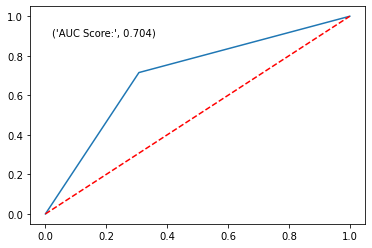

In [141]:
fpr,tpr,threholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.show()

In [142]:
lf = pd.Series({'Model Name': "Tuned Catboost Classifier",'Accuracy Score':ac,'F1_score':fscore,'Precision':Precision,'Recall':Recall})

final_table= final_table.append(lf, ignore_index=True)
final_table

,Model Name,Accuracy Score,F1_score,Precision,Recall
0,Base model,0.913521,NaN,NaN,0.000000
1,Logistic Regression model,0.709000,0.692063,0.738149,0.651394
2,Tuned Logistic Regression model,0.709000,0.692063,0.738149,0.651394
3,Decision Tree Classifier,0.696000,0.677282,0.725000,0.635458
4,Tuned Decision Tree,0.696000,0.677282,0.725000,0.635458
5,Random Forest Classifier,0.697000,0.684046,0.717724,0.653386
6,Tuned Random Forest Classifier,0.715000,0.693878,0.752914,0.643426
7,KNeighbors Classifier,0.686000,0.670860,0.707965,0.637450
8,Tuned KNeighbors Classifier,0.502000,0.667112,0.502012,0.994024
9,AdaBoost Classifier,0.732000,0.723711,0.750000,0.699203


#### Stacking Classifier 

In [143]:
base = [('RF', RandomForestClassifier(criterion ='entropy',max_depth = 2,min_samples_split = 2,n_estimators = 90)),
        ('DT',DecisionTreeClassifier(criterion= 'entropy', max_depth= 9, min_samples_split=2))]

stack_model = StackingClassifier(estimators = base, final_estimator = AdaBoostClassifier(n_estimators = 350,learning_rate= 0.15))
stack_model.fit(X_train_sc,y_train)

StackingClassifier(estimators=[('RF',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=2,
                                                       n_estimators=90)),
                               ('DT',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=9))],
                   final_estimator=AdaBoostClassifier(learning_rate=0.15,
                                                      n_estimators=350))

In [144]:
y_pred_prob=stack_model.predict(X_test_sc)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
ac=accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
fscore= 2*Precision*Recall/(Precision+Recall)
print('Accuracy Sore:',ac)
print('Precision:',Precision)
print('Recall:',Recall)
print('F1_score:',fscore)

Accuracy Sore: 0.732
Precision: 0.7387755102040816
Recall: 0.7211155378486056
F1_score: 0.7298387096774194


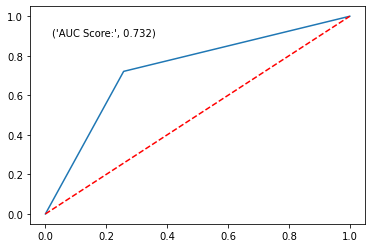

In [145]:
fpr,tpr,threholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.show()

In [146]:
lf = pd.Series({'Model Name': "Stacking Classifier  ",'Accuracy Score':ac,'F1_score':fscore,'Precision':Precision,'Recall':Recall})

final_table= final_table.append(lf, ignore_index=True)
final_table

,Model Name,Accuracy Score,F1_score,Precision,Recall
0,Base model,0.913521,NaN,NaN,0.000000
1,Logistic Regression model,0.709000,0.692063,0.738149,0.651394
2,Tuned Logistic Regression model,0.709000,0.692063,0.738149,0.651394
3,Decision Tree Classifier,0.696000,0.677282,0.725000,0.635458
4,Tuned Decision Tree,0.696000,0.677282,0.725000,0.635458
5,Random Forest Classifier,0.697000,0.684046,0.717724,0.653386
6,Tuned Random Forest Classifier,0.715000,0.693878,0.752914,0.643426
7,KNeighbors Classifier,0.686000,0.670860,0.707965,0.637450
8,Tuned KNeighbors Classifier,0.502000,0.667112,0.502012,0.994024
9,AdaBoost Classifier,0.732000,0.723711,0.750000,0.699203


#### 11.Evaluation


In [150]:
final_table

,Model Name,Accuracy Score,F1_score,Precision,Recall
0,Base model,0.913521,NaN,NaN,0.000000
1,Logistic Regression model,0.694000,0.667391,0.734450,0.611554
2,Tuned Logistic Regression model,0.694000,0.667391,0.734450,0.611554
3,Decision Tree Classifier,0.700000,0.673913,0.741627,0.617530
4,Tuned Decision Tree,0.719000,0.700107,0.754023,0.653386
5,Random Forest Classifier,0.709000,0.700309,0.724947,0.677291
6,Tuned Random Forest Classifier,0.721000,0.696409,0.767386,0.637450
7,KNeighbors Classifier,0.678000,0.693916,0.663636,0.727092
8,Tuned KNeighbors Classifier,0.502000,0.668442,0.502000,1.000000
9,AdaBoost Classifier,0.729000,0.710160,0.766744,0.661355


It can be observed from the ablove table that CatBoost Classifier has the best accuracy score and F1_score and good recall and precision values.
Hence, we conclude that the CatBoost Classifier model makes the best model. 

In [147]:
X=dfsample.drop('readmitted',axis=1)
y=dfsample['readmitted']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)
sc=StandardScaler()
X_train_sc=pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test_sc=pd.DataFrame(sc.fit_transform(X_test),columns=X.columns)
cb=CatBoostClassifier()
cbmodel=cb.fit(X_train_sc,y_train)
y_pred_prob = cbmodel.predict(X_test_sc)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
ac=accuracy_score(y_test,y_pred)
print('Accuracy Sore:',ac)

Learning rate set to 0.018621
0:	learn: 0.6872407	total: 2.59ms	remaining: 2.58s
1:	learn: 0.6816450	total: 5.3ms	remaining: 2.65s
2:	learn: 0.6763368	total: 7.83ms	remaining: 2.6s
3:	learn: 0.6717894	total: 10.3ms	remaining: 2.55s
4:	learn: 0.6665662	total: 12.7ms	remaining: 2.54s
5:	learn: 0.6618048	total: 15.3ms	remaining: 2.54s
6:	learn: 0.6572697	total: 18ms	remaining: 2.55s
7:	learn: 0.6530150	total: 20.7ms	remaining: 2.56s
8:	learn: 0.6488222	total: 23.1ms	remaining: 2.54s
9:	learn: 0.6446666	total: 25.6ms	remaining: 2.54s
10:	learn: 0.6405780	total: 28.5ms	remaining: 2.56s
11:	learn: 0.6369406	total: 31.2ms	remaining: 2.57s
12:	learn: 0.6335673	total: 33.7ms	remaining: 2.56s
13:	learn: 0.6301020	total: 36.4ms	remaining: 2.57s
14:	learn: 0.6268531	total: 39.1ms	remaining: 2.56s
15:	learn: 0.6241031	total: 41.5ms	remaining: 2.55s
16:	learn: 0.6209876	total: 44.1ms	remaining: 2.55s
17:	learn: 0.6182150	total: 46.8ms	remaining: 2.56s
18:	learn: 0.6154555	total: 49.8ms	remaining: 2.

171:	learn: 0.5067606	total: 533ms	remaining: 2.56s
172:	learn: 0.5065166	total: 535ms	remaining: 2.56s
173:	learn: 0.5062090	total: 538ms	remaining: 2.55s
174:	learn: 0.5061327	total: 540ms	remaining: 2.55s
175:	learn: 0.5058627	total: 543ms	remaining: 2.54s
176:	learn: 0.5056213	total: 546ms	remaining: 2.54s
177:	learn: 0.5053445	total: 548ms	remaining: 2.53s
178:	learn: 0.5051644	total: 551ms	remaining: 2.52s
179:	learn: 0.5050035	total: 553ms	remaining: 2.52s
180:	learn: 0.5048364	total: 556ms	remaining: 2.52s
181:	learn: 0.5046433	total: 559ms	remaining: 2.51s
182:	learn: 0.5044544	total: 562ms	remaining: 2.51s
183:	learn: 0.5042708	total: 565ms	remaining: 2.51s
184:	learn: 0.5039760	total: 599ms	remaining: 2.64s
185:	learn: 0.5037791	total: 602ms	remaining: 2.63s
186:	learn: 0.5035519	total: 604ms	remaining: 2.63s
187:	learn: 0.5032315	total: 607ms	remaining: 2.62s
188:	learn: 0.5029380	total: 609ms	remaining: 2.61s
189:	learn: 0.5027589	total: 611ms	remaining: 2.61s
190:	learn: 

329:	learn: 0.4754826	total: 1.07s	remaining: 2.17s
330:	learn: 0.4753329	total: 1.07s	remaining: 2.17s
331:	learn: 0.4752102	total: 1.07s	remaining: 2.16s
332:	learn: 0.4750703	total: 1.08s	remaining: 2.16s
333:	learn: 0.4747236	total: 1.08s	remaining: 2.16s
334:	learn: 0.4745563	total: 1.09s	remaining: 2.16s
335:	learn: 0.4742944	total: 1.12s	remaining: 2.21s
336:	learn: 0.4740982	total: 1.13s	remaining: 2.21s
337:	learn: 0.4739088	total: 1.13s	remaining: 2.21s
338:	learn: 0.4737665	total: 1.13s	remaining: 2.21s
339:	learn: 0.4735927	total: 1.14s	remaining: 2.21s
340:	learn: 0.4733321	total: 1.14s	remaining: 2.2s
341:	learn: 0.4731398	total: 1.14s	remaining: 2.2s
342:	learn: 0.4729558	total: 1.15s	remaining: 2.19s
343:	learn: 0.4727517	total: 1.15s	remaining: 2.19s
344:	learn: 0.4727070	total: 1.15s	remaining: 2.18s
345:	learn: 0.4725118	total: 1.16s	remaining: 2.18s
346:	learn: 0.4724471	total: 1.16s	remaining: 2.18s
347:	learn: 0.4722907	total: 1.16s	remaining: 2.18s
348:	learn: 0.

524:	learn: 0.4396427	total: 1.97s	remaining: 1.78s
525:	learn: 0.4394371	total: 1.97s	remaining: 1.77s
526:	learn: 0.4391829	total: 1.97s	remaining: 1.77s
527:	learn: 0.4390424	total: 1.98s	remaining: 1.77s
528:	learn: 0.4388905	total: 1.98s	remaining: 1.76s
529:	learn: 0.4385614	total: 1.98s	remaining: 1.76s
530:	learn: 0.4382743	total: 1.98s	remaining: 1.75s
531:	learn: 0.4380155	total: 1.99s	remaining: 1.75s
532:	learn: 0.4377206	total: 1.99s	remaining: 1.74s
533:	learn: 0.4374975	total: 2.01s	remaining: 1.75s
534:	learn: 0.4373080	total: 2.01s	remaining: 1.75s
535:	learn: 0.4370841	total: 2.01s	remaining: 1.74s
536:	learn: 0.4370636	total: 2.01s	remaining: 1.74s
537:	learn: 0.4368542	total: 2.02s	remaining: 1.73s
538:	learn: 0.4366716	total: 2.02s	remaining: 1.73s
539:	learn: 0.4364239	total: 2.02s	remaining: 1.72s
540:	learn: 0.4361696	total: 2.02s	remaining: 1.72s
541:	learn: 0.4359183	total: 2.02s	remaining: 1.71s
542:	learn: 0.4356652	total: 2.03s	remaining: 1.71s
543:	learn: 

688:	learn: 0.4052643	total: 2.74s	remaining: 1.23s
689:	learn: 0.4050639	total: 2.74s	remaining: 1.23s
690:	learn: 0.4048361	total: 2.74s	remaining: 1.23s
691:	learn: 0.4046127	total: 2.74s	remaining: 1.22s
692:	learn: 0.4043485	total: 2.75s	remaining: 1.22s
693:	learn: 0.4042401	total: 2.75s	remaining: 1.21s
694:	learn: 0.4039517	total: 2.75s	remaining: 1.21s
695:	learn: 0.4037731	total: 2.75s	remaining: 1.2s
696:	learn: 0.4036146	total: 2.76s	remaining: 1.2s
697:	learn: 0.4033704	total: 2.76s	remaining: 1.19s
698:	learn: 0.4031667	total: 2.76s	remaining: 1.19s
699:	learn: 0.4030172	total: 2.76s	remaining: 1.18s
700:	learn: 0.4028529	total: 2.77s	remaining: 1.18s
701:	learn: 0.4026337	total: 2.77s	remaining: 1.18s
702:	learn: 0.4024796	total: 2.77s	remaining: 1.17s
703:	learn: 0.4022003	total: 2.78s	remaining: 1.17s
704:	learn: 0.4020360	total: 2.78s	remaining: 1.16s
705:	learn: 0.4018560	total: 2.78s	remaining: 1.16s
706:	learn: 0.4016797	total: 2.78s	remaining: 1.15s
707:	learn: 0.

875:	learn: 0.3747130	total: 3.28s	remaining: 464ms
876:	learn: 0.3745655	total: 3.28s	remaining: 461ms
877:	learn: 0.3743572	total: 3.29s	remaining: 457ms
878:	learn: 0.3742060	total: 3.29s	remaining: 453ms
879:	learn: 0.3740610	total: 3.29s	remaining: 449ms
880:	learn: 0.3738456	total: 3.29s	remaining: 445ms
881:	learn: 0.3737018	total: 3.3s	remaining: 441ms
882:	learn: 0.3734708	total: 3.3s	remaining: 437ms
883:	learn: 0.3733095	total: 3.3s	remaining: 433ms
884:	learn: 0.3731964	total: 3.3s	remaining: 429ms
885:	learn: 0.3730711	total: 3.31s	remaining: 426ms
886:	learn: 0.3729662	total: 3.31s	remaining: 422ms
887:	learn: 0.3728048	total: 3.32s	remaining: 419ms
888:	learn: 0.3727870	total: 3.32s	remaining: 415ms
889:	learn: 0.3725217	total: 3.33s	remaining: 411ms
890:	learn: 0.3722674	total: 3.33s	remaining: 407ms
891:	learn: 0.3720884	total: 3.33s	remaining: 403ms
892:	learn: 0.3719929	total: 3.33s	remaining: 400ms
893:	learn: 0.3718493	total: 3.34s	remaining: 396ms
894:	learn: 0.37

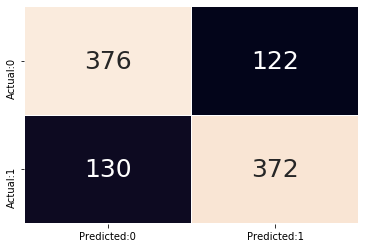

In [165]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True,fmt = 'd', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.show()

In [166]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       498
           1       0.75      0.74      0.75       502

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



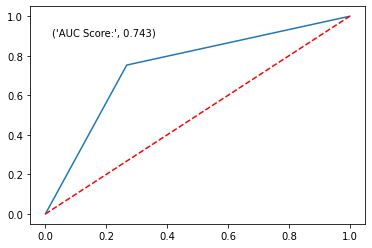

In [148]:
fpr,tpr,threholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.show()

It can be observed that the roc curve doesn't make a 45-degree diagonal of the ROC space.Hence, the model is acurate.

In [169]:
# Precision-Recall Curve

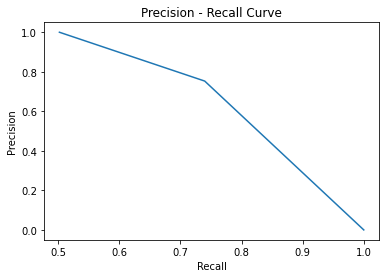

In [149]:
from sklearn.metrics import precision_recall_curve
fpr,tpr,threholds=precision_recall_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.title('Precision - Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()